# PROYECTO 2. RKG (RESTART KERNEL GIRLS)
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import sys

sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

pd.options.display.max_columns = None

## VISUALIZACIÓN Y ANÁLISIS

## 1. Creación de las subtablas para facilitar la visualización

In [2]:
df = pd.read_pickle('../resultados/df_da_relevante_limpio.pkl')
df.head()

age     gender                        q3  \
0  50-54        Man                   Belgium   
1  22-24  Nonbinary  United States of America   
2  30-34      Woman                     Egypt   
3  22-24        Man                     China   
4  40-44        Man              South Africa   

                                                  q4         q6  \
0                                  Bachelor’s degree  20+ years   
1  Some college/university study without earning ...  < 1 years   
2                                  Bachelor’s degree  3-5 years   
3  Some college/university study without earning ...  < 1 years   
4                                    Master’s degree  1-3 years   

                                                  q7      q8  \
0                                     [Python,  SQL]  Python   
1                                               [ R]       R   
2                                           [Python]       R   
3  [Python,  SQL,  C,  C++,  Java,  Javascript,  ...  Python   
4                                         [ R,  SQL]       R   

                                                  q9  \
0  [Jupyter-JupyterLab-JupyterNotebooks , Jupyter...   
1                                         [RStudio ]   
2                     [ Notepad++, Jupyter Notebook]   
3  [Jupyter-JupyterLab-JupyterNotebooks , Visual ...   
4                       [RStudio , Jupyter Notebook]   

                                                 q10  \
0  [Kaggle Notebooks, Colab Notebooks, Databricks...   
1                             [Google Cloud Datalab]   
2                [Kaggle Notebooks, Colab Notebooks]   
3                [Kaggle Notebooks, Azure Notebooks]   
4                                [IBM Watson Studio]   

                                                 q14  \
0  [ Matplotlib , Seaborn , Plotly / Plotly Expre...   
1                                [Ggplot / ggplot2 ]   
2                                            [ None]   
3           [ Matplotlib , Plotly / Plotly Express ]   
4  [Plotly / Plotly Express , Ggplot / ggplot2 , ...   

                           q20                   q21  q22  \
0              [Energy/Mining]  1000-9,999 employees  5-9   
1  [Manufacturing/Fabrication]     250-999 employees  3-4   
2         [Non-profit/Service]        0-49 employees    0   
3       [Computers/Technology]        0-49 employees    0   
4  [Manufacturing/Fabrication]     250-999 employees  1-2   

                                                 q24      q32  \
0  [Analyze and understand data to influence prod...      NaN   
1                                                NaN      NaN   
2  [Analyze and understand data to influence prod...  [ None]   
3  [Analyze and understand data to influence prod...      NaN   
4  [Analyze and understand data to influence prod...  [ None]   

                     q34  q35                                q39  \
0                    NaN  NaN                                NaN   
1                    NaN  NaN                                NaN   
2                [ None]  NaN  [I do not share my work publicly]   
3                    NaN  NaN                                NaN   
4  [ Microsoft Power BI]  NaN  [I do not share my work publicly]   

                                                 q41         continente  
0  [Local development environments (RStudio-Jupyt...             Europa  
1                                                NaN  América del Norte  
2  [Basic statistical software (Microsoft Excel-G...             África  
3  [Basic statistical software (Microsoft Excel-G...               Asia  
4  [Local development environments (RStudio-Jupyt...             África

In [3]:
df.describe()

age gender     q3               q4         q6              q7  \
count    2301   2301   2301             2301       2301            2158   
unique     11      5     65                7          7             213   
top     25-29    Man  India  Master’s degree  1-3 years  [Python,  SQL]   
freq      588   1759    564             1027        749             466   

            q8                  q9     q10                       q14  \
count     2157                2155    2150                      2108   
unique      12                 408     181                       191   
top     Python  [Jupyter Notebook]  [None]  [ Matplotlib , Seaborn ]   
freq      1587                 268     658                       445   

                           q20             q21   q22  \
count                     2187            2171  2151   
unique                      18               5     7   
top     [Computers/Technology]  0-49 employees   1-2   
freq                       391             664   522   

                                                      q24      q32      q34  \
count                                                2074     1239     1232   
unique                                                 70      326      133   
top     [Analyze and understand data to influence prod...  [ None]  [ None]   
freq                                                  771      229      274   

                       q35                                q39  \
count                  443                               1202   
unique                  14                                 84   
top     Microsoft Power BI  [I do not share my work publicly]   
freq                   170                                417   

                                                      q41 continente  
count                                                1768       2166  
unique                                                  6          7  
top     [Basic statistical software (Microsoft Excel-G...       Asia  
freq                                                  722       1082

In [4]:
# creamos un dataframe para cada pregunta de herramientas con las columnas que podremos utilizar como hues
df_q7 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q7', 'q21', 'q22']]
df_q8 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q21', 'q22']]
df_q9 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q9', 'q21', 'q22']]
df_q10 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q10', 'q21', 'q22']]
df_q14 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q14', 'q21', 'q22']]
df_q20 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q20', 'q21', 'q22']]
df_q24 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q21', 'q22', 'q24']]
df_q32 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q21', 'q22', 'q32']]
df_q34 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q21', 'q22', 'q34']]
df_q35 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q21', 'q22', 'q35']]
df_q39 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q21', 'q22', 'q39']]
df_q41 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q21', 'q22', 'q41']]

In [5]:
# utilizamos el método .exploe() para poder separar las respuestas
df_q7 = df_q7.explode('q7')
df_q9 = df_q9.explode('q9')
df_q10 = df_q10.explode('q10')
df_q14 = df_q14.explode('q14')
df_q20 = df_q20.explode('q20')
df_q24 = df_q24.explode('q24')
df_q32 = df_q32.explode('q32')
df_q34 = df_q34.explode('q34')
df_q39 = df_q39.explode('q39')
df_q41 = df_q41.explode('q41')

In [6]:
# guardamos los dataframes de cada pregunta de herramienta
df_q7.to_csv('../resultados/df_da_relevante_q7_limpio.csv')
df_q8.to_csv('../resultados/df_da_relevante_q8_limpio.csv')
df_q9.to_csv('../resultados/df_da_relevante_q9_limpio.csv')
df_q10.to_csv('../resultados/df_da_relevante_q10_limpio.csv')
df_q14.to_csv('../resultados/df_da_relevante_q14_limpio.csv')
df_q20.to_csv('../resultados/df_da_relevante_q20_limpio.csv')
df_q24.to_csv('../resultados/df_da_relevante_q24_limpio.csv')
df_q32.to_csv('../resultados/df_da_relevante_q32_limpio.csv')
df_q34.to_csv('../resultados/df_da_relevante_q34_limpio.csv')
df_q35.to_csv('../resultados/df_da_relevante_q35_limpio.csv')
df_q39.to_csv('../resultados/df_da_relevante_q39_limpio.csv')
df_q41.to_csv('../resultados/df_da_relevante_q41_limpio.csv')

In [7]:
# vemos una muestra
df_q7.sample(3)

age gender       q3 continente               q4           q6      q7  \
658   40-44    Man    Japan       Asia  Master’s degree    1-3 years   Other   
713   40-44    Man  Denmark     Europa  Master’s degree    1-3 years  Python   
1334  35-39    Man    India       Asia  Master’s degree  10-20 years   Other   

                           q21  q22  
658             0-49 employees  1-2  
713   10,000 or more employees  5-9  
1334  10,000 or more employees  20+

## 2. Análisis exploratorio estadístico de columnas categóricas

- Tablas de frecuencias

In [8]:
# agrupamos el dataframe por cada columna de la lista de hues para ver su tabla de frecuencias
tablas_frec_hue = {}
for col in spv.lista_hues:
    df_group = df.groupby(col).count().reset_index() # sacamos la tabla de frecuencias absoluta
    df_group_sin_strings = df_group.drop(col, axis = 1) # nos quedarnos con todas las columnas menos la que contiene strings
    frecuencia_relativa = round((df_group_sin_strings / df.shape[0]) * 100, 2) # dividimos y sacamos las frecuencias relativas
    columnas = df_group_sin_strings.columns # almacenamos las columnas del dataframe sins strings en una variable
    df_group[columnas] = frecuencia_relativa # sobreescribimos los valores de las columnas
    df_group.to_csv(f'../resultados/tablas_frecuencias/tabla_frecuencias_{col}.csv')
    print(f'A continuación se muestra la tabla de frecuencia para la columna {col}:')
    display(df_group)
    tablas_frec_hue[col] = df_group # guardamos los resultados en un diccionario para poder imprimirlo cuando se desee

A continuación se muestra la tabla de frecuencia para la columna age:


age  gender     q3     q4     q6     q7     q8     q9    q10    q14  \
0   18-21    8.30   8.30   8.30   8.30   7.91   7.91   7.91   7.82   7.43   
1   22-24   18.21  18.21  18.21  18.21  17.30  17.30  17.21  17.17  16.78   
2   25-29   25.55  25.55  25.55  25.55  24.29  24.29  24.29  24.29  23.95   
3   30-34   18.25  18.25  18.25  18.25  17.08  17.08  17.08  17.04  16.73   
4   35-39   12.17  12.17  12.17  12.17  11.21  11.21  11.21  11.21  11.00   
5   40-44    7.08   7.08   7.08   7.08   6.56   6.56   6.56   6.52   6.52   
6   45-49    4.56   4.56   4.56   4.56   4.17   4.17   4.17   4.17   4.04   
7   50-54    2.91   2.91   2.91   2.91   2.61   2.61   2.61   2.61   2.56   
8   55-59    1.39   1.39   1.39   1.39   1.22   1.22   1.22   1.22   1.22   
9   60-69    1.22   1.22   1.22   1.22   1.09   1.04   1.04   1.04   1.04   
10    70+    0.35   0.35   0.35   0.35   0.35   0.35   0.35   0.35   0.35   

      q20    q21    q22    q24    q32    q34   q35    q39    q41  continente  
0    7.34   7.13   7.00   6.39   3.61   3.48  0.91   3.35   5.26        8.13  
1   16.99  16.86  16.73  16.08   8.74   8.69  3.17   8.43  13.39       17.51  
2   24.38  24.21  23.99  23.16  14.08  14.08  4.78  13.73  19.25       24.21  
3   17.69  17.64  17.43  16.82  10.13  10.04  4.04   9.91  14.86       16.64  
4   11.78  11.69  11.69  11.39   6.95   6.95  2.69   6.74  10.00       11.26  
5    6.78   6.78   6.74   6.52   3.95   3.91  1.26   3.78   5.56        6.56  
6    4.35   4.35   4.30   4.30   3.09   3.09  1.30   3.04   3.69        4.17  
7    2.87   2.82   2.78   2.69   1.56   1.56  0.65   1.56   2.26        2.78  
8    1.39   1.39   1.39   1.39   0.70   0.70  0.17   0.70   1.26        1.35  
9    1.13   1.13   1.09   1.09   0.78   0.78  0.22   0.74   1.00        1.17  
10   0.35   0.35   0.35   0.30   0.26   0.26  0.04   0.26   0.30        0.35

A continuación se muestra la tabla de frecuencia para la columna gender:


gender    age     q3     q4     q6     q7     q8     q9  \
0                      Man  76.45  76.45  76.45  76.45  72.06  72.01  71.93   
1                Nonbinary   0.22   0.22   0.22   0.22   0.22   0.22   0.22   
2        Prefer not to say   1.22   1.22   1.22   1.22   1.17   1.17   1.17   
3  Prefer to self-describe   0.17   0.17   0.17   0.17   0.13   0.13   0.13   
4                    Woman  21.95  21.95  21.95  21.95  20.21  20.21  20.21   

     q10    q14    q20    q21    q22    q24    q32    q34    q35    q39  \
0  71.71  70.36  72.71  72.23  71.75  69.36  42.46  42.20  15.43  41.16   
1   0.22   0.22   0.22   0.22   0.22   0.17   0.13   0.13   0.00   0.13   
2   1.17   1.17   1.09   1.09   1.09   1.09   0.61   0.61   0.22   0.56   
3   0.13   0.13   0.17   0.17   0.17   0.17   0.04   0.04   0.00   0.00   
4  20.21  19.73  20.86  20.64  20.25  19.34  10.60  10.56   3.61  10.39   

     q41  continente  
0  60.32       72.10  
1   0.13        0.17  
2   0.96        1.09  
3   0.17        0.17  
4  15.25       20.60

A continuación se muestra la tabla de frecuencia para la columna continente:


continente    age  gender     q3     q4     q6     q7     q8     q9  \
0  América del Norte  12.78   12.78  12.78  12.78  12.78  12.08  12.04  12.04   
1    América del Sur   7.87    7.87   7.87   7.87   7.87   7.56   7.56   7.56   
2               Asia  47.02   47.02  47.02  47.02  47.02  43.72  43.72  43.63   
3             Europa  11.99   11.99  11.99  11.99  11.99  11.60  11.60  11.60   
4              NS/NC   0.22    0.22   0.22   0.22   0.22   0.22   0.22   0.22   
5            Oceanía   1.65    1.65   1.65   1.65   1.65   1.61   1.61   1.61   
6             África  12.60   12.60  12.60  12.60  12.60  11.39  11.39  11.39   

     q10    q14    q20    q21    q22    q24    q32    q34   q35    q39    q41  
0  11.99  11.73  12.08  11.99  11.95  11.56   7.61   7.56  2.61   7.39   9.95  
1   7.56   7.52   7.74   7.74   7.69   7.48   4.52   4.52  1.65   4.39   6.56  
2  43.55  42.59  44.59  44.11  43.63  41.85  24.86  24.68  8.82  24.12  34.94  
3  11.56  11.39  11.52  11.43  11.26  10.86   5.95   5.95  2.00   5.78   9.47  
4   0.22   0.22   0.17   0.17   0.17   0.17   0.09   0.09  0.00   0.09   0.09  
5   1.61   1.61   1.61   1.56   1.52   1.52   0.87   0.87  0.26   0.87   1.39  
6  11.34  11.00  11.65  11.65  11.60  11.21   6.74   6.69  2.78   6.61   9.73

A continuación se muestra la tabla de frecuencia para la columna q4:


q4    age  gender     q3  \
0                                  Bachelor’s degree  38.81   38.81  38.81   
1                                    Doctoral degree   5.22    5.22   5.22   
2                             I prefer not to answer   2.43    2.43   2.43   
3                                    Master’s degree  44.63   44.63  44.63   
4               No formal education past high school   1.61    1.61   1.61   
5                             Professional doctorate   1.04    1.04   1.04   
6  Some college/university study without earning ...   6.26    6.26   6.26   

      q6     q7     q8     q9    q10    q14    q20    q21    q22    q24  \
0  38.81  35.98  35.98  35.98  35.90  34.94  36.64  36.29  35.81  34.07   
1   5.22   5.00   5.00   5.00   4.95   4.91   4.87   4.87   4.87   4.78   
2   2.43   2.39   2.39   2.39   2.39   2.26   2.26   2.22   2.13   2.04   
3  44.63  42.29  42.29  42.20  42.11  41.55  42.81  42.55  42.29  41.03   
4   1.61   1.39   1.39   1.39   1.39   1.39   1.52   1.48   1.43   1.43   
5   1.04   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   
6   6.26   5.74   5.69   5.69   5.69   5.56   5.95   5.95   5.95   5.78   

     q32    q34   q35    q39    q41  continente  
0  20.08  19.99  7.52  19.25  28.64       36.64  
1   2.74   2.69  0.52   2.65   3.95        4.87  
2   0.83   0.83  0.17   0.78   1.48        2.30  
3  25.34  25.16  9.73  24.77  35.94       42.20  
4   0.78   0.78  0.04   0.78   1.22        1.39  
5   0.70   0.70  0.17   0.70   0.83        0.91  
6   3.39   3.39  1.09   3.30   4.78        5.82

A continuación se muestra la tabla de frecuencia para la columna q6:


q6    age  gender     q3     q4     q7     q8  \
0                  1-3 years  32.55   32.55  32.55  32.55  32.55  32.55   
1                10-20 years   6.26    6.26   6.26   6.26   6.26   6.26   
2                  20+ years   3.35    3.35   3.35   3.35   3.35   3.30   
3                  3-5 years  16.12   16.12  16.12  16.12  16.12  16.12   
4                 5-10 years   9.08    9.08   9.08   9.08   9.08   9.08   
5                  < 1 years  26.42   26.42  26.42  26.42  26.42  26.42   
6  I have never written code   6.21    6.21   6.21   6.21   0.00   0.00   

      q9    q10    q14    q20    q21    q22    q24    q32    q34   q35    q39  \
0  32.51  32.42  31.81  30.68  30.60  30.25  29.20  17.73  17.56  7.65  17.25   
1   6.26   6.26   6.17   6.04   6.04   6.04   5.78   4.17   4.17  1.61   4.04   
2   3.30   3.30   3.26   3.09   3.09   3.09   3.04   2.13   2.13  0.65   2.09   
3  16.08  15.99  15.78  15.43  15.30  15.21  14.52   9.87   9.82  3.09   9.69   
4   9.08   9.08   9.00   8.87   8.78   8.74   8.52   5.95   5.95  2.30   5.74   
5  26.42  26.38  25.60  24.73  24.34  23.95  22.86  13.99  13.91  3.95  13.43   
6   0.00   0.00   0.00   6.21   6.21   6.21   6.21   0.00   0.00  0.00   0.00   

     q41  continente  
0  25.47       30.86  
1   5.26        5.91  
2   2.82        3.22  
3  13.39       15.17  
4   7.26        8.21  
5  18.69       24.82  
6   3.95        5.95

A continuación se muestra la tabla de frecuencia para la columna q21:


q21    age  gender     q3     q4     q6     q7     q8  \
0            0-49 employees  28.86   28.86  28.86  28.86  28.86  26.86  26.86   
1  10,000 or more employees  19.25   19.25  19.25  19.25  19.25  17.73  17.73   
2      1000-9,999 employees  17.82   17.82  17.82  17.82  17.82  16.64  16.64   
3         250-999 employees  13.30   13.30  13.30  13.30  13.30  12.69  12.69   
4          50-249 employees  15.12   15.12  15.12  15.12  15.12  14.21  14.21   

      q9    q10    q14    q20    q22    q24    q32    q34   q35    q39    q41  \
0  26.86  26.86  26.86  28.86  28.25  26.94  15.34  15.25  4.69  14.78  22.56   
1  17.73  17.73  17.73  19.25  19.25  18.43  11.69  11.65  4.52  11.17  15.95   
2  16.64  16.64  16.64  17.82  17.77  17.34  10.65  10.65  4.22  10.60  15.21   
3  12.69  12.69  12.69  13.30  13.21  12.82   8.00   8.00  2.52   7.91  11.00   
4  14.21  14.21  14.21  15.12  14.99  14.60   8.17   8.00  3.30   7.78  12.13   

   continente  
0       26.51  
1       18.90  
2       16.86  
3       12.52  
4       13.86

A continuación se muestra la tabla de frecuencia para la columna q22:


q22    age  gender     q3     q4     q6     q7     q8     q9    q10  \
0      0  14.25   14.25  14.25  14.25  14.25  12.73  12.73  12.73  12.73   
1    1-2  22.69   22.69  22.69  22.69  22.69  21.38  21.38  21.38  21.38   
2  10-14   6.30    6.30   6.30   6.30   6.30   6.04   6.04   6.04   6.04   
3  15-19   2.13    2.13   2.13   2.13   2.13   2.00   2.00   2.00   2.00   
4    20+  18.60   18.60  18.60  18.60  18.60  17.34  17.34  17.34  17.34   
5    3-4  17.38   17.38  17.38  17.38  17.38  16.17  16.17  16.17  16.17   
6    5-9  12.13   12.13  12.13  12.13  12.13  11.60  11.60  11.60  11.60   

     q14    q20    q21    q24    q32    q34   q35    q39    q41  continente  
0  12.73  14.25  14.25  13.65   5.74   5.74  1.00   5.48  11.17       13.39  
1  21.38  22.69  22.69  21.82  12.52  12.43  4.17  12.17  18.51       20.60  
2   6.04   6.30   6.30   6.04   4.04   4.00  1.65   3.95   5.17        5.87  
3   2.00   2.13   2.13   2.04   1.43   1.43  0.61   1.39   1.96        2.09  
4  17.34  18.60  18.60  17.99  11.47  11.43  4.52  11.21  15.65       18.30  
5  16.17  17.38  17.38  16.91  10.86  10.82  4.30  10.65  14.52       16.12  
6  11.60  12.13  12.13  11.69   7.78   7.69  3.00   7.39   9.87       11.47

In [9]:
# comprobamos que están todos:
tablas_frec_hue.keys()

dict_keys(['age', 'gender', 'continente', 'q4', 'q6', 'q21', 'q22'])

In [10]:
# calculamos la tabla de frecuencias para cada columna de herramientas en el extracto del dataframe creado para cada una de ellas con los hues
dicc_herramientas = {'q7': df_q7, 'q8': df_q8, 'q9': df_q9, 'q10': df_q10, 'q14': df_q14, 'q20': df_q20, 'q24': df_q24, 
                     'q32': df_q32, 'q34': df_q34, 'q35': df_q35, 'q39': df_q39, 'q41': df_q41}
tablas_frec_herram = {}
for col in spv.lista_herramientas:
    df_group = dicc_herramientas[col].groupby(col).count().reset_index() # sacamos la tabla de frecuencias absoluta
    df_group_sin_strings = df_group.drop(col, axis = 1) # nos quedarnos con todas las columnas menos la que contiene strings
    frecuencia_relativa = round((df_group_sin_strings / df.shape[0]) * 100, 2) # dividimos y sacamos las frecuencias relativas
    columnas = df_group_sin_strings.columns # almacenamos las columnas del dataframe sins strings en una variable
    df_group[columnas] = frecuencia_relativa # sobreescribimos los valores de las columnas
    df_group.to_csv(f'../resultados/tablas_frecuencias/tabla_frecuencias_{col}.csv')
    print(f'A continuación se muestra la tabla de frecuencias relativas para la columna {col}:')
    display(df_group)
    tablas_frec_herram[col] = df_group # guardamos los resultados en un diccionario para poder imprimirlo cuando se desee

A continuación se muestra la tabla de frecuencias relativas para la columna q7:


q7    age  gender     q3  continente     q4     q6    q21    q22
0          Bash   4.43    4.43   4.43        4.17   4.43   4.43   4.22   4.22
1             C   7.43    7.43   7.43        7.00   7.43   7.43   6.61   6.56
2           C++   8.91    8.91   8.91        8.43   8.91   8.91   7.91   7.87
3          Java   9.30    9.30   9.30        8.78   9.30   9.30   8.13   8.13
4    Javascript   9.95    9.95   9.95        9.21   9.95   9.95   9.34   9.34
5         Julia   0.56    0.56   0.56        0.56   0.56   0.56   0.52   0.52
6        MATLAB   7.69    7.69   7.69        7.26   7.69   7.69   7.17   7.17
7          None   1.39    1.39   1.39        1.30   1.39   1.39   1.30   1.30
8         Other   9.26    9.26   9.26        8.69   9.26   9.26   8.78   8.69
9             R  31.07   31.07  31.07       28.99  31.07  31.07  29.25  29.03
10          SQL  60.80   60.80  60.80       57.28  60.80  60.80  57.41  57.02
11        Swift   0.56    0.56   0.56        0.48   0.56   0.56   0.52   0.52
12       Python  78.40   78.40  78.40       73.97  78.40  78.40  73.36  72.66

A continuación se muestra la tabla de frecuencias relativas para la columna q8:


q8    age  gender     q3  continente     q4     q6    q21    q22
0         Bash   0.17    0.17   0.17        0.17   0.17   0.17   0.17   0.17
1            C   0.52    0.52   0.52        0.52   0.52   0.52   0.48   0.48
2          C++   0.96    0.96   0.96        0.91   0.96   0.96   0.87   0.87
3         Java   0.78    0.78   0.78        0.78   0.78   0.78   0.78   0.78
4   Javascript   0.39    0.39   0.39        0.26   0.39   0.39   0.35   0.30
5        Julia   0.35    0.35   0.35        0.30   0.35   0.35   0.35   0.35
6       MATLAB   0.48    0.48   0.48        0.39   0.48   0.48   0.35   0.35
7         None   0.43    0.43   0.43        0.43   0.43   0.43   0.43   0.43
8        Other   0.70    0.70   0.70        0.61   0.70   0.70   0.65   0.65
9       Python  68.97   68.97  68.97       65.15  68.97  68.97  64.84  64.19
10           R   8.65    8.65   8.65        7.69   8.65   8.65   8.04   8.00
11         SQL  11.34   11.34  11.34       10.91  11.34  11.34  10.82  10.69

A continuación se muestra la tabla de frecuencias relativas para la columna q9:


q9    age  gender     q3  continente  \
0                                   None   2.26    2.26   2.26        2.04   
1                              Notepad++  16.78   16.78  16.78       15.86   
2                                  Other   4.74    4.74   4.74        4.48   
3                                 Spyder  14.65   14.65  14.65       14.04   
4                           Sublime Text   8.95    8.95   8.95        8.34   
5                            Vim / Emacs   2.87    2.87   2.87        2.65   
6                       Jupyter Notebook  62.15   62.15  62.15       58.67   
7   Jupyter-JupyterLab-JupyterNotebooks   20.25   20.25  20.25       19.08   
8                                MATLAB    5.35    5.35   5.35        5.13   
9                               PyCharm   23.38   23.38  23.38       22.29   
10                              RStudio   26.94   26.94  26.94       25.29   
11                        Visual Studio   13.04   13.04  13.04       11.91   
12          Visual Studio Code (VSCode)   27.38   27.38  27.38       25.86   

       q4     q6    q21    q22  
0    2.26   2.26   2.17   2.17  
1   16.78  16.78  16.08  15.99  
2    4.74   4.74   4.56   4.56  
3   14.65  14.65  13.52  13.43  
4    8.95   8.95   8.30   8.17  
5    2.87   2.87   2.74   2.69  
6   62.15  62.15  58.41  57.97  
7   20.25  20.25  19.04  18.99  
8    5.35   5.35   4.82   4.82  
9   23.38  23.38  21.60  21.25  
10  26.94  26.94  25.73  25.55  
11  13.04  13.04  12.08  11.99  
12  27.38  27.38  26.08  25.90

A continuación se muestra la tabla de frecuencias relativas para la columna q10:


q10    age  gender     q3  \
0                               Amazon EMR Notebooks   1.48    1.48   1.48   
1                  Amazon Sagemaker Studio Notebooks   2.22    2.22   2.22   
2                                    Azure Notebooks   4.78    4.78   4.78   
3                                Binder / JupyterHub   7.69    7.69   7.69   
4                                         Code Ocean   0.65    0.65   0.65   
5                                    Colab Notebooks  28.77   28.77  28.77   
6                 Databricks Collaborative Notebooks   3.04    3.04   3.04   
7                                 Deepnote Notebooks   0.91    0.91   0.91   
8                               Google Cloud Datalab   8.13    8.13   8.13   
9   Google Cloud Notebooks (AI Platform / Vertex AI)   7.34    7.34   7.34   
10                                 IBM Watson Studio   4.22    4.22   4.22   
11                                  Kaggle Notebooks  34.46   34.46  34.46   
12                                              None  28.60   28.60  28.60   
13                              Observable Notebooks   1.09    1.09   1.09   
14                                             Other   4.13    4.13   4.13   
15                             Paperspace / Gradient   0.61    0.61   0.61   
16                         Zeppelin / Zepl Notebooks   0.87    0.87   0.87   

    continente     q4     q6    q21    q22  
0         1.43   1.48   1.48   1.35   1.35  
1         2.04   2.22   2.22   2.13   2.13  
2         4.61   4.78   4.78   4.48   4.43  
3         7.30   7.69   7.69   7.34   7.17  
4         0.61   0.65   0.65   0.61   0.61  
5        27.29  28.77  28.77  27.55  27.47  
6         2.78   3.04   3.04   2.91   2.91  
7         0.78   0.91   0.91   0.87   0.87  
8         7.65   8.13   8.13   7.30   7.26  
9         6.61   7.34   7.34   6.78   6.78  
10        3.87   4.22   4.22   3.82   3.82  
11       32.55  34.46  34.46  32.64  32.55  
12       26.25  28.60  28.60  27.25  26.77  
13        1.04   1.09   1.09   0.96   0.96  
14        3.95   4.13   4.13   3.74   3.69  
15        0.56   0.61   0.61   0.48   0.48  
16        0.78   0.87   0.87   0.78   0.78

A continuación se muestra la tabla de frecuencias relativas para la columna q14:


q14    age  gender     q3  continente     q4     q6  \
0                Matplotlib   63.62   63.62  63.62       59.93  63.62  63.62   
1                       None  11.08   11.08  11.08       10.39  11.08  11.08   
2                      Other   4.56    4.56   4.56        4.39   4.56   4.56   
3                    Altair    1.69    1.69   1.69        1.61   1.69   1.69   
4                     Bokeh    4.48    4.48   4.48        4.26   4.48   4.48   
5                     D3 js    3.52    3.52   3.52        3.22   3.52   3.52   
6                Geoplotlib    6.30    6.30   6.30        5.87   6.30   6.30   
7          Ggplot / ggplot2   27.86   27.86  27.86       26.38  27.86  27.86   
8          Leaflet / Folium    3.39    3.39   3.39        3.00   3.39   3.39   
9   Plotly / Plotly Express   25.60   25.60  25.60       23.73  25.60  25.60   
10                  Seaborn   50.02   50.02  50.02       47.02  50.02  50.02   
11                    Shiny    8.00    8.00   8.00        7.52   8.00   8.00   

      q21    q22  
0   61.58  61.06  
1   10.34  10.08  
2    4.39   4.39  
3    1.69   1.69  
4    4.39   4.39  
5    3.48   3.48  
6    6.04   6.00  
7   27.21  27.03  
8    3.39   3.39  
9   24.90  24.82  
10  48.72  48.37  
11   7.95   7.95

A continuación se muestra la tabla de frecuencias relativas para la columna q20:


q20    age  gender     q3  continente  \
0                      Academics/Education  14.65   14.65  14.65       13.82   
1                       Accounting/Finance  11.86   11.86  11.86       11.34   
2              Broadcasting/Communications   2.17    2.17   2.17        2.09   
3                     Computers/Technology  16.99   16.99  16.99       16.38   
4                            Energy/Mining   3.04    3.04   3.04        2.78   
5                Government/Public Service   6.04    6.04   6.04        5.13   
6         Hospitality/Entertainment/Sports   1.61    1.61   1.61        1.48   
7                Insurance/Risk Assessment   2.82    2.82   2.82        2.69   
8                Manufacturing/Fabrication   5.04    5.04   5.04        4.78   
9                            Marketing/CRM   3.78    3.78   3.78        3.56   
10                  Medical/Pharmaceutical   4.61    4.61   4.61        4.43   
11               Military/Security/Defense   0.83    0.83   0.83        0.78   
12                      Non-profit/Service   2.56    2.56   2.56        2.22   
13    Online Business/Internet-based Sales   2.35    2.35   2.35        2.30   
14  Online Service/Internet-based Services   3.82    3.82   3.82        3.65   
15                                   Other   6.00    6.00   6.00        5.69   
16                            Retail/Sales   4.82    4.82   4.82        4.26   
17                 Shipping/Transportation   2.04    2.04   2.04        1.96   

       q4     q6    q21    q22  
0   14.65  14.65  14.39  14.12  
1   11.86  11.86  11.78  11.73  
2    2.17   2.17   2.17   2.13  
3   16.99  16.99  16.86  16.69  
4    3.04   3.04   3.00   3.00  
5    6.04   6.04   6.04   6.04  
6    1.61   1.61   1.56   1.56  
7    2.82   2.82   2.82   2.82  
8    5.04   5.04   5.04   5.00  
9    3.78   3.78   3.78   3.65  
10   4.61   4.61   4.61   4.61  
11   0.83   0.83   0.83   0.83  
12   2.56   2.56   2.52   2.52  
13   2.35   2.35   2.35   2.30  
14   3.82   3.82   3.82   3.82  
15   6.00   6.00   5.95   5.82  
16   4.82   4.82   4.78   4.78  
17   2.04   2.04   2.04   2.04

A continuación se muestra la tabla de frecuencias relativas para la columna q24:


q24    age  gender     q3  \
0   Build and/or run a machine learning service t...  13.30   13.30  13.30   
1   Build and/or run the data infrastructure that...  29.90   29.90  29.90   
2   Build prototypes to explore applying machine ...  17.60   17.60  17.60   
3   Do research that advances the state of the ar...  10.78   10.78  10.78   
4   Experimentation and iteration to improve exis...  12.60   12.60  12.60   
5   None of these activities are an important par...   7.30    7.30   7.30   
6                                              Other   3.69    3.69   3.69   
7  Analyze and understand data to influence produ...  71.84   71.84  71.84   

   continente     q4     q6    q21    q22  
0       12.56  13.30  13.30  13.30  13.30  
1       27.94  29.90  29.90  29.90  29.90  
2       16.95  17.60  17.60  17.60  17.60  
3       10.04  10.78  10.78  10.78  10.78  
4       11.78  12.60  12.60  12.60  12.60  
5        7.04   7.30   7.30   7.30   7.30  
6        3.30   3.69   3.69   3.69   3.69  
7       67.32  71.84  71.84  71.84  71.84

A continuación se muestra la tabla de frecuencias relativas para la columna q32:


q32    age  gender     q3  continente     q4  \
0                   Amazon Aurora    0.83    0.83   0.83        0.83   0.83   
1                 Amazon DynamoDB    1.43    1.43   1.43        1.39   1.43   
2                      Amazon RDS    2.04    2.04   2.04        2.00   2.04   
3                 Amazon Redshift    3.43    3.43   3.43        3.35   3.43   
4           Google Cloud BigQuery    5.74    5.74   5.74        5.35   5.74   
5           Google Cloud BigTable    2.13    2.13   2.13        1.83   2.13   
6          Google Cloud Firestore    1.56    1.56   1.56        1.13   1.56   
7                Google Cloud SQL    3.78    3.78   3.78        3.43   3.78   
8            Google Cloud Spanner    1.04    1.04   1.04        0.87   1.04   
9                         IBM Db2    1.61    1.61   1.61        1.52   1.61   
10      Microsoft Azure Cosmos DB    1.96    1.96   1.96        1.91   1.96   
11   Microsoft Azure SQL Database    4.52    4.52   4.52        4.35   4.52   
12           Microsoft SQL Server   14.30   14.30  14.30       13.26  14.30   
13                        MongoDB    6.61    6.61   6.61        6.08   6.61   
14                            None   9.95    9.95   9.95        9.47   9.95   
15                Oracle Database    6.91    6.91   6.91        6.43   6.91   
16                           Other   1.96    1.96   1.96        1.87   1.96   
17                     PostgreSQL   11.86   11.86  11.86       11.00  11.86   
18                         SQLite    7.65    7.65   7.65        6.95   7.65   
19                      Snowflake    2.56    2.56   2.56        2.48   2.56   
20                          MySQL   22.21   22.21  22.21       20.86  22.21   

       q6    q21    q22  
0    0.83   0.83   0.83  
1    1.43   1.43   1.43  
2    2.04   2.04   2.04  
3    3.43   3.43   3.43  
4    5.74   5.74   5.74  
5    2.13   2.13   2.13  
6    1.56   1.56   1.56  
7    3.78   3.78   3.78  
8    1.04   1.04   1.04  
9    1.61   1.61   1.61  
10   1.96   1.96   1.96  
11   4.52   4.52   4.52  
12  14.30  14.30  14.30  
13   6.61   6.61   6.61  
14   9.95   9.95   9.95  
15   6.91   6.91   6.91  
16   1.96   1.96   1.96  
17  11.86  11.86  11.86  
18   7.65   7.65   7.65  
19   2.56   2.56   2.56  
20  22.21  22.21  22.21

A continuación se muestra la tabla de frecuencias relativas para la columna q34:


q34    age  gender     q3  continente     q4     q6  \
0                    Alteryx    1.52    1.52   1.52        1.48   1.52   1.52   
1                        Domo   0.52    0.52   0.52        0.52   0.52   0.52   
2          Google Data Studio   6.91    6.91   6.91        6.26   6.91   6.91   
3                      Looker   1.17    1.17   1.17        1.09   1.17   1.17   
4    Microsoft Azure Synapse    1.52    1.52   1.52        1.43   1.52   1.52   
5          Microsoft Power BI  21.30   21.30  21.30       19.90  21.30  21.30   
6                        None  11.91   11.91  11.91       11.21  11.91  11.91   
7                       Other   2.61    2.61   2.61        2.48   2.61   2.61   
8                        Qlik   3.30    3.30   3.30        3.00   3.30   3.30   
9        SAP Analytics Cloud    1.52    1.52   1.52        1.39   1.52   1.52   
10                 Salesforce   2.48    2.48   2.48        2.35   2.48   2.48   
11                   Sisense    0.52    0.52   0.52        0.48   0.52   0.52   
12             TIBCO Spotfire   0.78    0.78   0.78        0.70   0.78   0.78   
13                    Tableau  22.73   22.73  22.73       21.69  22.73  22.73   
14                Tableau CRM   3.39    3.39   3.39        3.13   3.39   3.39   
15               Thoughtspot    0.35    0.35   0.35        0.35   0.35   0.35   
16          Amazon QuickSight   1.26    1.26   1.26        1.22   1.26   1.26   

      q21    q22  
0    1.52   1.52  
1    0.52   0.52  
2    6.91   6.91  
3    1.17   1.17  
4    1.52   1.52  
5   21.30  21.30  
6   11.91  11.91  
7    2.61   2.61  
8    3.30   3.30  
9    1.52   1.52  
10   2.48   2.48  
11   0.52   0.52  
12   0.78   0.78  
13  22.73  22.73  
14   3.39   3.39  
15   0.35   0.35  
16   1.26   1.26

A continuación se muestra la tabla de frecuencias relativas para la columna q35:


q35   age  gender    q3  continente    q4    q6  \
0                   Alteryx   0.26    0.26  0.26        0.26  0.26  0.26   
1          Amazon QuickSight  0.22    0.22  0.22        0.22  0.22  0.22   
2                       Domo  0.09    0.09  0.09        0.09  0.09  0.09   
3         Google Data Studio  1.69    1.69  1.69        1.61  1.69  1.69   
4                     Looker  0.17    0.17  0.17        0.17  0.17  0.17   
5   Microsoft Azure Synapse   0.22    0.22  0.22        0.17  0.22  0.22   
6         Microsoft Power BI  7.39    7.39  7.39        6.91  7.39  7.39   
7                      Other  0.43    0.43  0.43        0.43  0.43  0.43   
8                       Qlik  0.56    0.56  0.56        0.52  0.56  0.56   
9       SAP Analytics Cloud   0.43    0.43  0.43        0.30  0.43  0.43   
10                Salesforce  0.22    0.22  0.22        0.17  0.22  0.22   
11            TIBCO Spotfire  0.04    0.04  0.04        0.04  0.04  0.04   
12                   Tableau  7.13    7.13  7.13        6.82  7.13  7.13   
13               Tableau CRM  0.39    0.39  0.39        0.39  0.39  0.39   

     q21   q22  
0   0.26  0.26  
1   0.22  0.22  
2   0.09  0.09  
3   1.69  1.69  
4   0.17  0.17  
5   0.22  0.22  
6   7.39  7.39  
7   0.43  0.43  
8   0.56  0.56  
9   0.43  0.43  
10  0.22  0.22  
11  0.04  0.04  
12  7.13  7.13  
13  0.39  0.39

A continuación se muestra la tabla de frecuencias relativas para la columna q39:


q39    age  gender     q3  continente     q4  \
0                            Colab   8.56    8.56   8.56        8.30   8.56   
1                           GitHub  24.42   24.42  24.42       23.25  24.42   
2  I do not share my work publicly  18.12   18.12  18.12       16.82  18.12   
3                           Kaggle  19.04   19.04  19.04       18.04  19.04   
4                         NBViewer   1.00    1.00   1.00        0.91   1.00   
5                            Other   2.09    2.09   2.09        2.00   2.09   
6                    Personal blog   4.04    4.04   4.04        3.82   4.04   
7                      Plotly Dash   1.52    1.52   1.52        1.39   1.52   
8                            Shiny   2.17    2.17   2.17        1.87   2.17   
9                        Streamlit   2.13    2.13   2.13        2.04   2.13   

      q6    q21    q22  
0   8.56   8.56   8.56  
1  24.42  24.42  24.42  
2  18.12  18.12  18.12  
3  19.04  19.04  19.04  
4   1.00   1.00   1.00  
5   2.09   2.09   2.09  
6   4.04   4.04   4.04  
7   1.52   1.52   1.52  
8   2.17   2.17   2.17  
9   2.13   2.13   2.13

A continuación se muestra la tabla de frecuencias relativas para la columna q41:


q41    age  gender     q3  \
0           Advanced statistical software (SPSS-SAS)   5.65    5.65   5.65   
1  Basic statistical software (Microsoft Excel-Go...  31.38   31.38  31.38   
2  Business intelligence software (Salesforce-Tab...  12.13   12.13  12.13   
3   Cloud-based data software & APIs (AWS-GCP-Azure)   2.17    2.17   2.17   
4  Local development environments (RStudio-Jupyte...  22.95   22.95  22.95   
5                                              Other   2.56    2.56   2.56   

   continente     q4     q6    q21    q22  
0        5.35   5.65   5.65   5.65   5.65  
1       29.34  31.38  31.38  31.38  31.38  
2       11.60  12.13  12.13  12.13  12.13  
3        1.96   2.17   2.17   2.17   2.17  
4       21.47  22.95  22.95  22.95  22.95  
5        2.43   2.56   2.56   2.56   2.56

In [11]:
# comprobamos que están todos:
tablas_frec_herram.keys()

dict_keys(['q7', 'q8', 'q9', 'q10', 'q14', 'q20', 'q24', 'q32', 'q34', 'q35', 'q39', 'q41'])

- Tablas de contingencia

In [12]:
crosstab_hues = {}
for col in spv.lista_hues:
    spv.lista_sin_col.remove(col)
    contador = 0
    for col2 in spv.lista_sin_col:
        if contador < len(spv.lista_sin_col):
            df_crosstab = round(pd.crosstab(df[col], df[spv.lista_sin_col[contador]], margins=True, normalize=True)*100,2)
            df_crosstab.to_csv(f'../resultados/tablas_contingencia/tabla_contingencia_{col}_{col2}.csv')
            print(f'A continuación se muestra la tablas de contingencia para las columnas {col} y {col2}:')
            display(df_crosstab)
            crosstab_hues[f'{col}-{col2}'] = df_crosstab
        contador += 1

A continuación se muestra la tablas de contingencia para las columnas age y gender:


gender    Man  Nonbinary  Prefer not to say  Prefer to self-describe  Woman  \
age                                                                           
18-21    6.21       0.00               0.09                     0.00   2.00   
22-24   13.21       0.04               0.22                     0.04   4.69   
25-29   18.95       0.00               0.22                     0.00   6.39   
30-34   14.52       0.04               0.09                     0.09   3.52   
35-39    9.82       0.04               0.13                     0.04   2.13   
40-44    5.48       0.04               0.22                     0.00   1.35   
45-49    3.52       0.04               0.13                     0.00   0.87   
50-54    2.26       0.00               0.04                     0.00   0.61   
55-59    1.17       0.00               0.00                     0.00   0.22   
60-69    1.00       0.00               0.09                     0.00   0.13   
70+      0.30       0.00               0.00                     0.00   0.04   
All     76.45       0.22               1.22                     0.17  21.95   

gender     All  
age             
18-21     8.30  
22-24    18.21  
25-29    25.55  
30-34    18.25  
35-39    12.17  
40-44     7.08  
45-49     4.56  
50-54     2.91  
55-59     1.39  
60-69     1.22  
70+       0.35  
All     100.00

A continuación se muestra la tablas de contingencia para las columnas age y continente:


continente  América del Norte  América del Sur   Asia  Europa  NS/NC  Oceanía  \
age                                                                             
18-21                    0.14             0.32   6.97    0.23   0.05     0.05   
22-24                    1.29             1.15  12.14    1.29   0.05     0.14   
25-29                    2.72             1.85  14.13    2.91   0.05     0.18   
30-34                    2.59             1.71   8.03    2.26   0.05     0.42   
35-39                    1.94             1.34   4.34    1.99   0.00     0.28   
40-44                    1.29             0.97   1.99    1.66   0.05     0.23   
45-49                    1.34             0.51   0.97    1.02   0.00     0.18   
50-54                    0.69             0.23   0.65    1.02   0.00     0.23   
55-59                    0.46             0.09   0.51    0.28   0.00     0.05   
60-69                    0.78             0.18   0.18    0.09   0.00     0.00   
70+                      0.32             0.00   0.05    0.00   0.00     0.00   
All                     13.57             8.36  49.95   12.74   0.23     1.75   

continente  África     All  
age                         
18-21         0.88    8.63  
22-24         2.54   18.61  
25-29         3.88   25.72  
30-34         2.63   17.68  
35-39         2.08   11.96  
40-44         0.78    6.97  
45-49         0.42    4.43  
50-54         0.14    2.95  
55-59         0.05    1.43  
60-69         0.00    1.25  
70+           0.00    0.37  
All          13.39  100.00

A continuación se muestra la tablas de contingencia para las columnas age y q4:


q4     Bachelor’s degree  Doctoral degree  I prefer not to answer  \
age                                                                 
18-21               5.22             0.00                    0.35   
22-24               8.95             0.22                    0.48   
25-29              11.04             0.74                    0.70   
30-34               5.78             1.00                    0.43   
35-39               3.69             1.35                    0.17   
40-44               1.61             0.65                    0.13   
45-49               1.35             0.48                    0.09   
50-54               0.65             0.26                    0.00   
55-59               0.26             0.22                    0.04   
60-69               0.26             0.26                    0.04   
70+                 0.00             0.04                    0.00   
All                38.81             5.22                    2.43   

q4     Master’s degree  No formal education past high school  \
age                                                            
18-21             1.39                                  0.17   
22-24             7.13                                  0.22   
25-29            11.56                                  0.30   
30-34             9.87                                  0.26   
35-39             6.08                                  0.04   
40-44             3.82                                  0.13   
45-49             2.04                                  0.17   
50-54             1.52                                  0.22   
55-59             0.48                                  0.09   
60-69             0.48                                  0.00   
70+               0.26                                  0.00   
All              44.63                                  1.61   

q4     Professional doctorate  \
age                             
18-21                    0.04   
22-24                    0.09   
25-29                    0.13   
30-34                    0.22   
35-39                    0.09   
40-44                    0.30   
45-49                    0.04   
50-54                    0.09   
55-59                    0.04   
60-69                    0.00   
70+                      0.00   
All                      1.04   

q4     Some college/university study without earning a bachelor’s degree  \
age                                                                        
18-21                                               1.13                   
22-24                                               1.13                   
25-29                                               1.09                   
30-34                                               0.70                   
35-39                                               0.74                   
40-44                                               0.43                   
45-49                                               0.39                   
50-54                                               0.17                   
55-59                                               0.26                   
60-69                                               0.17                   
70+                                                 0.04                   
All                                                 6.26                   

q4        All  
age            
18-21    8.30  
22-24   18.21  
25-29   25.55  
30-34   18.25  
35-39   12.17  
40-44    7.08  
45-49    4.56  
50-54    2.91  
55-59    1.39  
60-69    1.22  
70+      0.35  
All    100.00

A continuación se muestra la tablas de contingencia para las columnas age y q6:


q6     1-3 years  10-20 years  20+ years  3-5 years  5-10 years  < 1 years  \
age                                                                          
18-21       3.65         0.00       0.04       1.09        0.13       3.00   
22-24       7.43         0.09       0.04       2.74        0.43       6.56   
25-29       9.95         0.17       0.04       5.04        1.65       7.43   
30-34       5.35         0.83       0.00       3.26        3.22       4.43   
35-39       3.30         1.83       0.22       1.65        1.65       2.56   
40-44       1.61         1.09       0.39       1.48        0.65       1.35   
45-49       0.61         1.04       0.70       0.39        0.91       0.52   
50-54       0.35         0.70       0.96       0.30        0.09       0.22   
55-59       0.13         0.30       0.35       0.09        0.13       0.22   
60-69       0.13         0.22       0.39       0.04        0.22       0.09   
70+         0.04         0.00       0.22       0.04        0.00       0.04   
All        32.55         6.26       3.35      16.12        9.08      26.42   

q6     I have never written code     All  
age                                       
18-21                       0.39    8.30  
22-24                       0.91   18.21  
25-29                       1.26   25.55  
30-34                       1.17   18.25  
35-39                       0.96   12.17  
40-44                       0.52    7.08  
45-49                       0.39    4.56  
50-54                       0.30    2.91  
55-59                       0.17    1.39  
60-69                       0.13    1.22  
70+                         0.00    0.35  
All                         6.21  100.00

A continuación se muestra la tablas de contingencia para las columnas age y q21:


q21    0-49 employees  10,000 or more employees  1000-9,999 employees  \
age                                                                     
18-21            4.24                      0.88                  0.83   
22-24            6.73                      3.22                  2.40   
25-29            7.23                      5.85                  4.79   
30-34            4.28                      3.64                  4.33   
35-39            3.55                      3.04                  2.40   
40-44            2.07                      1.89                  1.38   
45-49            0.88                      0.78                  1.24   
50-54            0.69                      0.64                  0.74   
55-59            0.46                      0.14                  0.41   
60-69            0.37                      0.23                  0.23   
70+              0.09                      0.09                  0.14   
All             30.58                     20.41                 18.89   

q21    250-999 employees  50-249 employees     All  
age                                                 
18-21               0.69              0.92    7.55  
22-24               2.35              3.18   17.87  
25-29               3.41              4.38   25.66  
30-34               3.36              3.09   18.70  
35-39               1.61              1.80   12.39  
40-44               0.88              0.97    7.19  
45-49               0.78              0.92    4.61  
50-54               0.55              0.37    2.99  
55-59               0.23              0.23    1.47  
60-69               0.23              0.14    1.20  
70+                 0.00              0.05    0.37  
All                14.09             16.03  100.00

A continuación se muestra la tablas de contingencia para las columnas age y q22:


q22        0    1-2  10-14  15-19    20+    3-4    5-9     All
age                                                           
18-21   2.19   1.95   0.46   0.09   0.93   1.12   0.74    7.48
22-24   2.74   4.14   1.12   0.33   3.67   3.72   2.19   17.90
25-29   2.88   5.81   2.05   0.88   5.21   5.49   3.35   25.66
30-34   2.56   5.44   1.07   0.37   4.32   2.51   2.37   18.64
35-39   2.60   2.23   0.93   0.33   2.28   2.42   1.72   12.51
40-44   0.93   1.91   0.42   0.09   1.53   1.44   0.88    7.21
45-49   0.51   1.21   0.33   0.09   0.70   0.98   0.79    4.60
50-54   0.37   0.70   0.14   0.00   0.88   0.37   0.51    2.98
55-59   0.33   0.46   0.09   0.09   0.09   0.23   0.19    1.49
60-69   0.09   0.33   0.09   0.00   0.23   0.23   0.19    1.16
70+     0.05   0.09   0.05   0.00   0.05   0.09   0.05    0.37
All    15.25  24.27   6.74   2.28  19.90  18.60  12.97  100.00

A continuación se muestra la tablas de contingencia para las columnas gender y continente:


continente               América del Norte  América del Sur   Asia  Europa  \
gender                                                                       
Man                                   9.23             7.29  37.95    9.65   
Nonbinary                             0.09             0.00   0.05    0.05   
Prefer not to say                     0.37             0.00   0.51    0.14   
Prefer to self-describe               0.00             0.00   0.14    0.05   
Woman                                 3.88             1.06  11.31    2.86   
All                                  13.57             8.36  49.95   12.74   

continente               NS/NC  Oceanía  África     All  
gender                                                   
Man                       0.05     1.57   10.85   76.59  
Nonbinary                 0.00     0.00    0.00    0.18  
Prefer not to say         0.09     0.00    0.05    1.15  
Prefer to self-describe   0.00     0.00    0.00    0.18  
Woman                     0.09     0.18    2.49   21.88  
All                       0.23     1.75   13.39  100.00

A continuación se muestra la tablas de contingencia para las columnas gender y q4:


q4                       Bachelor’s degree  Doctoral degree  \
gender                                                        
Man                                  31.12             3.74   
Nonbinary                             0.04             0.00   
Prefer not to say                     0.13             0.13   
Prefer to self-describe               0.09             0.00   
Woman                                 7.43             1.35   
All                                  38.81             5.22   

q4                       I prefer not to answer  Master’s degree  \
gender                                                             
Man                                        1.35            33.12   
Nonbinary                                  0.00             0.09   
Prefer not to say                          0.30             0.39   
Prefer to self-describe                    0.00             0.09   
Woman                                      0.78            10.95   
All                                        2.43            44.63   

q4                       No formal education past high school  \
gender                                                          
Man                                                      1.26   
Nonbinary                                                0.00   
Prefer not to say                                        0.09   
Prefer to self-describe                                  0.00   
Woman                                                    0.26   
All                                                      1.61   

q4                       Professional doctorate  \
gender                                            
Man                                        0.61   
Nonbinary                                  0.00   
Prefer not to say                          0.04   
Prefer to self-describe                    0.00   
Woman                                      0.39   
All                                        1.04   

q4                       Some college/university study without earning a bachelor’s degree  \
gender                                                                                       
Man                                                                   5.26                   
Nonbinary                                                             0.09                   
Prefer not to say                                                     0.13                   
Prefer to self-describe                                               0.00                   
Woman                                                                 0.78                   
All                                                                   6.26                   

q4                          All  
gender                           
Man                       76.45  
Nonbinary                  0.22  
Prefer not to say          1.22  
Prefer to self-describe    0.17  
Woman                     21.95  
All                      100.00

A continuación se muestra la tablas de contingencia para las columnas gender y q6:


q6                       1-3 years  10-20 years  20+ years  3-5 years  \
gender                                                                  
Man                          25.60         4.82       2.61      12.78   
Nonbinary                     0.00         0.04       0.00       0.04   
Prefer not to say             0.30         0.22       0.09       0.26   
Prefer to self-describe       0.04         0.04       0.00       0.04   
Woman                         6.61         1.13       0.65       3.00   
All                          32.55         6.26       3.35      16.12   

q6                       5-10 years  < 1 years  I have never written code  \
gender                                                                      
Man                            6.87      19.38                       4.39   
Nonbinary                      0.00       0.13                       0.00   
Prefer not to say              0.04       0.26                       0.04   
Prefer to self-describe        0.00       0.00                       0.04   
Woman                          2.17       6.65                       1.74   
All                            9.08      26.42                       6.21   

q6                          All  
gender                           
Man                       76.45  
Nonbinary                  0.22  
Prefer not to say          1.22  
Prefer to self-describe    0.17  
Woman                     21.95  
All                      100.00

A continuación se muestra la tablas de contingencia para las columnas gender y q21:


q21                      0-49 employees  10,000 or more employees  \
gender                                                              
Man                               23.31                     15.52   
Nonbinary                          0.00                      0.05   
Prefer not to say                  0.41                      0.18   
Prefer to self-describe            0.05                      0.09   
Woman                              6.82                      4.56   
All                               30.58                     20.41   

q21                      1000-9,999 employees  250-999 employees  \
gender                                                             
Man                                     14.42              10.96   
Nonbinary                                0.14               0.05   
Prefer not to say                        0.28               0.18   
Prefer to self-describe                  0.05               0.00   
Woman                                    4.01               2.90   
All                                     18.89              14.09   

q21                      50-249 employees     All  
gender                                             
Man                                 12.34   76.55  
Nonbinary                            0.00    0.23  
Prefer not to say                    0.09    1.15  
Prefer to self-describe              0.00    0.18  
Woman                                3.59   21.88  
All                                 16.03  100.00

A continuación se muestra la tablas de contingencia para las columnas gender y q22:


q22                          0    1-2  10-14  15-19    20+    3-4    5-9  \
gender                                                                     
Man                      11.95  18.92   5.35   1.39  14.97  14.41   9.76   
Nonbinary                 0.00   0.05   0.00   0.00   0.09   0.05   0.05   
Prefer not to say         0.42   0.14   0.09   0.00   0.23   0.05   0.23   
Prefer to self-describe   0.00   0.09   0.00   0.00   0.09   0.00   0.00   
Woman                     2.88   5.07   1.30   0.88   4.51   4.09   2.93   
All                      15.25  24.27   6.74   2.28  19.90  18.60  12.97   

q22                         All  
gender                           
Man                       76.75  
Nonbinary                  0.23  
Prefer not to say          1.16  
Prefer to self-describe    0.19  
Woman                     21.66  
All                      100.00

A continuación se muestra la tablas de contingencia para las columnas continente y q4:


q4                 Bachelor’s degree  Doctoral degree  I prefer not to answer  \
continente                                                                      
América del Norte               4.02             0.69                    0.14   
América del Sur                 3.46             0.32                    0.09   
Asia                           21.51             2.22                    1.75   
Europa                          2.40             1.20                    0.14   
NS/NC                           0.05             0.05                    0.05   
Oceanía                         0.28             0.23                    0.00   
África                          7.20             0.46                    0.28   
All                            38.92             5.17                    2.45   

q4                 Master’s degree  No formal education past high school  \
continente                                                                 
América del Norte             7.62                                  0.05   
América del Sur               3.46                                  0.05   
Asia                         20.59                                  0.78   
Europa                        7.66                                  0.37   
NS/NC                         0.09                                  0.00   
Oceanía                       1.11                                  0.05   
África                        4.29                                  0.18   
All                          44.83                                  1.48   

q4                 Professional doctorate  \
continente                                  
América del Norte                    0.14   
América del Sur                      0.00   
Asia                                 0.51   
Europa                               0.18   
NS/NC                                0.00   
Oceanía                              0.00   
África                               0.14   
All                                  0.97   

q4                 Some college/university study without earning a bachelor’s degree  \
continente                                                                             
América del Norte                                               0.92                   
América del Sur                                                 0.97                   
Asia                                                            2.59                   
Europa                                                          0.78                   
NS/NC                                                           0.00                   
Oceanía                                                         0.09                   
África                                                          0.83                   
All                                                             6.19                   

q4                    All  
continente                 
América del Norte   13.57  
América del Sur      8.36  
Asia                49.95  
Europa              12.74  
NS/NC                0.23  
Oceanía              1.75  
África              13.39  
All                100.00

A continuación se muestra la tablas de contingencia para las columnas continente y q6:


q6                 1-3 years  10-20 years  20+ years  3-5 years  5-10 years  \
continente                                                                    
América del Norte       3.55         1.20       1.20       2.77        2.22   
América del Sur         2.54         0.55       0.32       1.57        0.92   
Asia                   17.50         2.12       0.65       7.48        3.74   
Europa                  3.88         1.62       0.92       2.03        1.11   
NS/NC                   0.09         0.05       0.00       0.09        0.00   
Oceanía                 0.37         0.23       0.18       0.51        0.23   
África                  4.85         0.51       0.14       1.66        0.51   
All                    32.78         6.28       3.42      16.11        8.73   

q6                 < 1 years  I have never written code     All  
continente                                                       
América del Norte       1.89                       0.74   13.57  
América del Sur         2.12                       0.32    8.36  
Asia                   14.96                       3.51   49.95  
Europa                  2.77                       0.42   12.74  
NS/NC                   0.00                       0.00    0.23  
Oceanía                 0.18                       0.05    1.75  
África                  4.43                       1.29   13.39  
All                    26.36                       6.33  100.00

A continuación se muestra la tablas de contingencia para las columnas continente y q21:


q21                0-49 employees  10,000 or more employees  \
continente                                                    
América del Norte            2.40                      4.02   
América del Sur              2.11                      1.47   
Asia                        15.59                     11.23   
Europa                       3.19                      3.09   
NS/NC                        0.00                      0.00   
Oceanía                      0.44                      0.39   
África                       6.18                      1.13   
All                         29.90                     21.32   

q21                1000-9,999 employees  250-999 employees  50-249 employees  \
continente                                                                     
América del Norte                  3.14               2.01              1.96   
América del Sur                    1.96               1.47              1.72   
Asia                               7.99               7.01              7.94   
Europa                             2.94               1.81              1.86   
NS/NC                              0.10               0.00              0.10   
Oceanía                            0.44               0.29              0.20   
África                             2.45               1.52              1.86   
All                               19.02              14.12             15.64   

q21                   All  
continente                 
América del Norte   13.53  
América del Sur      8.73  
Asia                49.75  
Europa              12.89  
NS/NC                0.20  
Oceanía              1.76  
África              13.14  
All                100.00

A continuación se muestra la tablas de contingencia para las columnas continente y q22:


q22                    0    1-2  10-14  15-19    20+    3-4    5-9     All
continente                                                                
América del Norte   1.29   2.67   1.04   0.40   3.76   2.47   1.98   13.61
América del Sur     1.29   2.13   0.69   0.25   1.63   1.68   1.09    8.76
Asia                7.52  11.38   3.61   1.04  10.29   9.25   6.58   49.68
Europa              1.83   3.51   0.54   0.30   2.97   2.03   1.63   12.82
NS/NC               0.05   0.00   0.00   0.00   0.10   0.05   0.00    0.20
Oceanía             0.20   0.30   0.15   0.05   0.59   0.20   0.25    1.73
África              3.07   3.46   0.64   0.35   1.48   2.67   1.53   13.21
All                15.24  23.45   6.68   2.38  20.83  18.36  13.06  100.00

A continuación se muestra la tablas de contingencia para las columnas q4 y q6:


q6                                                  1-3 years  10-20 years  \
q4                                                                           
Bachelor’s degree                                       14.34         1.74   
Doctoral degree                                          0.96         1.00   
I prefer not to answer                                   0.96         0.17   
Master’s degree                                         14.25         2.78   
No formal education past high school                     0.17         0.09   
Professional doctorate                                   0.17         0.13   
Some college/university study without earning a...       1.69         0.35   
All                                                     32.55         6.26   

q6                                                  20+ years  3-5 years  \
q4                                                                         
Bachelor’s degree                                        0.48       5.48   
Doctoral degree                                          0.48       1.26   
I prefer not to answer                                   0.00       0.22   
Master’s degree                                          1.78       8.04   
No formal education past high school                     0.17       0.35   
Professional doctorate                                   0.09       0.09   
Some college/university study without earning a...       0.35       0.70   
All                                                      3.35      16.12   

q6                                                  5-10 years  < 1 years  \
q4                                                                          
Bachelor’s degree                                         2.56      11.39   
Doctoral degree                                           0.74       0.56   
I prefer not to answer                                    0.00       1.04   
Master’s degree                                           5.13      10.30   
No formal education past high school                      0.13       0.48   
Professional doctorate                                    0.22       0.30   
Some college/university study without earning a...        0.30       2.35   
All                                                       9.08      26.42   

q6                                                  I have never written code  \
q4                                                                              
Bachelor’s degree                                                        2.82   
Doctoral degree                                                          0.22   
I prefer not to answer                                                   0.04   
Master’s degree                                                          2.35   
No formal education past high school                                     0.22   
Professional doctorate                                                   0.04   
Some college/university study without earning a...                       0.52   
All                                                                      6.21   

q6                                                     All  
q4                                                          
Bachelor’s degree                                    38.81  
Doctoral degree                                       5.22  
I prefer not to answer                                2.43  
Master’s degree                                      44.63  
No formal education past high school                  1.61  
Professional doctorate                                1.04  
Some college/university study without earning a...    6.26  
All                                                 100.00

A continuación se muestra la tablas de contingencia para las columnas q4 y q21:


q21                                                 0-49 employees  \
q4                                                                   
Bachelor’s degree                                            13.04   
Doctoral degree                                               1.57   
I prefer not to answer                                        1.15   
Master’s degree                                              11.38   
No formal education past high school                          0.69   
Professional doctorate                                        0.32   
Some college/university study without earning a...            2.44   
All                                                          30.58   

q21                                                 10,000 or more employees  \
q4                                                                             
Bachelor’s degree                                                       7.88   
Doctoral degree                                                         0.97   
I prefer not to answer                                                  0.05   
Master’s degree                                                        10.27   
No formal education past high school                                    0.05   
Professional doctorate                                                  0.28   
Some college/university study without earning a...                      0.92   
All                                                                    20.41   

q21                                                 1000-9,999 employees  \
q4                                                                         
Bachelor’s degree                                                   7.05   
Doctoral degree                                                     1.01   
I prefer not to answer                                              0.32   
Master’s degree                                                     8.94   
No formal education past high school                                0.41   
Professional doctorate                                              0.14   
Some college/university study without earning a...                  1.01   
All                                                                18.89   

q21                                                 250-999 employees  \
q4                                                                      
Bachelor’s degree                                                4.47   
Doctoral degree                                                  0.88   
I prefer not to answer                                           0.37   
Master’s degree                                                  7.14   
No formal education past high school                             0.23   
Professional doctorate                                           0.23   
Some college/university study without earning a...               0.78   
All                                                             14.09   

q21                                                 50-249 employees     All  
q4                                                                            
Bachelor’s degree                                               6.03   38.46  
Doctoral degree                                                 0.74    5.16  
I prefer not to answer                                          0.46    2.35  
Master’s degree                                                 7.37   45.09  
No formal education past high school                            0.18    1.57  
Professional doctorate                                          0.09    1.06  
Some college/university study without earning a...              1.15    6.31  
All                                                            16.03  100.00

A continuación se muestra la tablas de contingencia para las columnas q4 y q22:


q22                                                     0    1-2  10-14  \
q4                                                                        
Bachelor’s degree                                    5.95   9.11   2.74   
Doctoral degree                                      0.74   1.21   0.37   
I prefer not to answer                               0.46   0.65   0.19   
Master’s degree                                      5.76  11.02   3.02   
No formal education past high school                 0.56   0.28   0.00   
Professional doctorate                               0.09   0.37   0.00   
Some college/university study without earning a...   1.67   1.63   0.42   
All                                                 15.25  24.27   6.74   

q22                                                 15-19    20+    3-4  \
q4                                                                        
Bachelor’s degree                                    0.70   7.72   7.21   
Doctoral degree                                      0.14   0.88   0.98   
I prefer not to answer                               0.00   0.19   0.56   
Master’s degree                                      1.21   9.76   8.23   
No formal education past high school                 0.05   0.14   0.23   
Professional doctorate                               0.00   0.33   0.23   
Some college/university study without earning a...   0.19   0.88   1.16   
All                                                  2.28  19.90  18.60   

q22                                                   5-9     All  
q4                                                                 
Bachelor’s degree                                    4.88   38.31  
Doctoral degree                                      0.88    5.21  
I prefer not to answer                               0.23    2.28  
Master’s degree                                      6.23   45.23  
No formal education past high school                 0.28    1.53  
Professional doctorate                               0.05    1.07  
Some college/university study without earning a...   0.42    6.37  
All                                                 12.97  100.00

A continuación se muestra la tablas de contingencia para las columnas q6 y q21:


q21                        0-49 employees  10,000 or more employees  \
q6                                                                    
1-3 years                           10.55                      6.17   
10-20 years                          1.38                      1.70   
20+ years                            0.41                      0.74   
3-5 years                            4.05                      3.73   
5-10 years                           1.52                      2.72   
< 1 years                           10.55                      3.73   
I have never written code            2.12                      1.61   
All                                 30.58                     20.41   

q21                        1000-9,999 employees  250-999 employees  \
q6                                                                   
1-3 years                                  5.62               4.65   
10-20 years                                1.61               1.01   
20+ years                                  0.78               0.74   
3-5 years                                  3.55               2.35   
5-10 years                                 2.12               1.43   
< 1 years                                  3.96               3.27   
I have never written code                  1.24               0.64   
All                                       18.89              14.09   

q21                        50-249 employees     All  
q6                                                   
1-3 years                              5.44   32.43  
10-20 years                            0.69    6.40  
20+ years                              0.60    3.27  
3-5 years                              2.53   16.21  
5-10 years                             1.52    9.30  
< 1 years                              4.28   25.79  
I have never written code              0.97    6.59  
All                                   16.03  100.00

A continuación se muestra la tablas de contingencia para las columnas q6 y q22:


q22                            0    1-2  10-14  15-19    20+    3-4    5-9  \
q6                                                                           
1-3 years                   4.60   7.81   2.28   0.60   6.00   6.65   4.42   
10-20 years                 0.60   1.30   0.33   0.14   1.63   1.39   1.07   
20+ years                   0.19   1.02   0.37   0.05   0.65   0.37   0.65   
3-5 years                   2.19   3.11   1.26   0.37   4.18   2.88   2.28   
5-10 years                  0.60   2.09   0.51   0.37   2.84   1.81   1.12   
< 1 years                   5.44   7.53   1.72   0.60   3.25   4.18   2.88   
I have never written code   1.63   1.39   0.28   0.14   1.35   1.30   0.56   
All                        15.25  24.27   6.74   2.28  19.90  18.60  12.97   

q22                           All  
q6                                 
1-3 years                   32.36  
10-20 years                  6.46  
20+ years                    3.30  
3-5 years                   16.27  
5-10 years                   9.34  
< 1 years                   25.62  
I have never written code    6.65  
All                        100.00

A continuación se muestra la tablas de contingencia para las columnas q21 y q22:


q22                           0    1-2  10-14  15-19    20+    3-4    5-9  \
q21                                                                         
0-49 employees             8.51  12.09   0.79   0.28   0.28   6.00   2.28   
10,000 or more employees   2.32   1.81   1.21   0.46  10.74   2.14   1.91   
1000-9,999 employees       1.63   2.23   2.32   0.60   6.23   2.93   3.07   
250-999 employees          1.02   3.67   1.53   0.60   1.35   2.93   3.02   
50-249 employees           1.77   4.46   0.88   0.33   1.30   4.60   2.70   
All                       15.25  24.27   6.74   2.28  19.90  18.60  12.97   

q22                          All  
q21                               
0-49 employees             30.22  
10,000 or more employees   20.60  
1000-9,999 employees       19.01  
250-999 employees          14.13  
50-249 employees           16.04  
All                       100.00

In [13]:
# comprobamos que están todos:
crosstab_hues.keys()

dict_keys(['age-gender', 'age-continente', 'age-q4', 'age-q6', 'age-q21', 'age-q22', 'gender-continente', 'gender-q4', 'gender-q6', 'gender-q21', 'gender-q22', 'continente-q4', 'continente-q6', 'continente-q21', 'continente-q22', 'q4-q6', 'q4-q21', 'q4-q22', 'q6-q21', 'q6-q22', 'q21-q22'])

## 3. Visualización de los datos. Obtención de gráficas

### Características del Data Analyst

- Tareas a las que más tiempo dedica un Analista de Datos

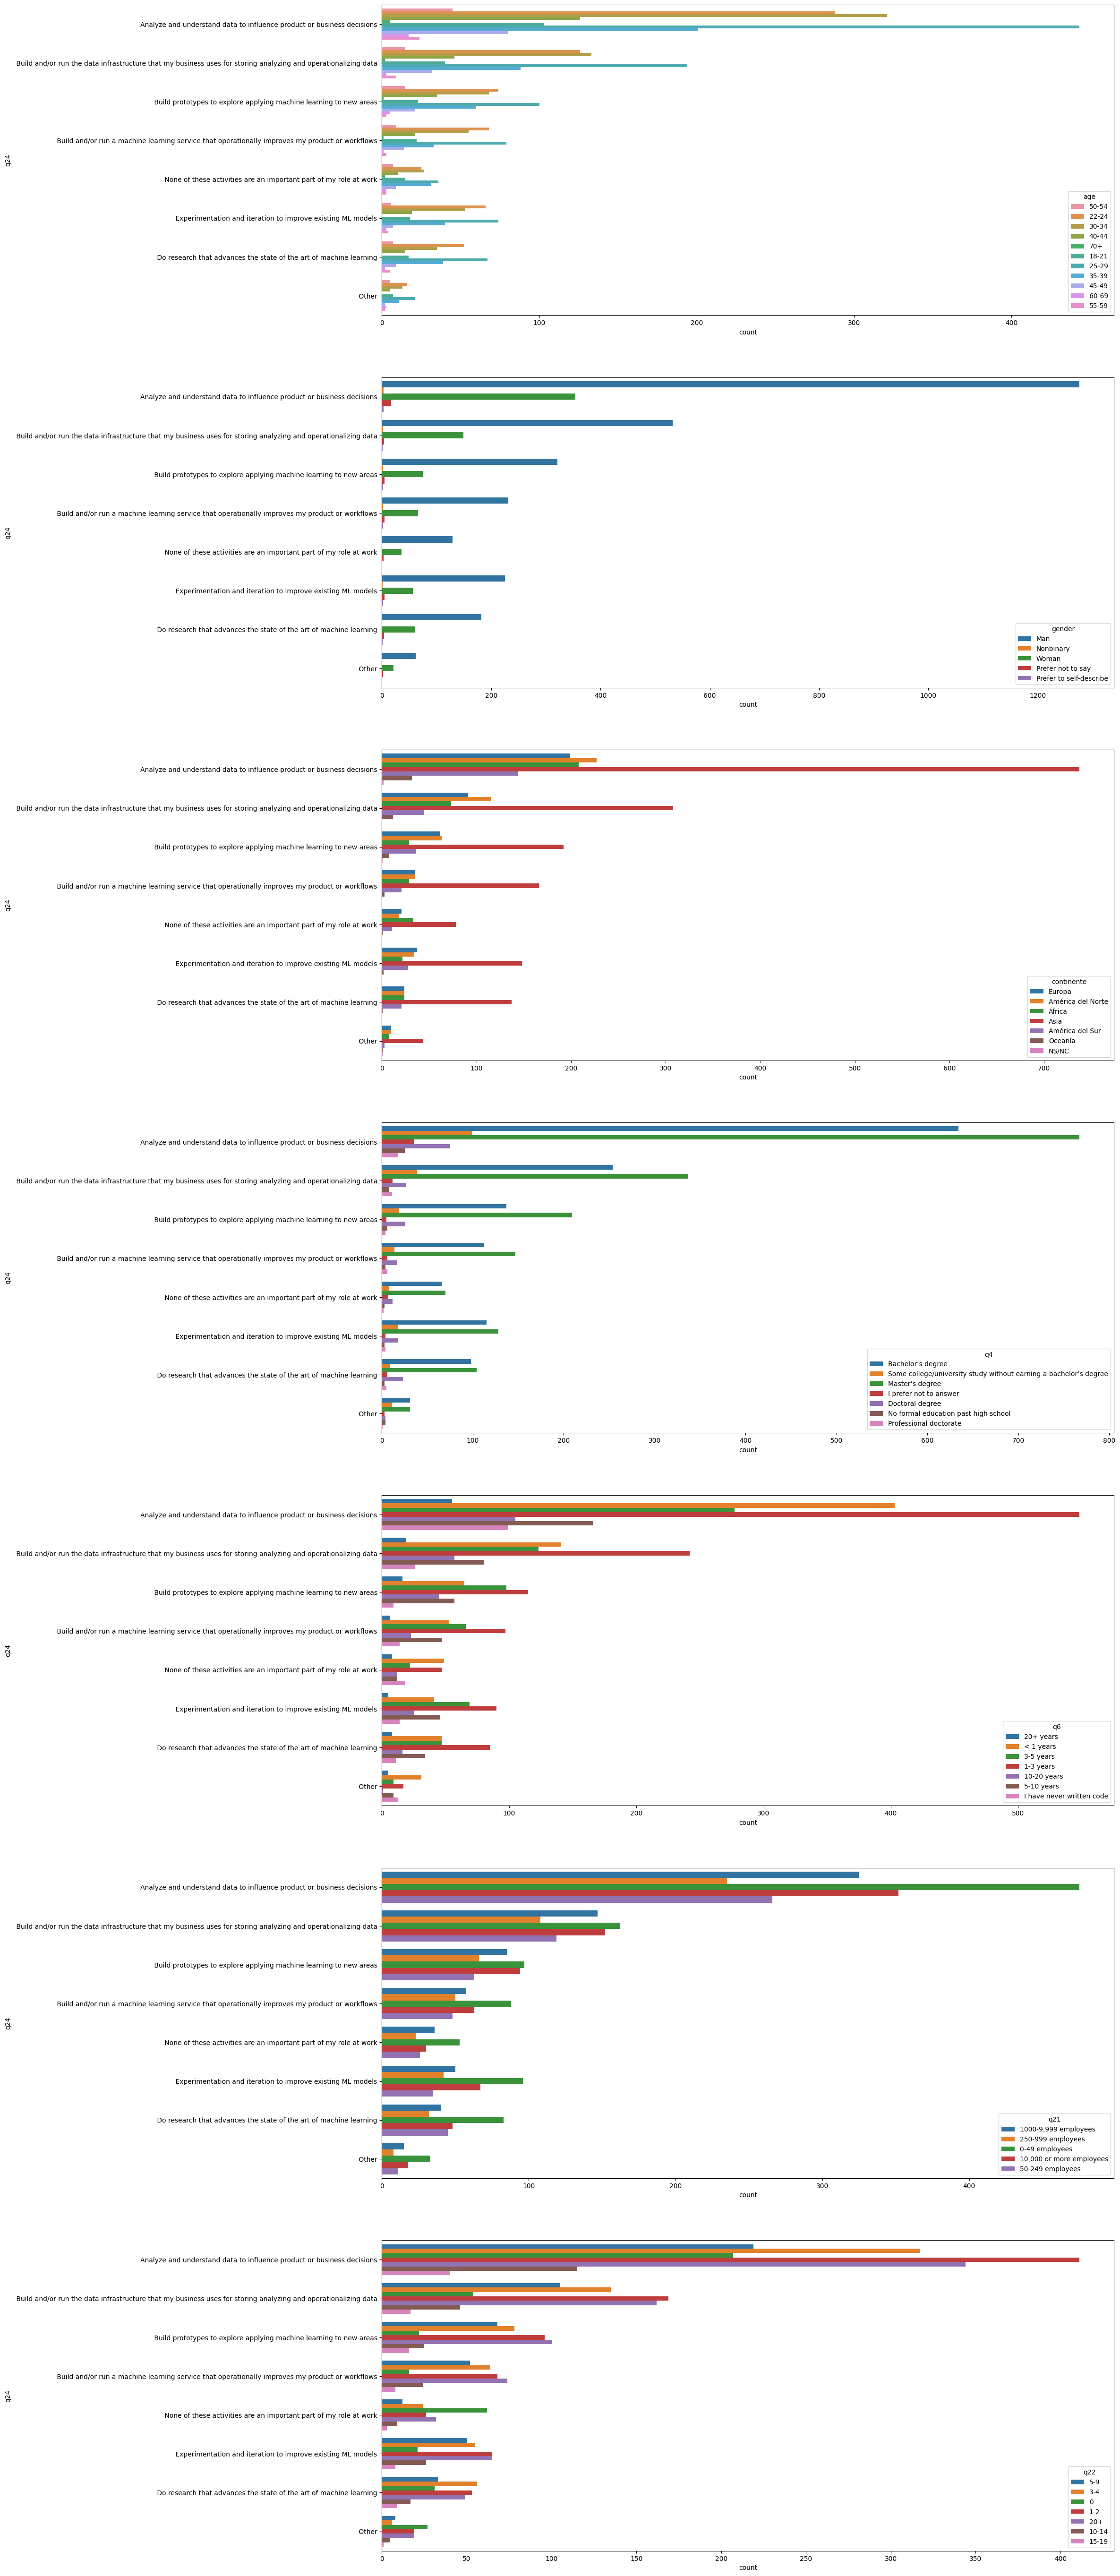

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,70))
contador = 0
for i in spv.lista_hues:
    sns.countplot(y = 'q24', data=df_q24, ax=axes[contador], hue=i)
    contador += 1
plt.show(); 


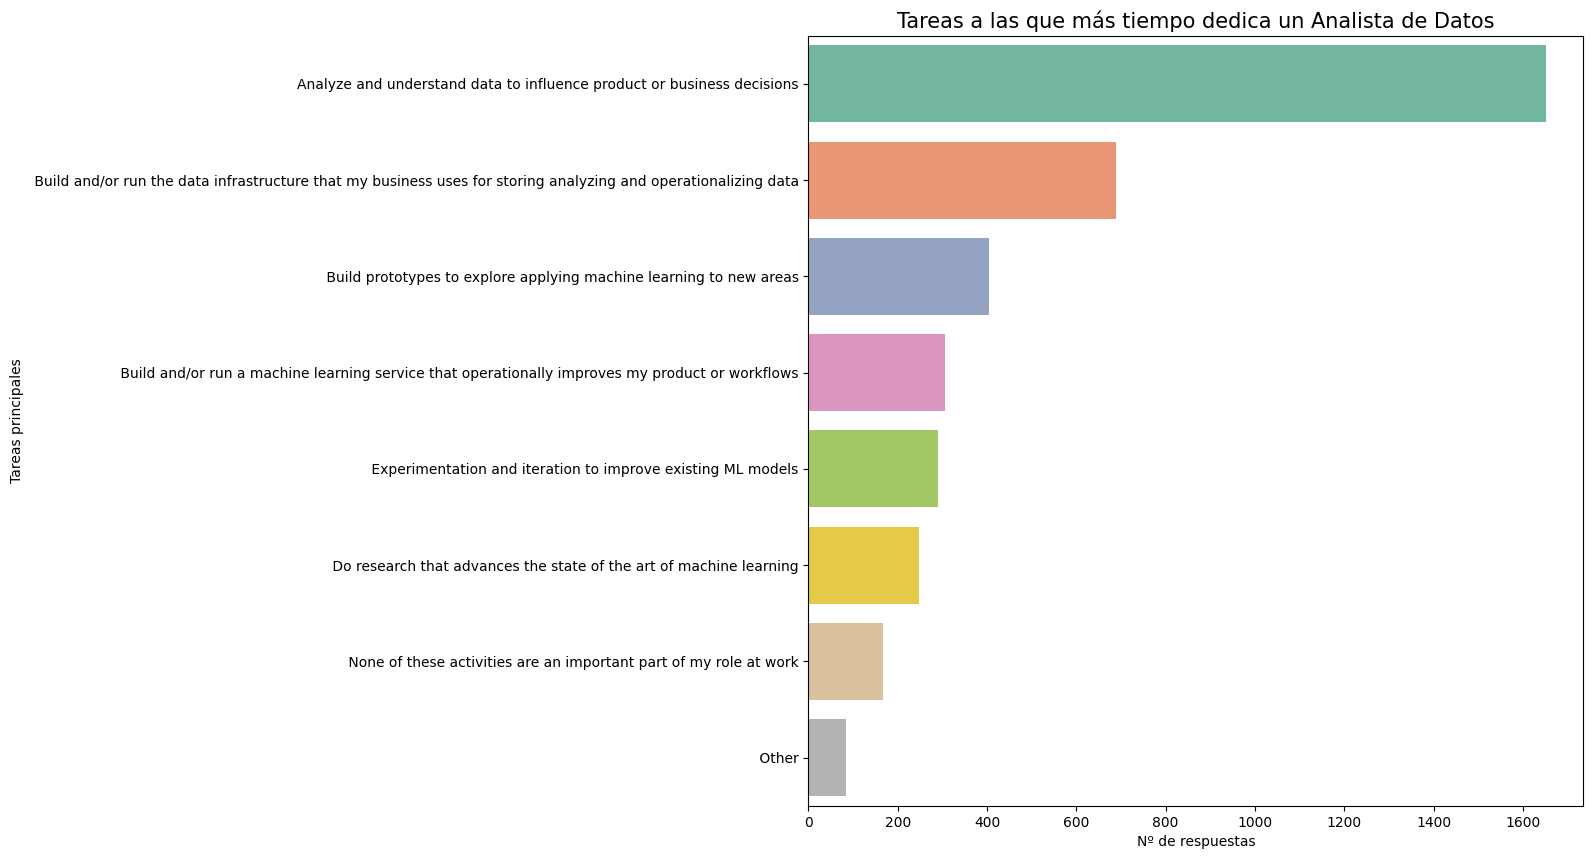

In [15]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q24', data = df_q24, palette = 'Set2', order= df_q24['q24'].value_counts().reset_index()['index'])

fig.set_title('Tareas a las que más tiempo dedica un Analista de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Tareas principales') 

plt.show();

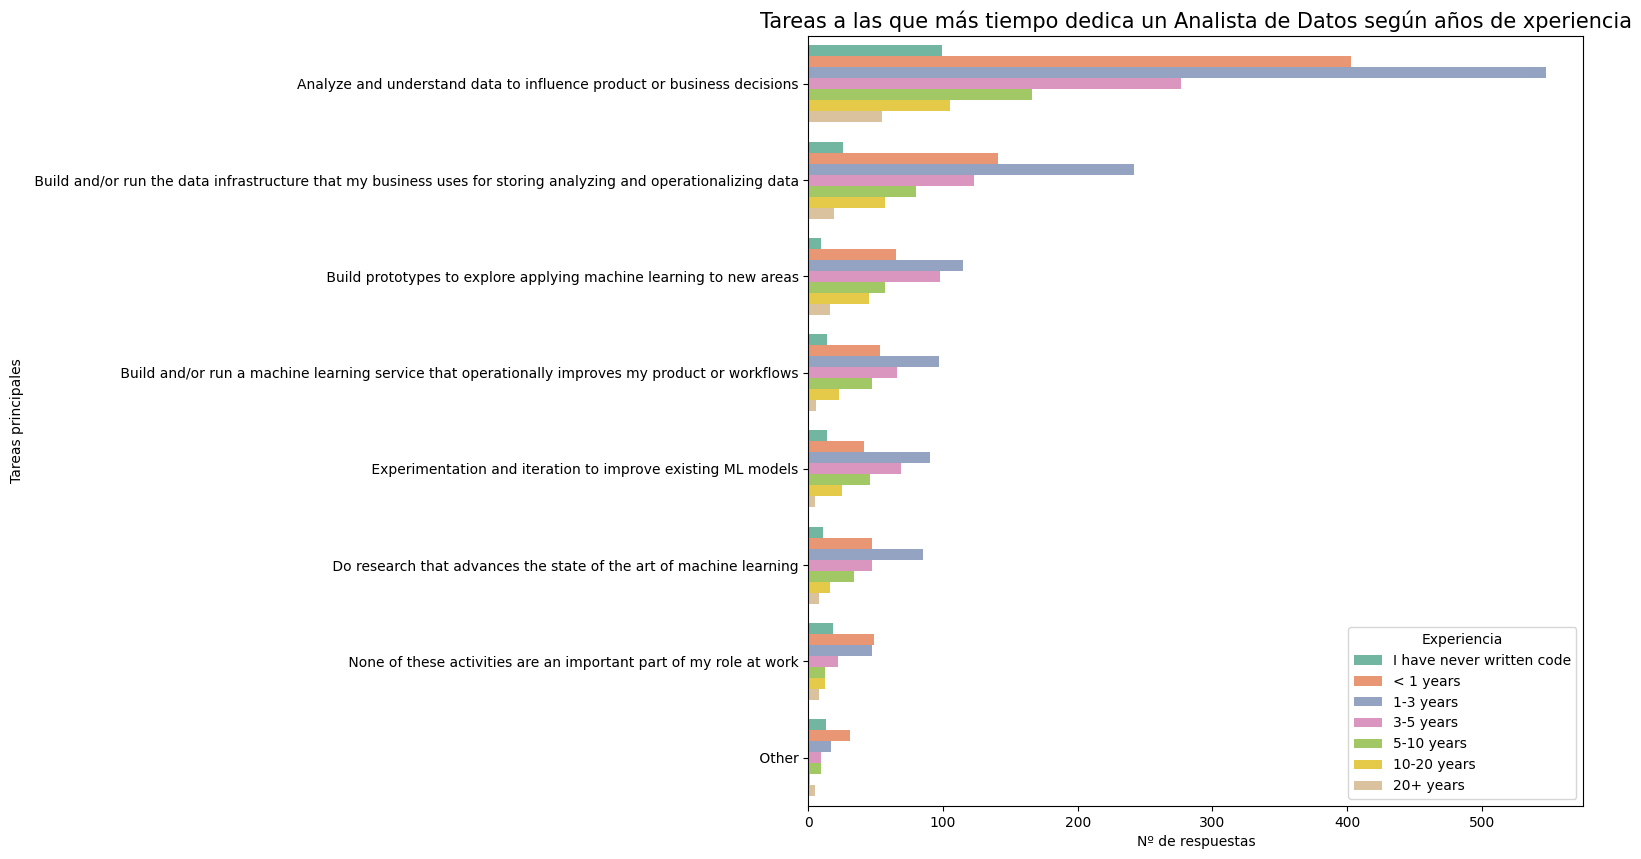

In [16]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q24', data = df_q24, palette = 'Set2', hue= 'q6', order=df_q24['q24'].value_counts().reset_index()['index'], 
                    hue_order=spv.orden_experiencia)

fig.set_title('Tareas a las que más tiempo dedica un Analista de Datos según años de xperiencia', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Tareas principales') 

plt.legend(title='Experiencia')

plt.show();

- Distribución por edades

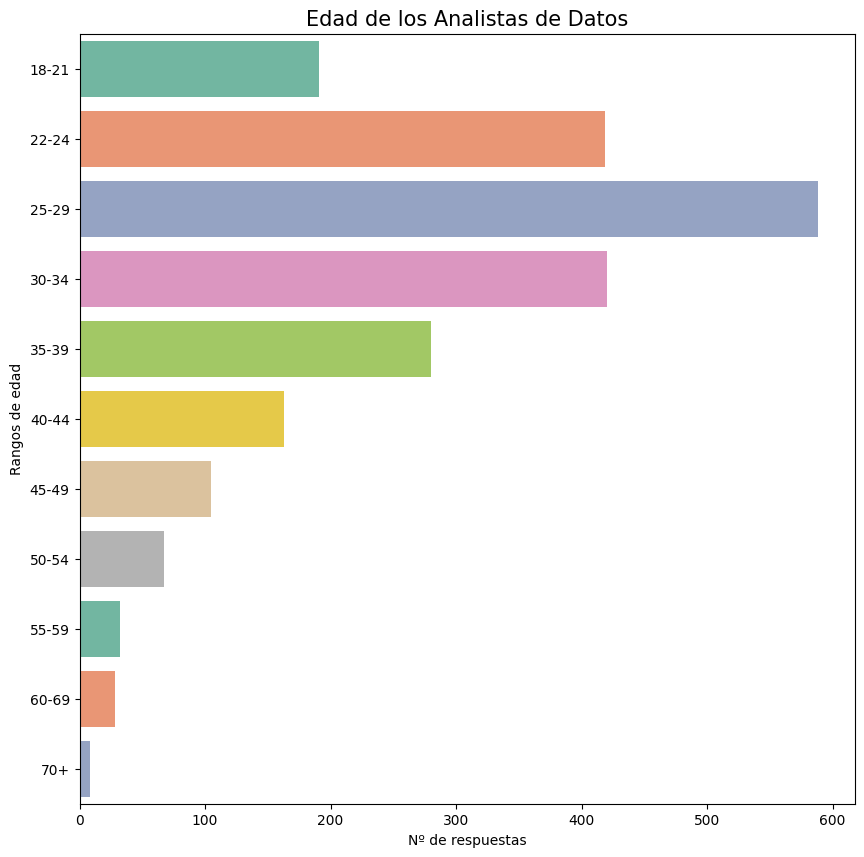

In [17]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'age', data = df, palette = 'Set2', order=spv.orden_edades)

fig.set_title('Edad de los Analistas de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Rangos de edad') 

plt.show();

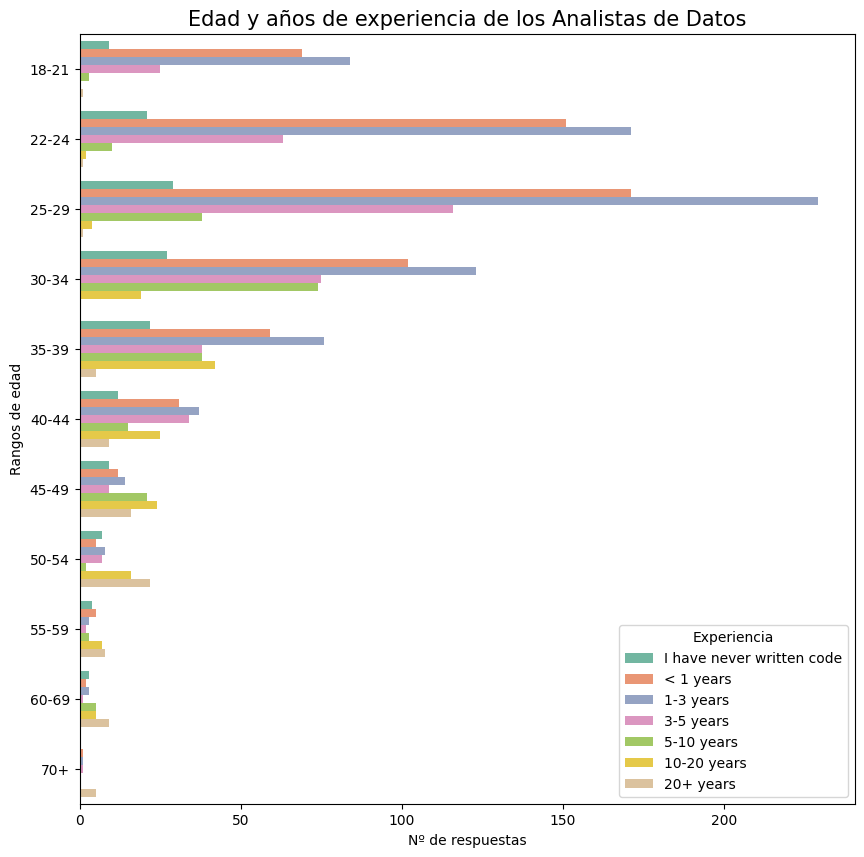

In [18]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'age', data = df, palette = 'Set2', hue= 'q6', order=spv.orden_edades, hue_order=spv.orden_experiencia)

fig.set_title('Edad y años de experiencia de los Analistas de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Rangos de edad') 

plt.legend(title='Experiencia')

plt.show();

- Experiencia como Data Analist

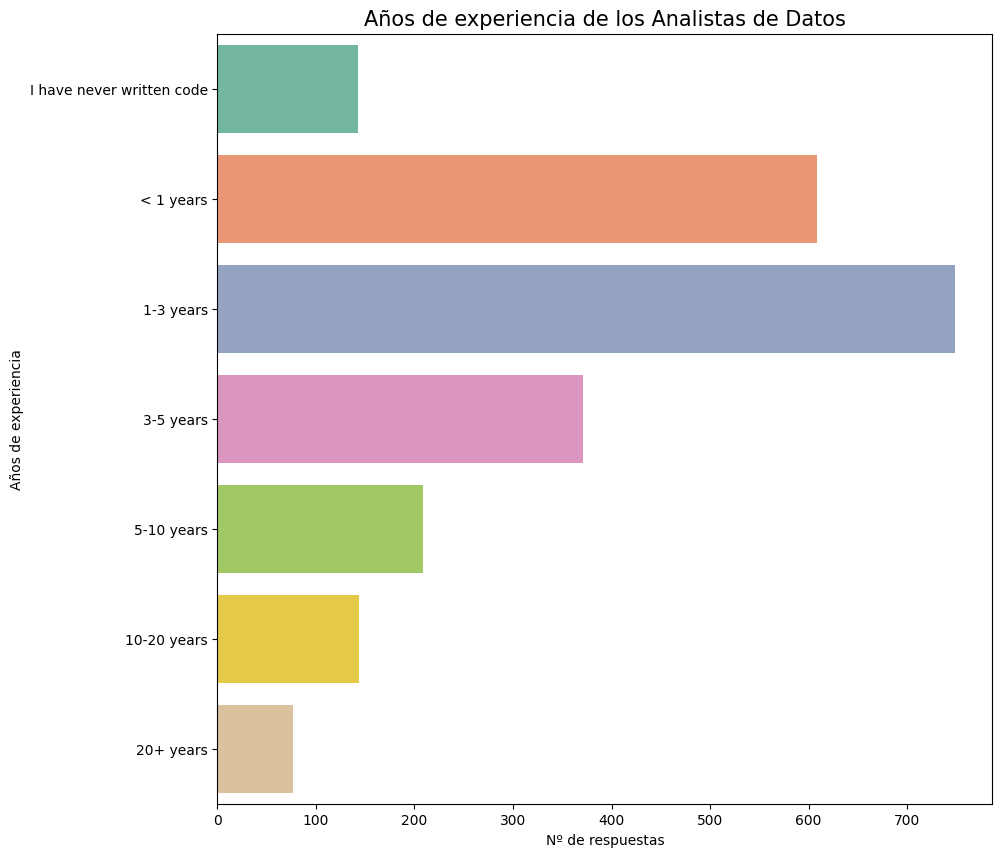

In [19]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q6', data = df, palette = 'Set2', order=spv.orden_experiencia)

fig.set_title('Años de experiencia de los Analistas de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Años de experiencia')

plt.rcParams.update({'font.size': 20})

plt.show();

In [20]:
# obtenemos los porcentajes
años_exp = pd.DataFrame(df['q6'].value_counts()*100/df.shape[0]).reset_index()
años_exp

index         q6
0                  1-3 years  32.551065
1                  < 1 years  26.423294
2                  3-5 years  16.123425
3                 5-10 years   9.083007
4                10-20 years   6.258149
5  I have never written code   6.214689
6                  20+ years   3.346371

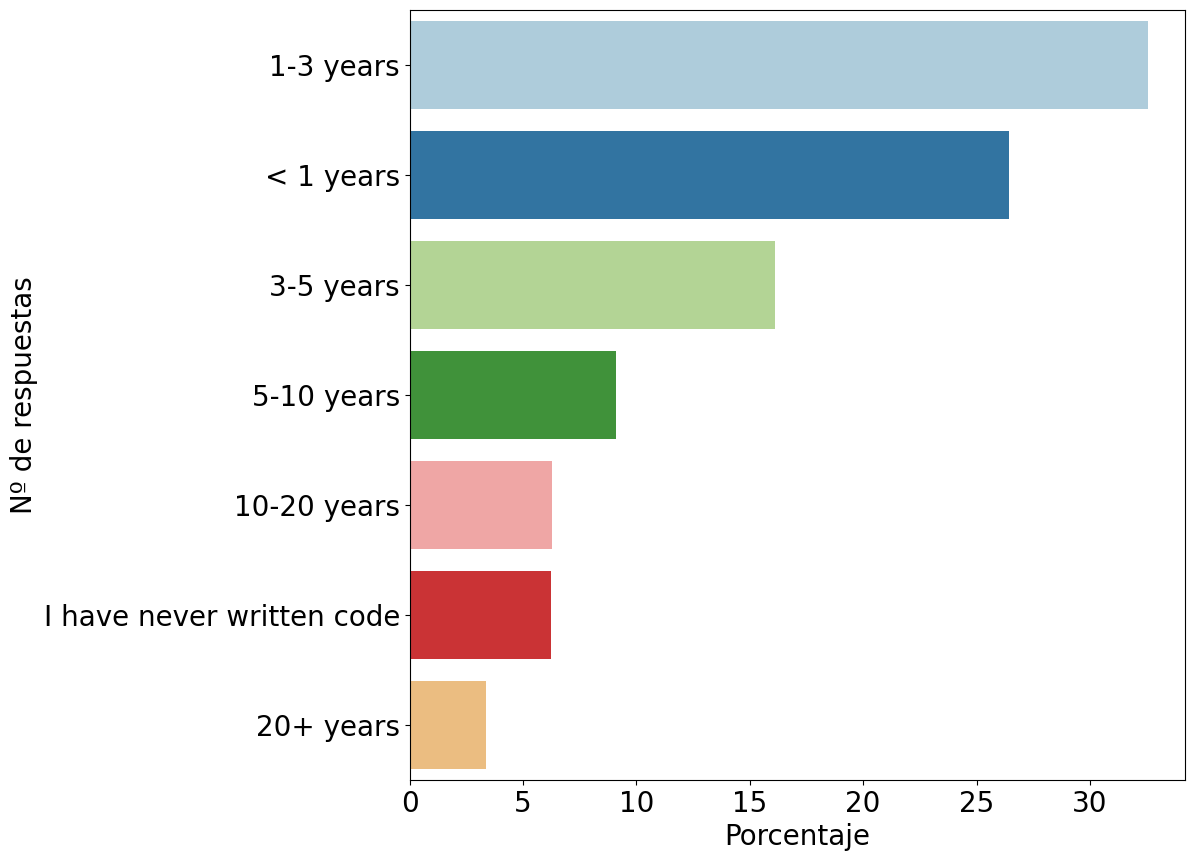

In [21]:
plt.figure(figsize = (10,10))

sns.barplot(x = 'q6', y = 'index', data = años_exp, palette = 'Paired',)

plt.ylabel('Nº de respuestas')
plt.xlabel('Porcentaje')

plt.show();

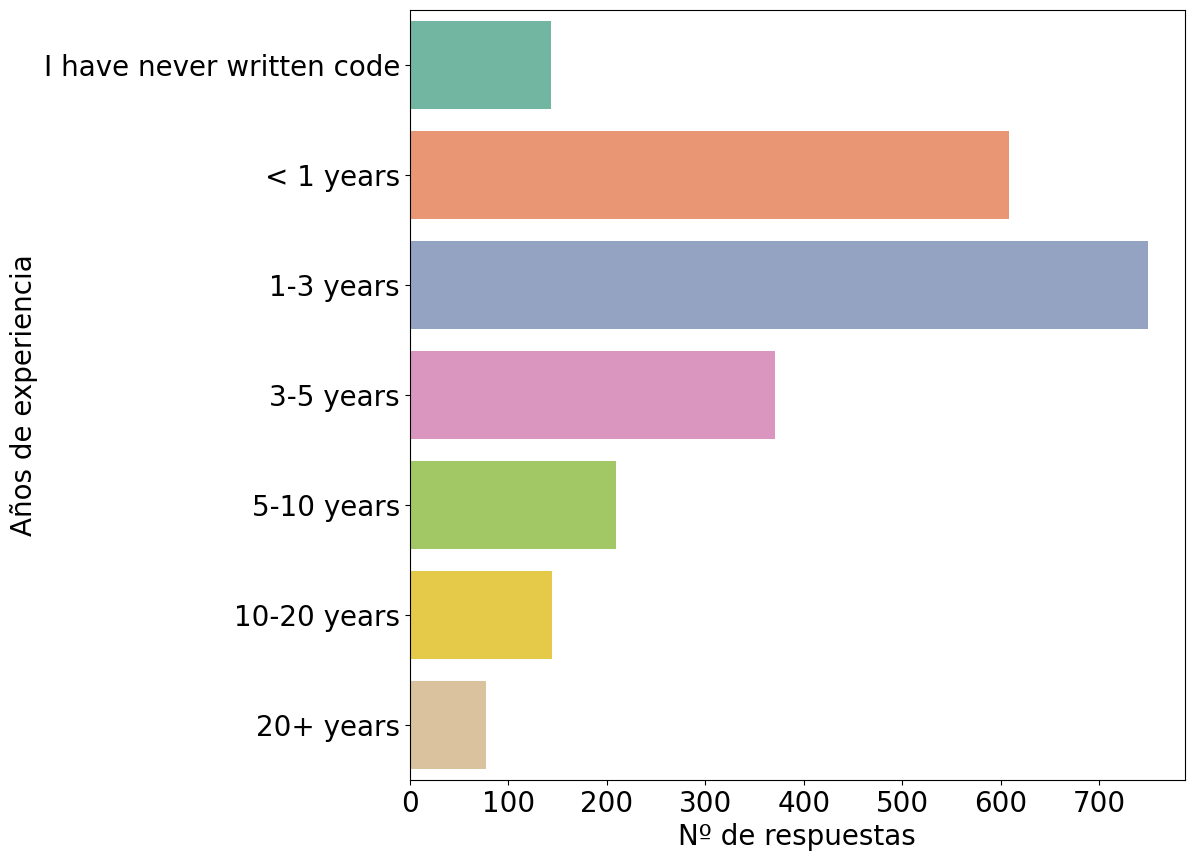

In [22]:
# modificada para presentación
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q6', data = df, palette = 'Set2', order=spv.orden_experiencia)

fig.set(xlabel='Nº de respuestas', ylabel='Años de experiencia')

plt.rcParams.update({'font.size': 20})

plt.show();

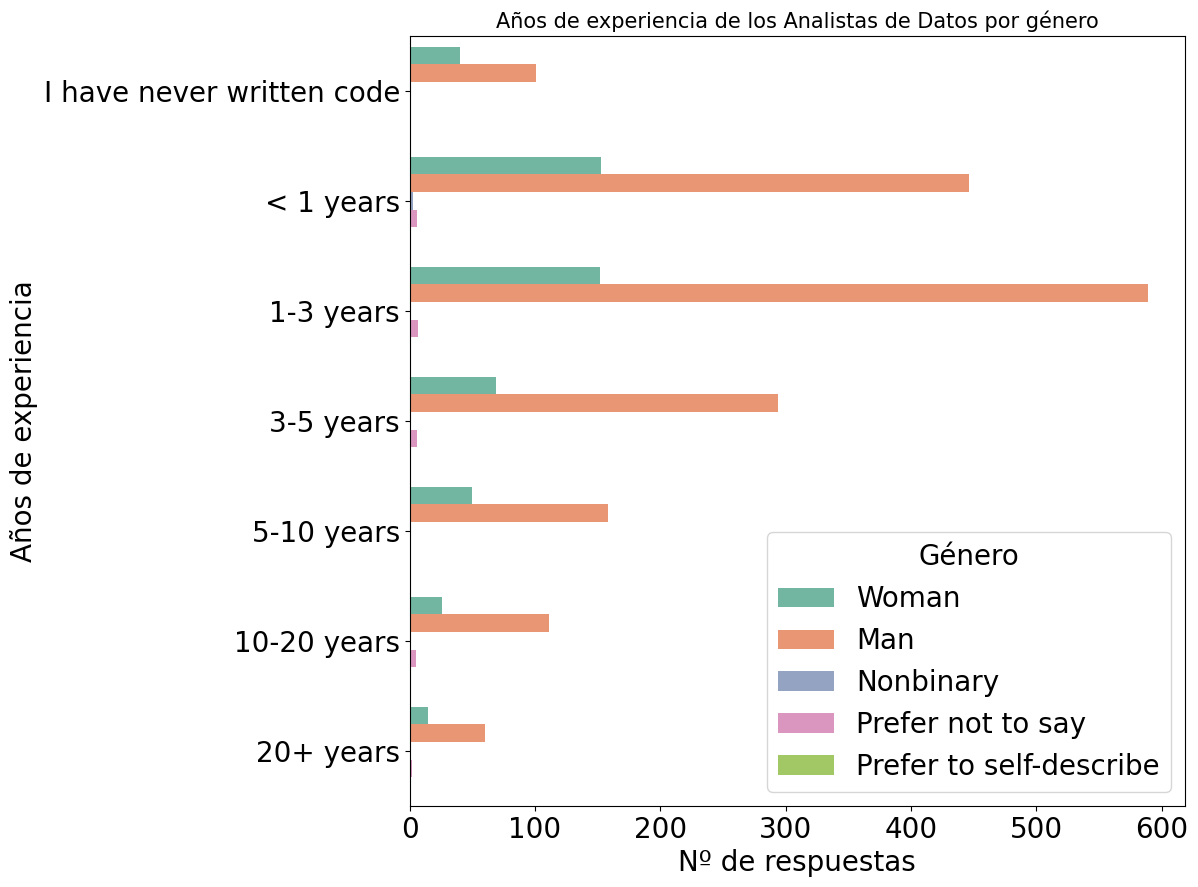

In [23]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q6', data = df, palette = 'Set2', hue = 'gender', order=spv.orden_experiencia, hue_order=spv.orden_genero)

fig.set_title('Años de experiencia de los Analistas de Datos por género', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Años de experiencia') 

plt.legend(title='Género')

plt.show();

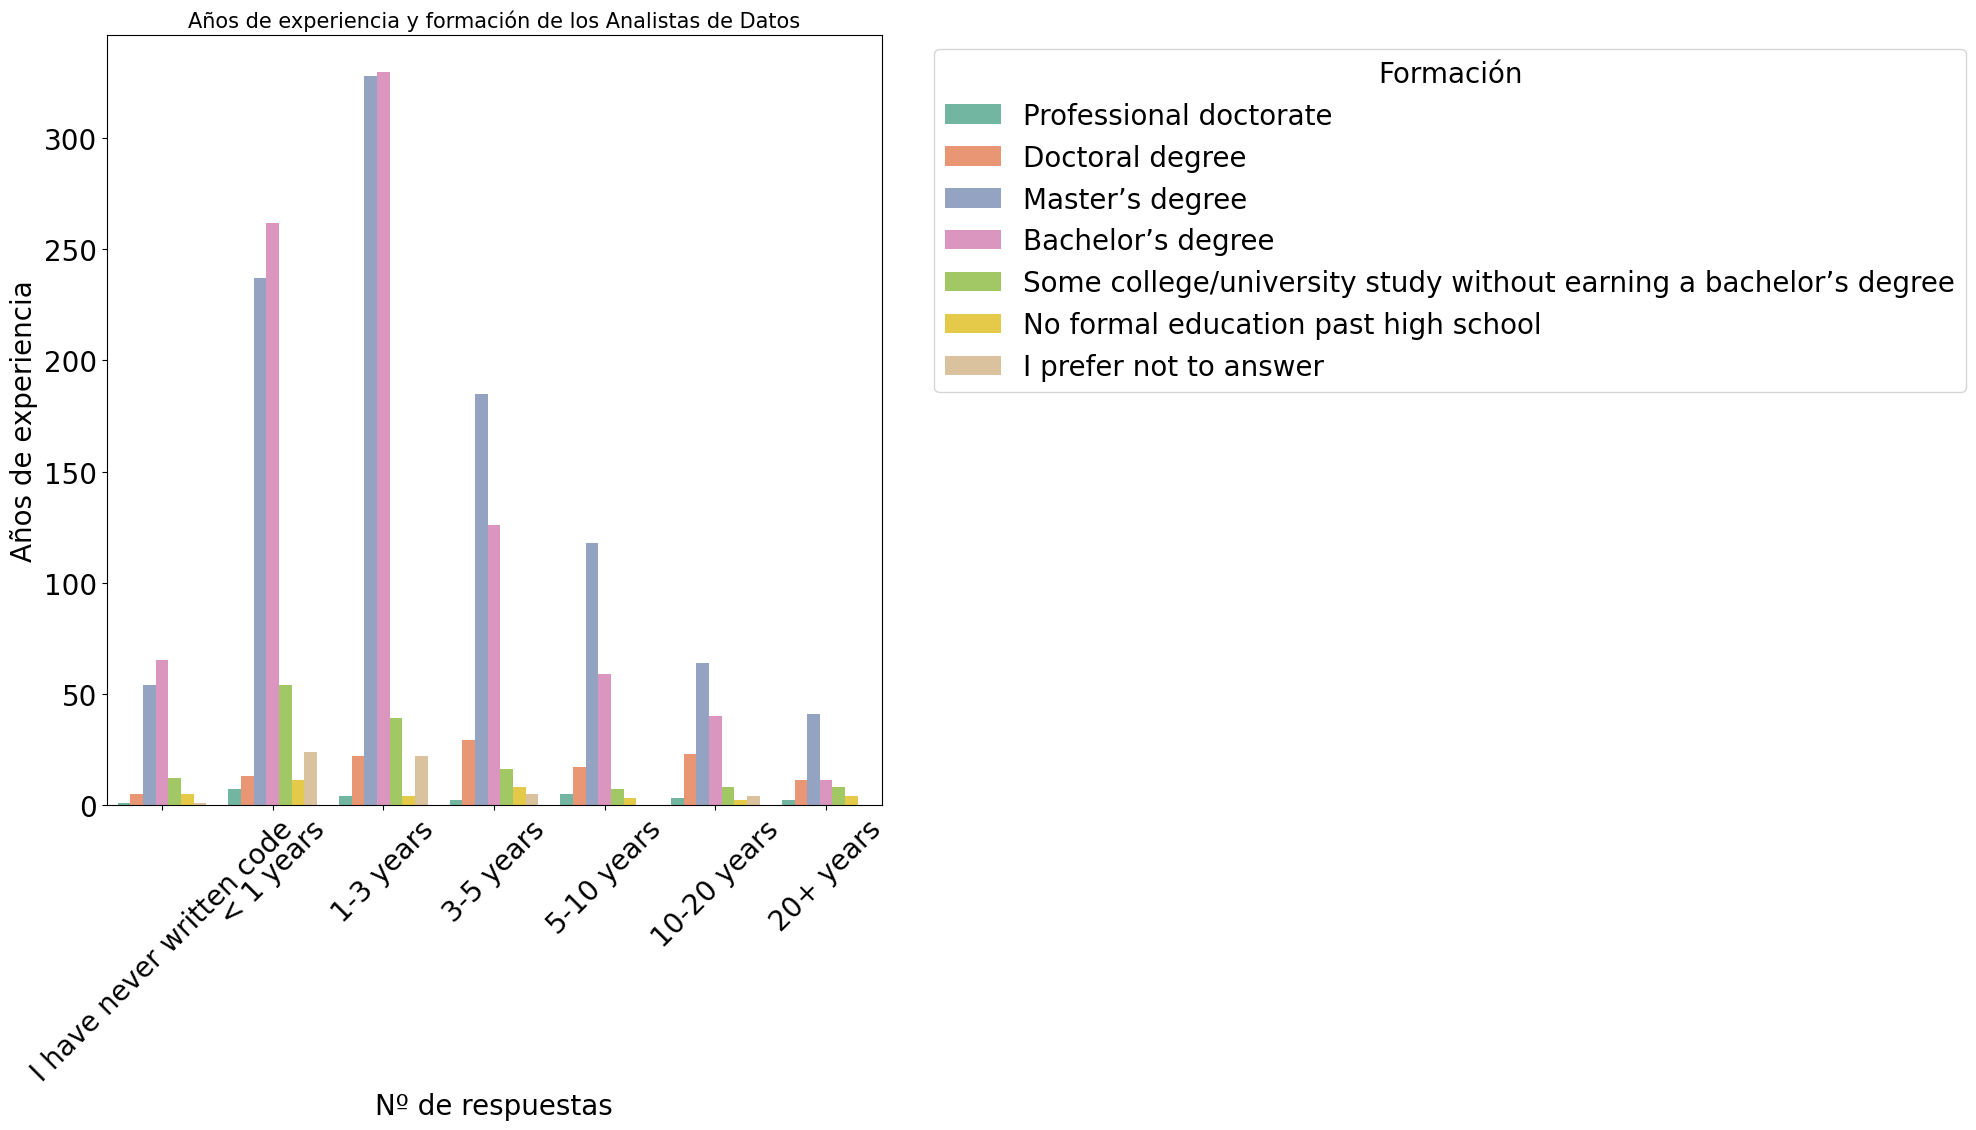

In [24]:
plt.figure(figsize = (10,10))

fig = sns.countplot(x='q6', data = df, palette = 'Set2', hue = 'q4', order=spv.orden_experiencia, hue_order=spv.orden_formacion)

fig.set_title('Años de experiencia y formación de los Analistas de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Años de experiencia') 

plt.xticks(rotation=45)

plt.legend(title='Formación', bbox_to_anchor=(1.05, 1))

plt.show();

- Paises / continentes

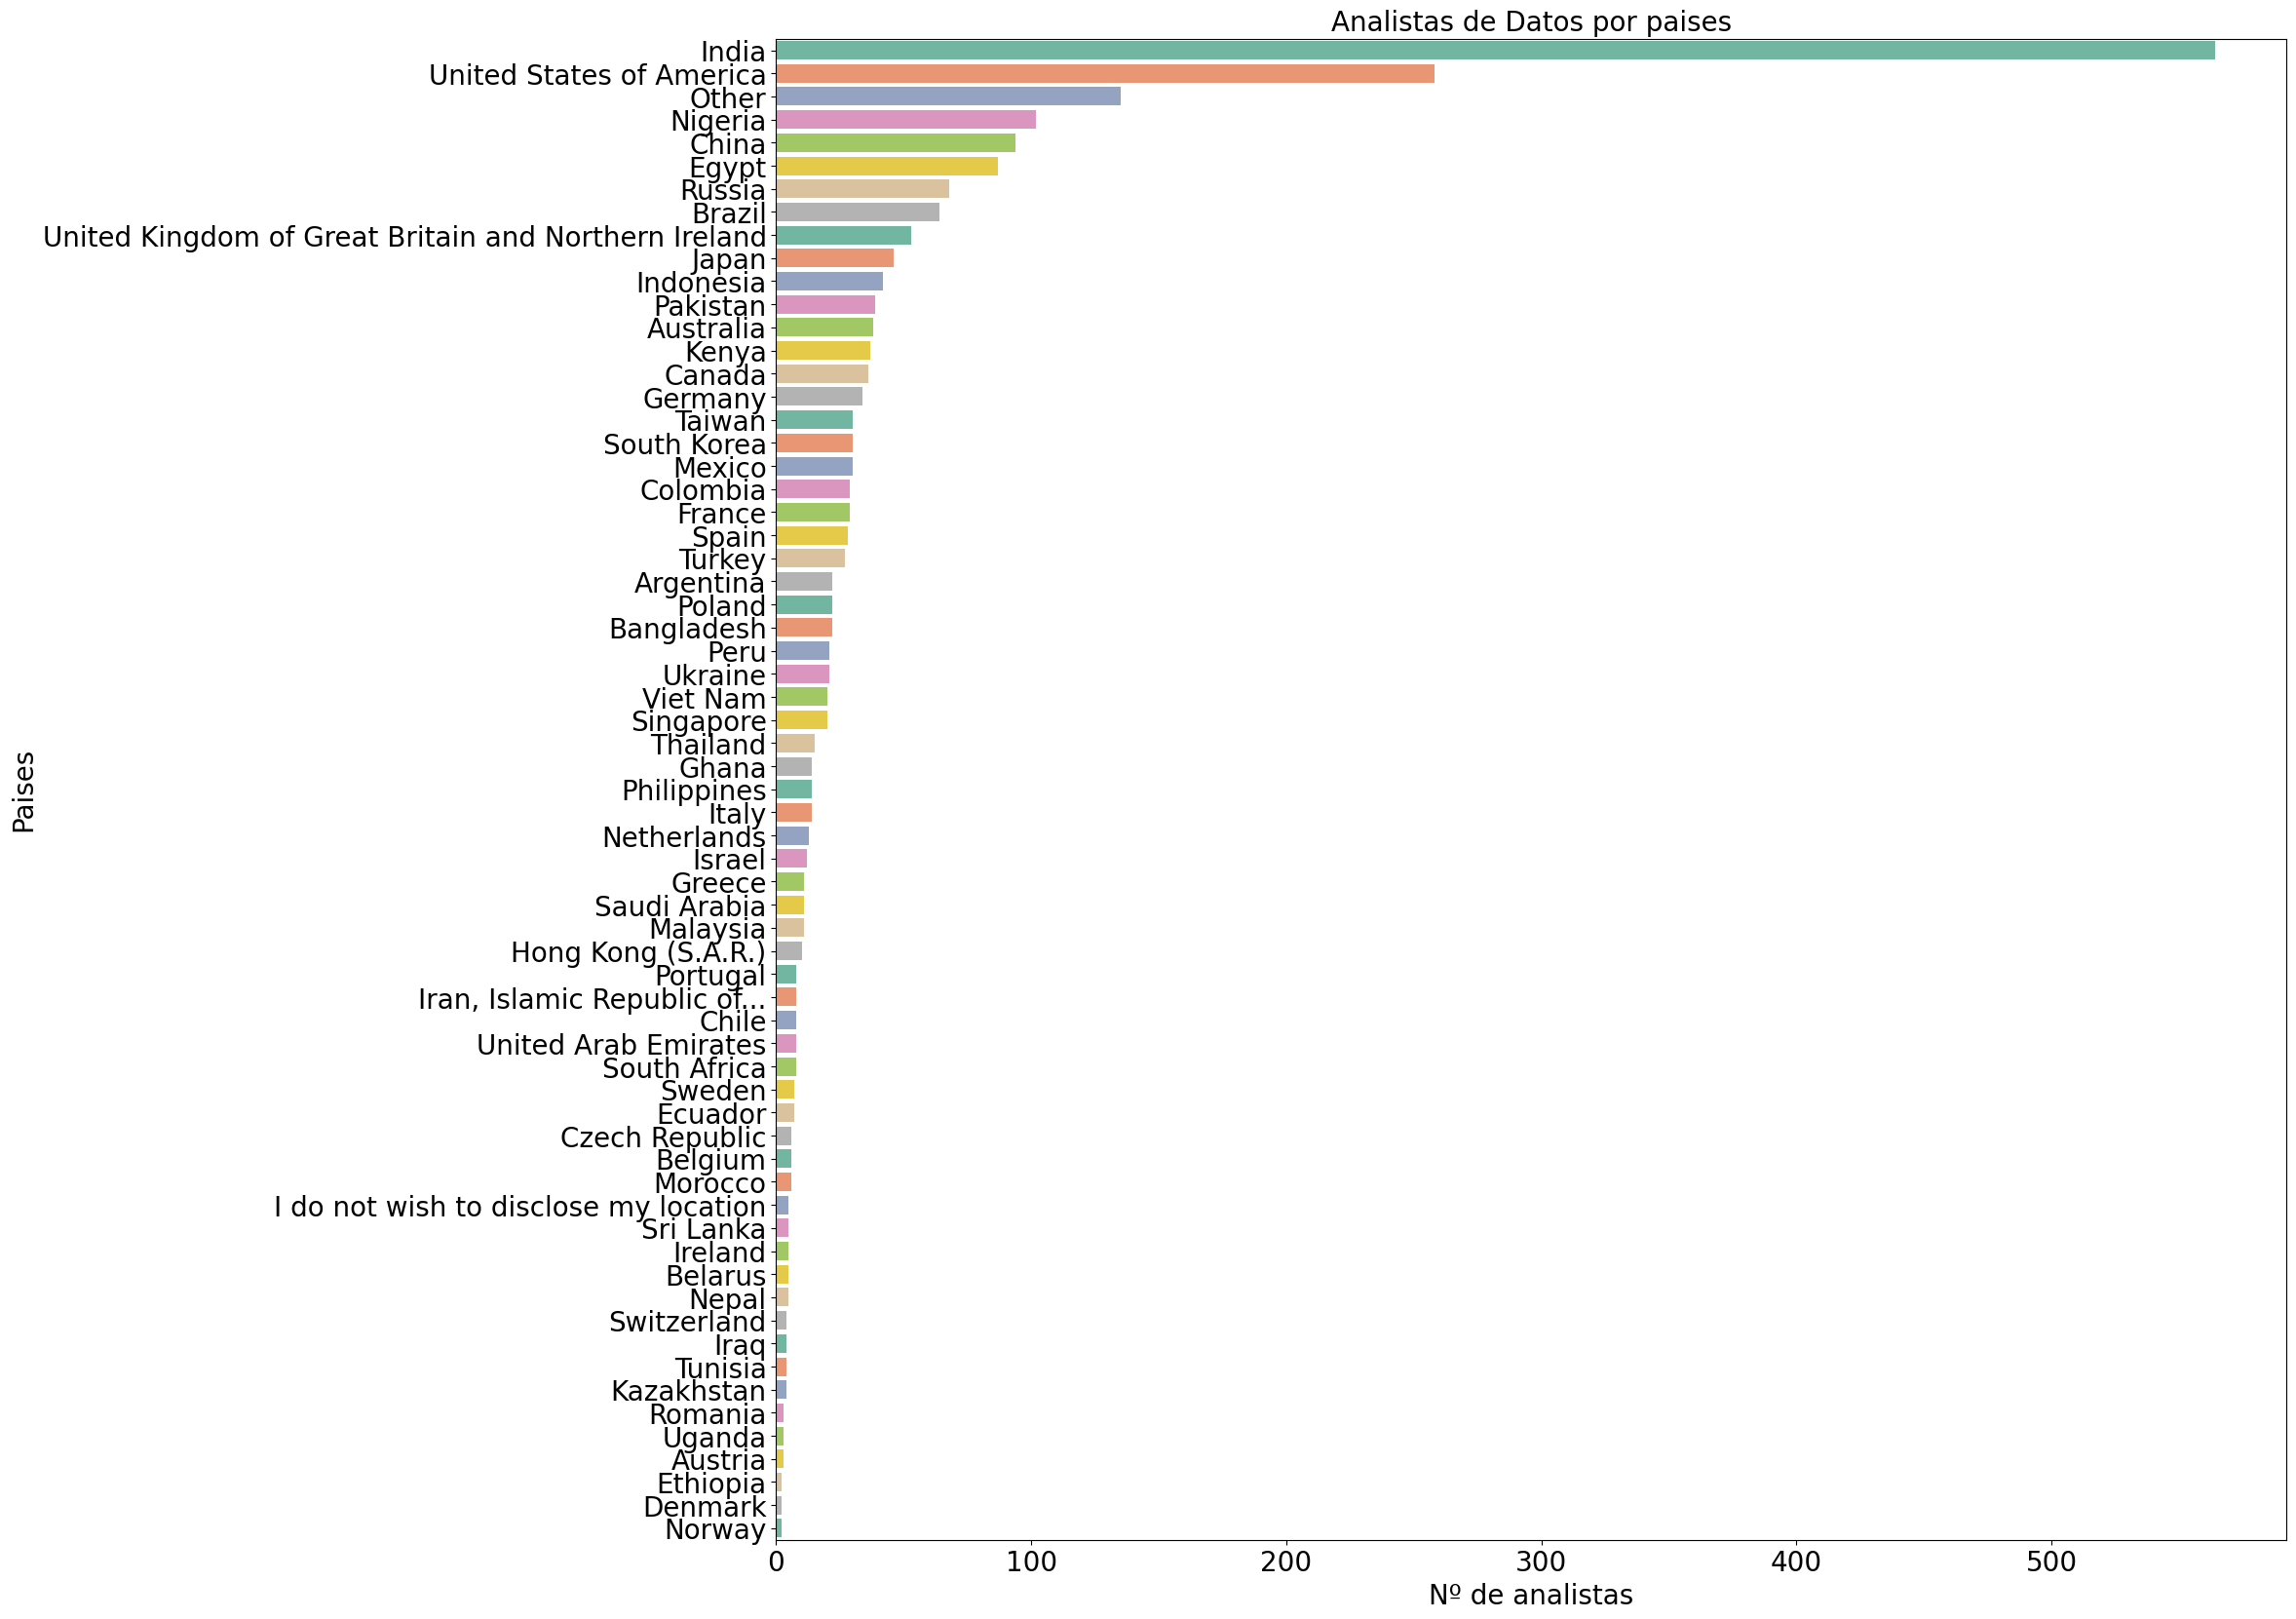

In [25]:
plt.figure(figsize = (20,20))

fig = sns.countplot(y='q3', data = df,  palette = 'Set2', order = df['q3'].value_counts().reset_index()['index'])

fig.set_title('Analistas de Datos por paises', fontsize = 20)

fig.set(xlabel='Nº de analistas', ylabel='Paises') 

plt.rcParams.update({'font.size': 4})

plt.show();

In [26]:
plt.rcParams.update({'font.size': 20}) # nesesario para ajustar tamaño siguiente gráfico

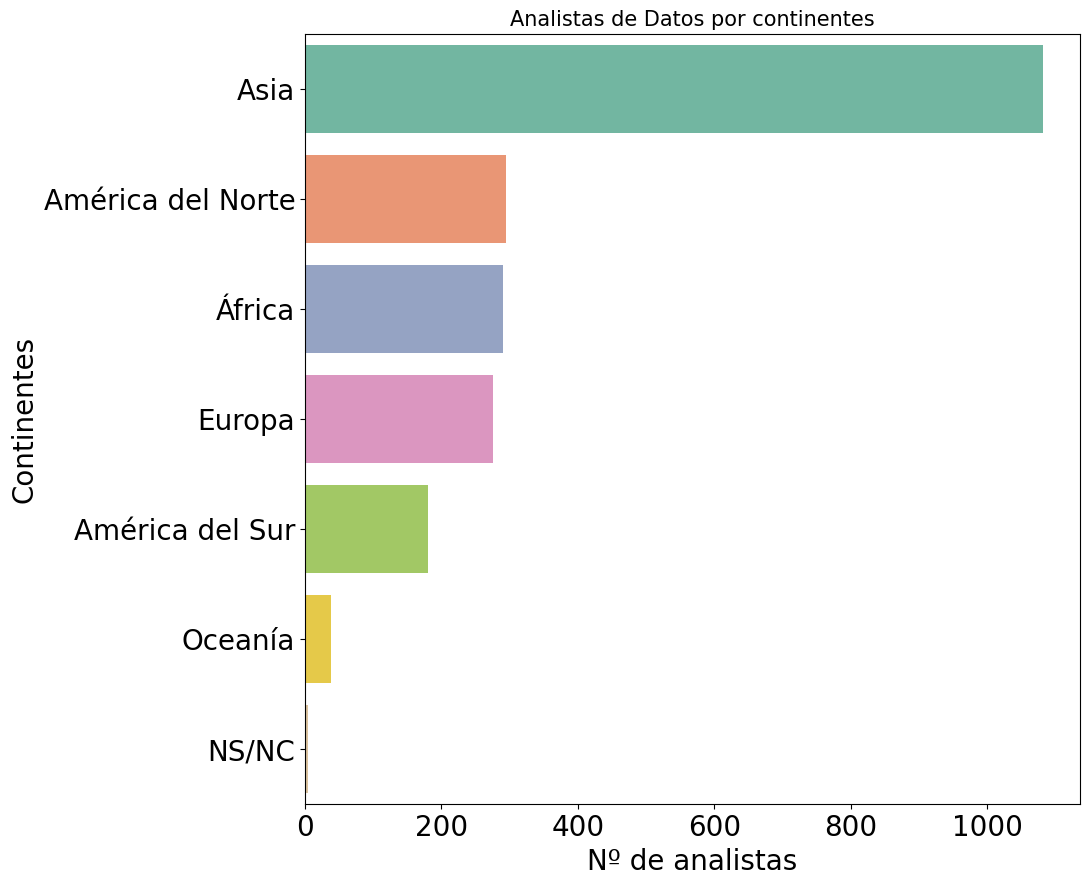

In [27]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='continente', data = df,  palette = 'Set2', order = df['continente'].value_counts().reset_index()['index'])

fig.set_title('Analistas de Datos por continentes', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Continentes') 

plt.rcParams.update({'font.size': 20})

plt.show();

In [28]:
# sacamos los porcentajes
dis_continentes = pd.DataFrame(df['continente'].value_counts()*100/df.shape[0]).reset_index()
dis_continentes 

index  continente
0               Asia   47.023033
1  América del Norte   12.777053
2             África   12.603216
3             Europa   11.994785
4    América del Sur    7.866145
5            Oceanía    1.651456
6              NS/NC    0.217297

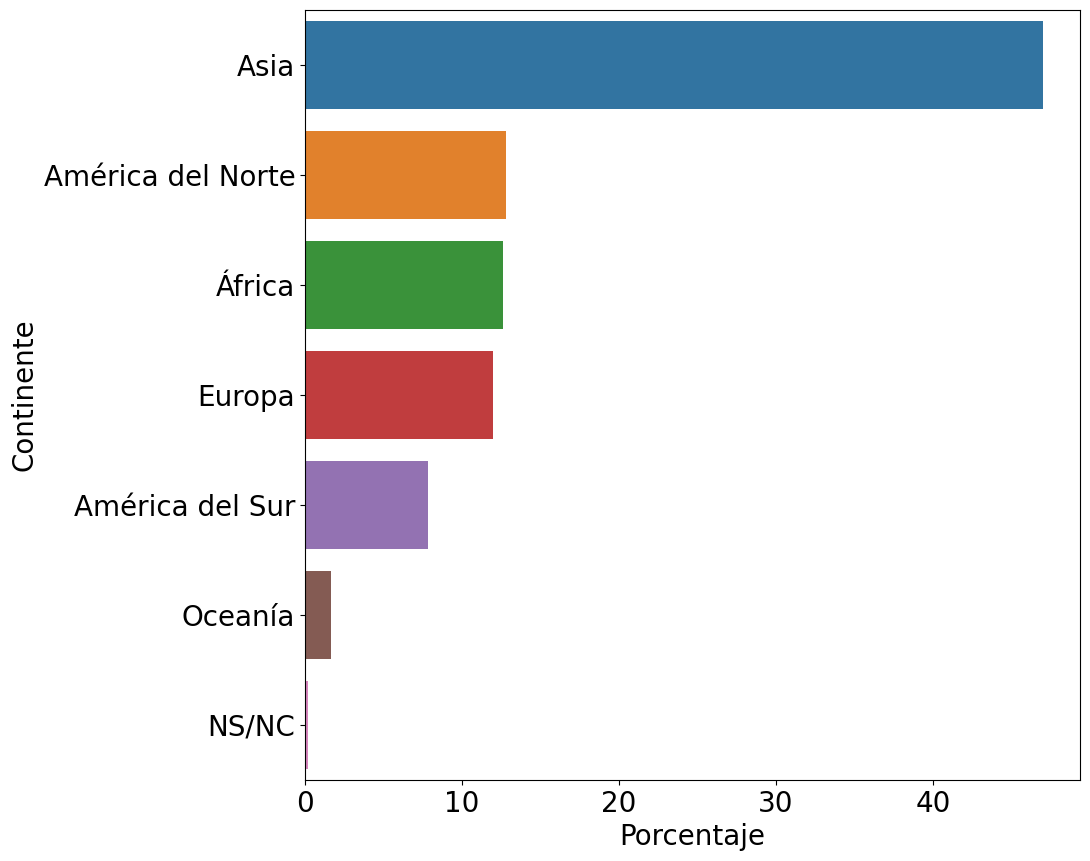

In [29]:
plt.figure(figsize = (10,10))

sns.barplot(x = 'continente', y = 'index', data = dis_continentes)

plt.ylabel('Continente')

plt.xlabel('Porcentaje')

plt.show();

In [30]:
dis_continentes['continente'].unique()

array([47.02303346, 12.77705346, 12.60321599, 11.99478488,  7.86614515,
        1.65145589,  0.21729683])

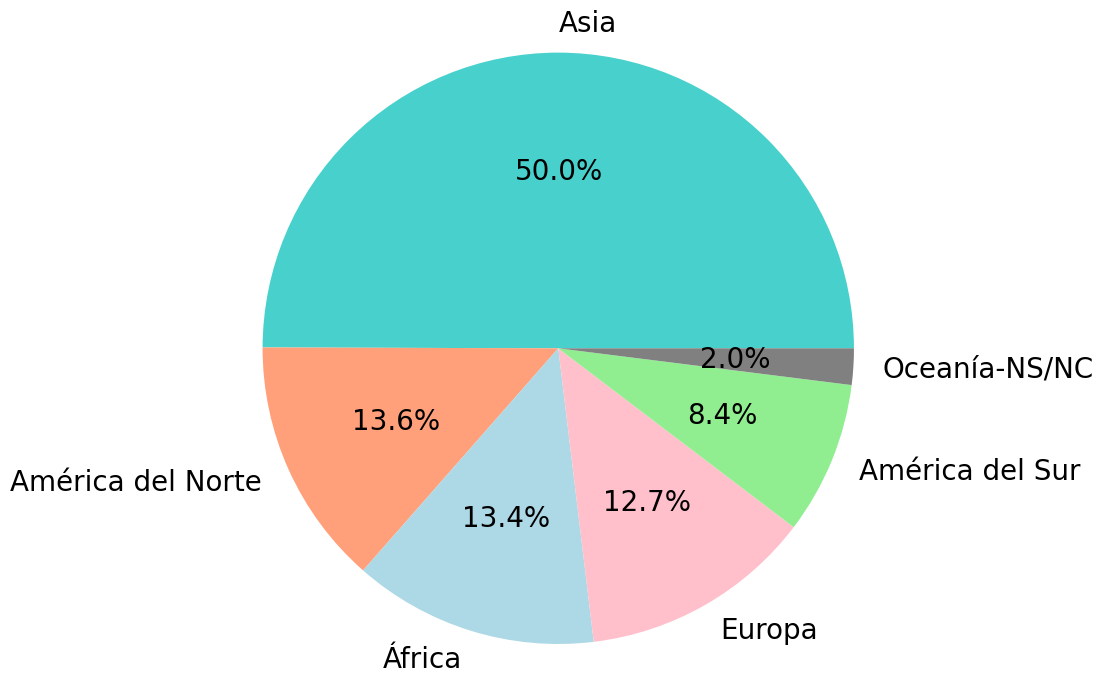

In [31]:
# para presentación
data_paises = {'index': ['Asia', 'América del Norte', 'África', 'Europa', 'América del Sur', 'Oceanía-NS/NC'],
        'continente': [47.02303346, 12.77705346, 12.60321599, 11.99478488,  7.86614515, 1.65145589 + 0.21729683]}
df_paises = pd.DataFrame(data_paises)

fig, ax = plt.subplots()

colors = ['mediumturquoise', 'lightsalmon', 'lightblue', 'pink', 'lightgreen', 'grey']

ax.pie(df_paises['continente'], labels = df_paises['index'], colors= colors, radius = 2, autopct='%1.1f%%')

plt.rcParams.update({'font.size': 15})

plt.show()

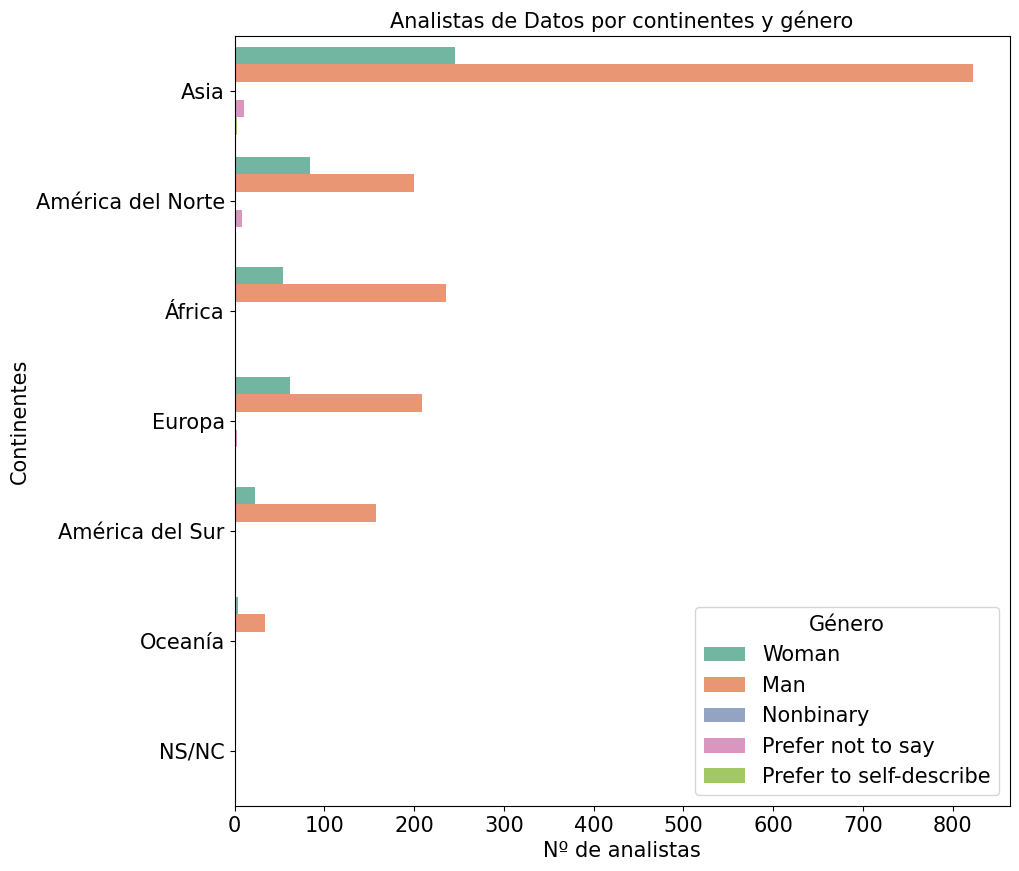

In [32]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='continente', data = df,  palette = 'Set2', hue = 'gender', order = df['continente'].value_counts().reset_index()['index'], hue_order = spv.orden_genero)

fig.set_title('Analistas de Datos por continentes y género', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Continentes') 

plt.legend(title='Género')

plt.show();

- Sectores

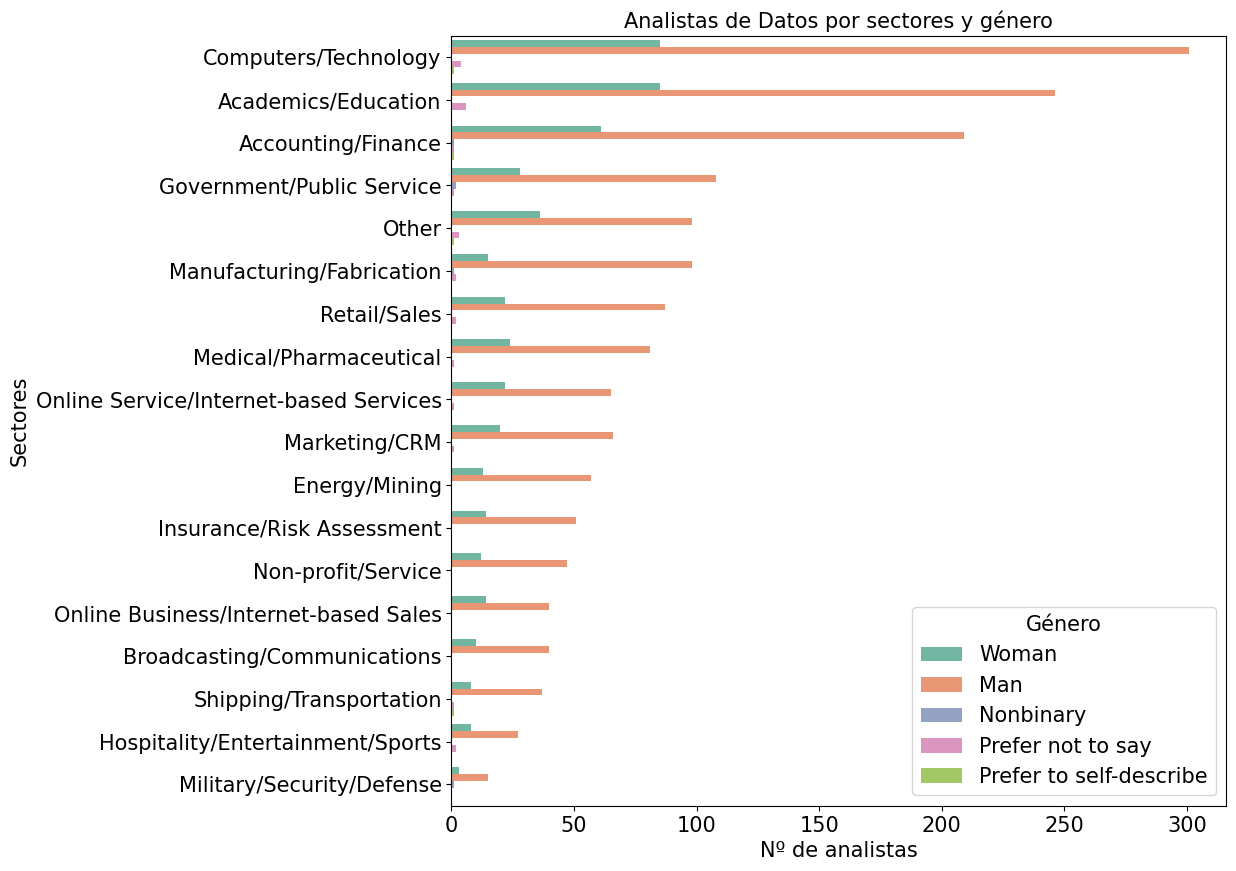

In [33]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q20', data = df_q20,  palette = 'Set2', hue = 'gender', order = df_q20['q20'].value_counts().reset_index()['index'], hue_order = spv.orden_genero)

fig.set_title('Analistas de Datos por sectores y género', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Sectores') 

plt.legend(title='Género')

plt.show();

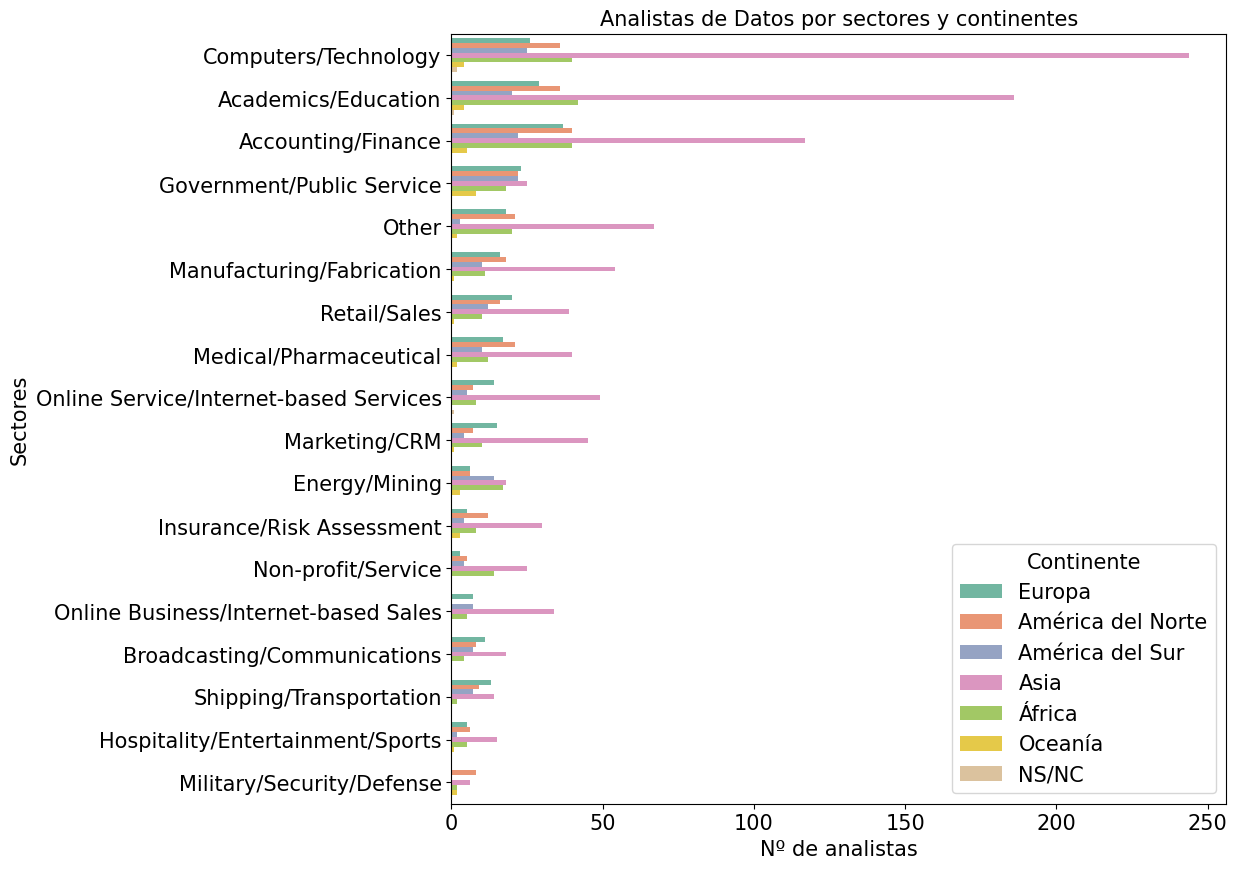

In [34]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q20', data = df_q20,  palette = 'Set2', hue = 'continente', order = df_q20['q20'].value_counts().reset_index()['index'], hue_order = spv.orden_continentes)

fig.set_title('Analistas de Datos por sectores y continentes', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Sectores') 

plt.legend(title='Continente')

plt.show();

- Género

In [35]:
# sacamos los porcentajes
gender = pd.DataFrame(df['gender'].value_counts()*100/df.shape[0]).reset_index()
gender

index     gender
0                      Man  76.445024
1                    Woman  21.946980
2        Prefer not to say   1.216862
3                Nonbinary   0.217297
4  Prefer to self-describe   0.173837

In [36]:
europa = df[df['continente'] == 'Europa']
europa['continente'].unique()

array(['Europa'], dtype=object)

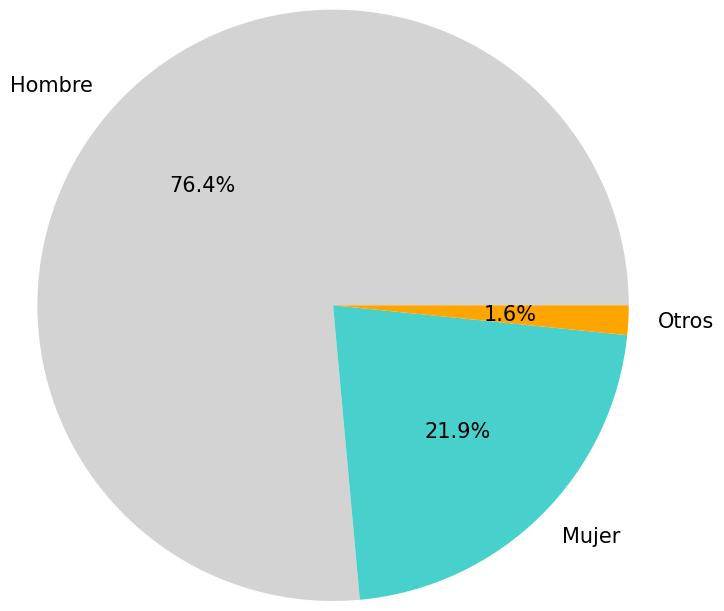

In [37]:
data = {'gender': ['Hombre', 'Mujer', 'Otros'],
        'count': [76.445024, 21.946980, 1.216862 + 0.217297 + 0.173837]}
df_gender = pd.DataFrame(data)

fig, ax = plt.subplots()

colors = ['lightgrey', 'mediumturquoise', 'orange']

ax.pie(df_gender['count'], labels = df_gender['gender'], radius = 2, colors=colors, autopct='%1.1f%%')

plt.rcParams.update({'font.size': 20})

plt.show()

In [38]:
# hacemos lo mismo para Europa por si hubiera cambios
gender_eu = pd.DataFrame(europa['gender'].value_counts()*100/europa.shape[0]).reset_index()
gender_eu

index     gender
0                      Man  75.724638
1                    Woman  22.463768
2        Prefer not to say   1.086957
3  Prefer to self-describe   0.362319
4                Nonbinary   0.362319

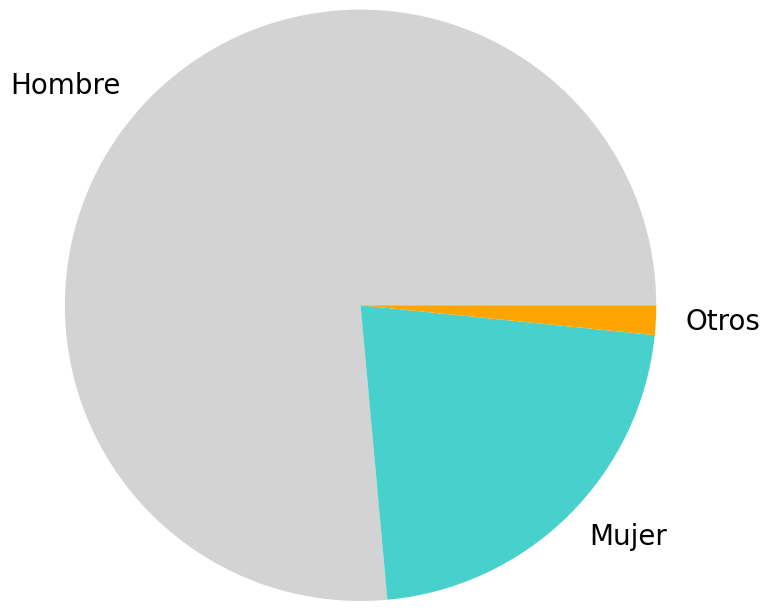

In [39]:
data_eu = {'gender': ['Hombre', 'Mujer', 'Otros'],
        'count': [75.724638, 22.463768, 1.086957 + 0.362319 + 0.362319]}
df_gender_eu = pd.DataFrame(data)

fig, ax = plt.subplots()

colors = ['lightgrey', 'mediumturquoise', 'orange']

ax.pie(df_gender_eu['count'], labels = df_gender_eu['gender'], radius = 2, colors=colors)

plt.rcParams.update({'font.size': 20})

plt.show()

### Herramientas

- Lenguajes de programación

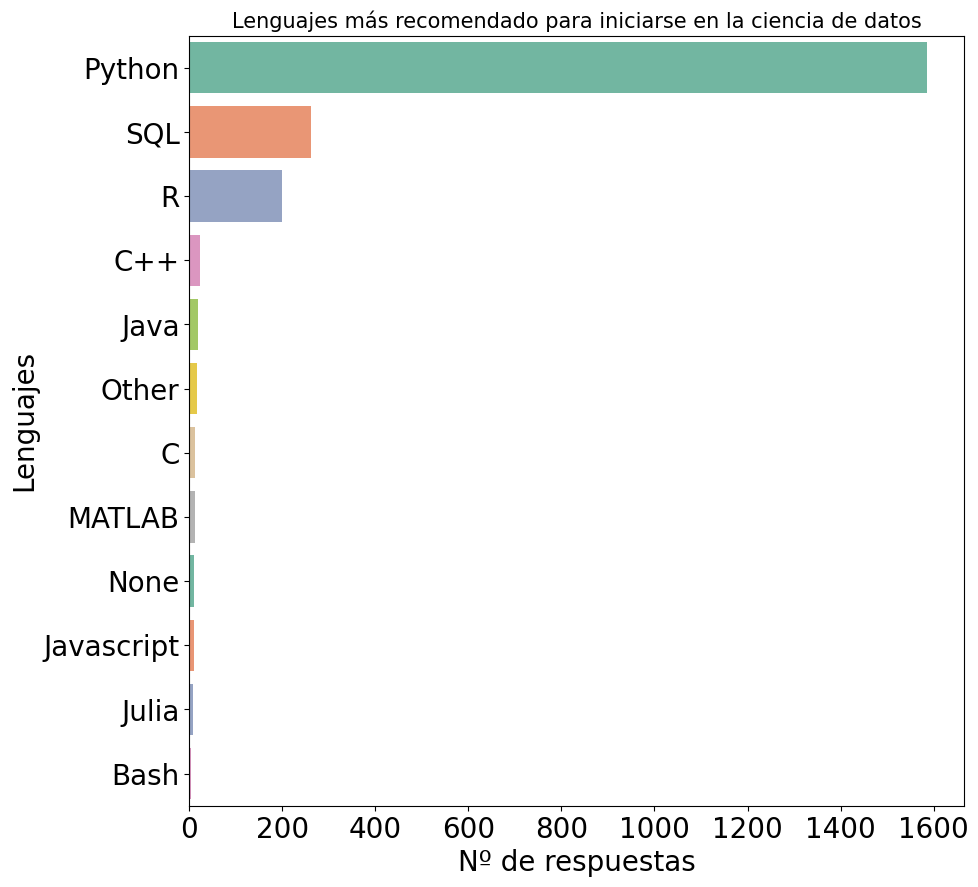

In [40]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q8', data = df, palette = 'Set2', order=df['q8'].value_counts().reset_index()['index'])

fig.set_title('Lenguajes más recomendado para iniciarse en la ciencia de datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Lenguajes') 

plt.show();

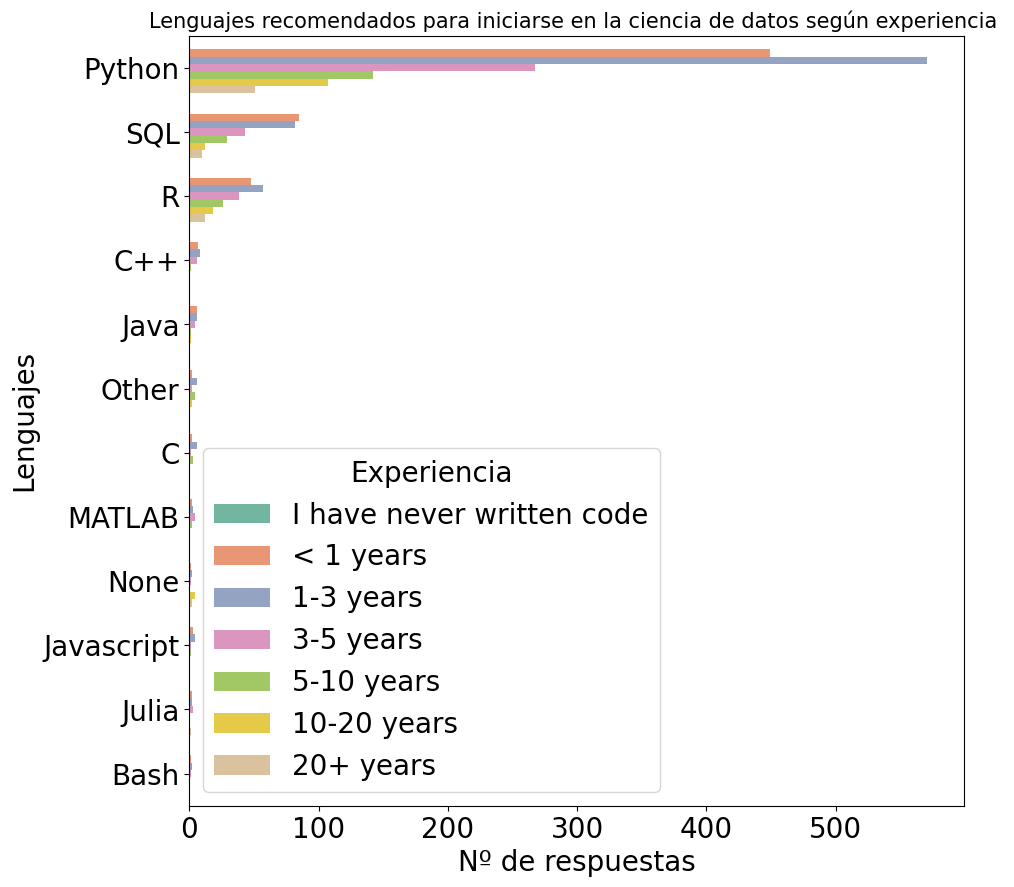

In [41]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q8', data = df, palette = 'Set2', hue = 'q6', order=df['q8'].value_counts().reset_index()['index'], hue_order = spv.orden_experiencia)

fig.set_title('Lenguajes recomendados para iniciarse en la ciencia de datos según experiencia ', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Lenguajes') 

plt.legend(title='Experiencia')

plt.show();

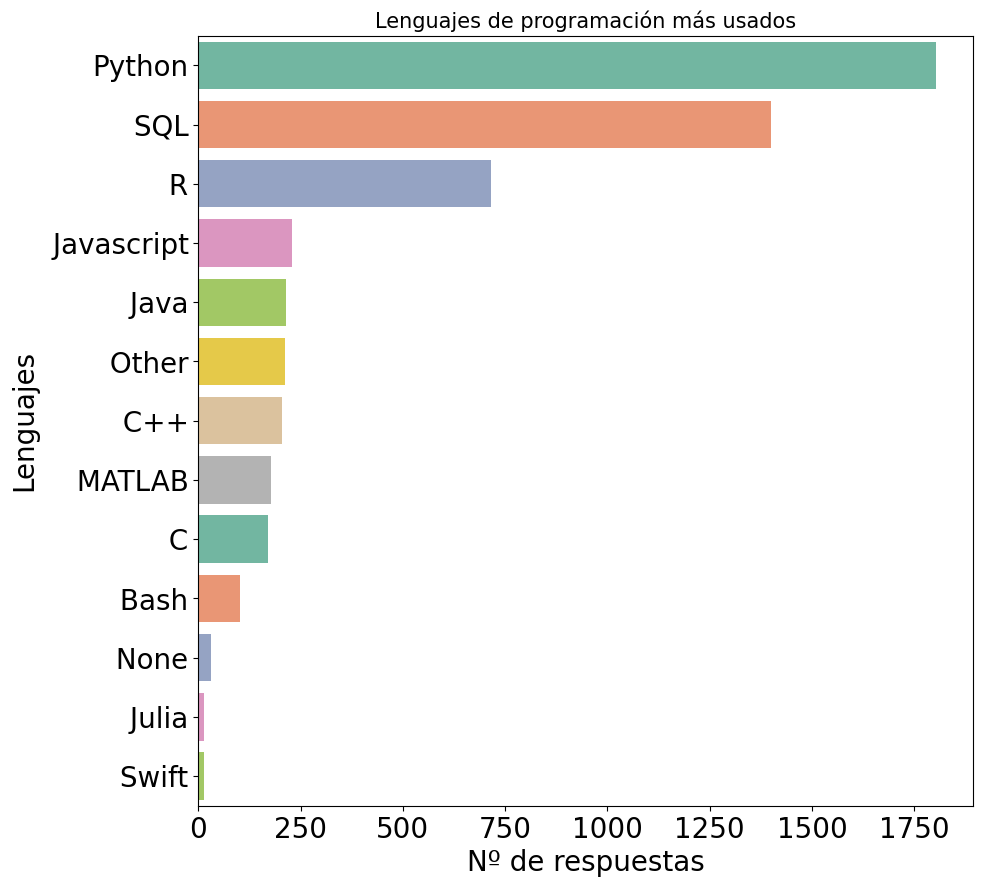

In [42]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q7', data = df_q7, palette = 'Set2', order=df_q7['q7'].value_counts().reset_index()['index'])

fig.set_title('Lenguajes de programación más usados', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Lenguajes') 

plt.show();

In [43]:
df_eaa = df_q7[df_q7['continente'].isin(['Europa', 'América del Norte', 'Asia'])]

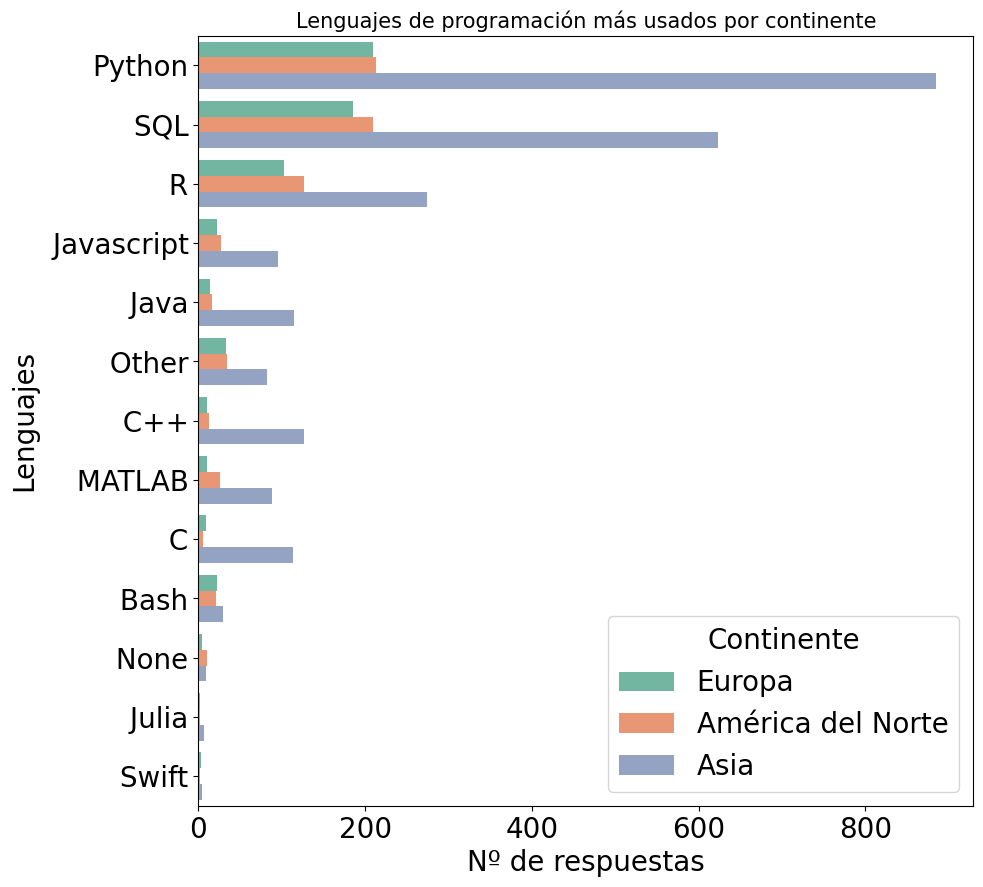

In [44]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q7', hue = 'continente', data = df_eaa, palette = 'Set2', order=df_q7['q7'].value_counts().reset_index()['index'])

fig.set_title('Lenguajes de programación más usados por continente', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Lenguajes') 

plt.legend(title='Continente')

plt.show();

In [45]:
dis_lenguajes = pd.DataFrame(df_q7['q7'].value_counts()*100/df.shape[0]).reset_index()
dis_lenguajes 

index         q7
0        Python  78.400695
1           SQL  60.799652
2             R  31.073446
3    Javascript   9.952195
4          Java   9.300304
5         Other   9.256845
6           C++   8.909170
7        MATLAB   7.692308
8             C   7.431551
9          Bash   4.432855
10         None   1.390700
11        Julia   0.564972
12        Swift   0.564972

In [46]:
dis_lenguajes['q7'].unique()

array([78.40069535, 60.79965233, 31.07344633,  9.9521947 ,  9.30030422,
        9.25684485,  8.90916993,  7.69230769,  7.4315515 ,  4.43285528,
        1.3906997 ,  0.56497175])

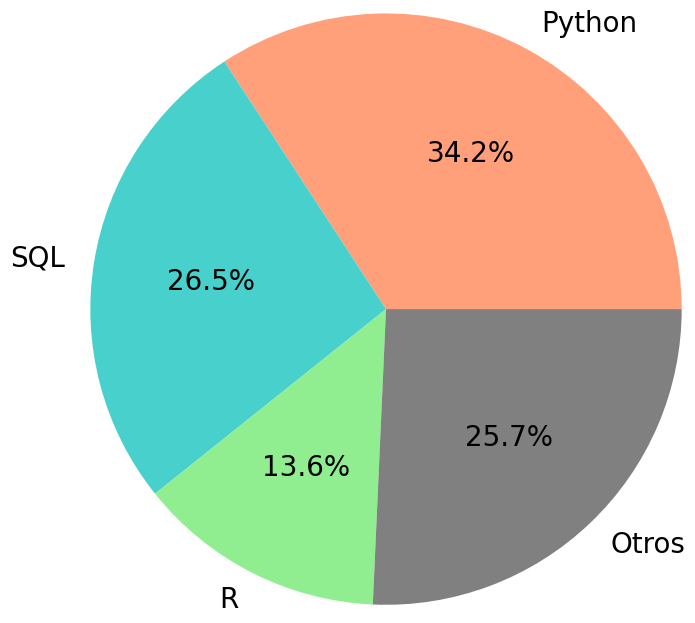

In [47]:
# modificada para presentación
data_lenguajes = {'index': ['Python', 'SQL', 'R', 'Otros'],
                'lenguajes': [78.40069535, 60.79965233, 31.07344633,  
                      9.9521947 + 9.30030422 + 9.25684485 + 8.90916993 + 7.69230769 + 7.4315515 + 4.43285528 + 1.3906997 + 0.56497175]}
df_lenguajes = pd.DataFrame(data_lenguajes)

fig, ax = plt.subplots()

colors = ['lightsalmon', 'mediumturquoise', 'lightgreen', 'grey']

ax.pie(df_lenguajes['lenguajes'], labels = df_lenguajes['index'], colors= colors, radius = 2, autopct='%1.1f%%')

plt.rcParams.update({'font.size': 15})

plt.show()

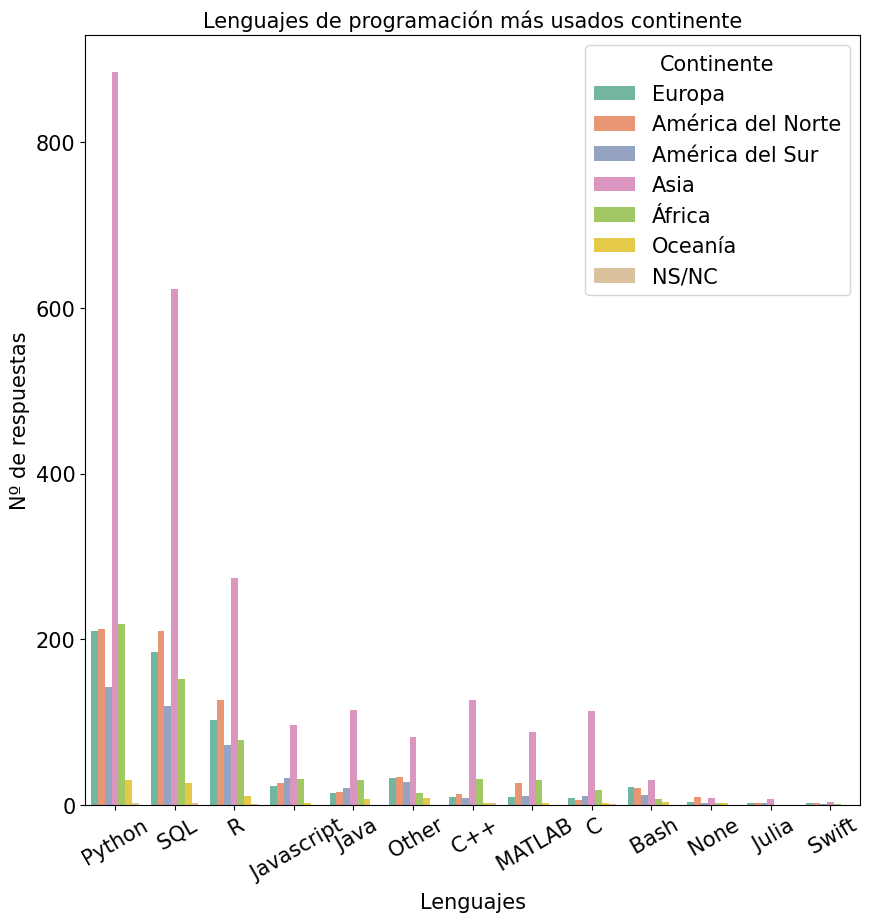

In [48]:
plt.figure(figsize = (10,10))

fig=sns.countplot(x = 'q7', hue = 'continente', data = df_q7, palette = 'Set2', 
                    order=df_q7['q7'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)
              
fig.set_title('Lenguajes de programación más usados continente', fontsize = 15)

fig.set(ylabel='Nº de respuestas', xlabel='Lenguajes') 

plt.xticks(rotation=30)

plt.legend(title='Continente')

plt.show();

- Librerías de visualización

In [49]:
# sacamos los porcentajes
df_viz = pd.DataFrame(round(df_q14['q14'].value_counts()*100/df_q14.shape[0], 2)).reset_index()
df_viz.columns = ['Librería', '%']
df_viz

Librería      %
0                Matplotlib   29.12
1                   Seaborn   22.89
2          Ggplot / ggplot2   12.75
3   Plotly / Plotly Express   11.71
4                       None   5.07
5                     Shiny    3.66
6                Geoplotlib    2.88
7                      Other   2.09
8                     Bokeh    2.05
9                     D3 js    1.61
10         Leaflet / Folium    1.55
11                   Altair    0.78

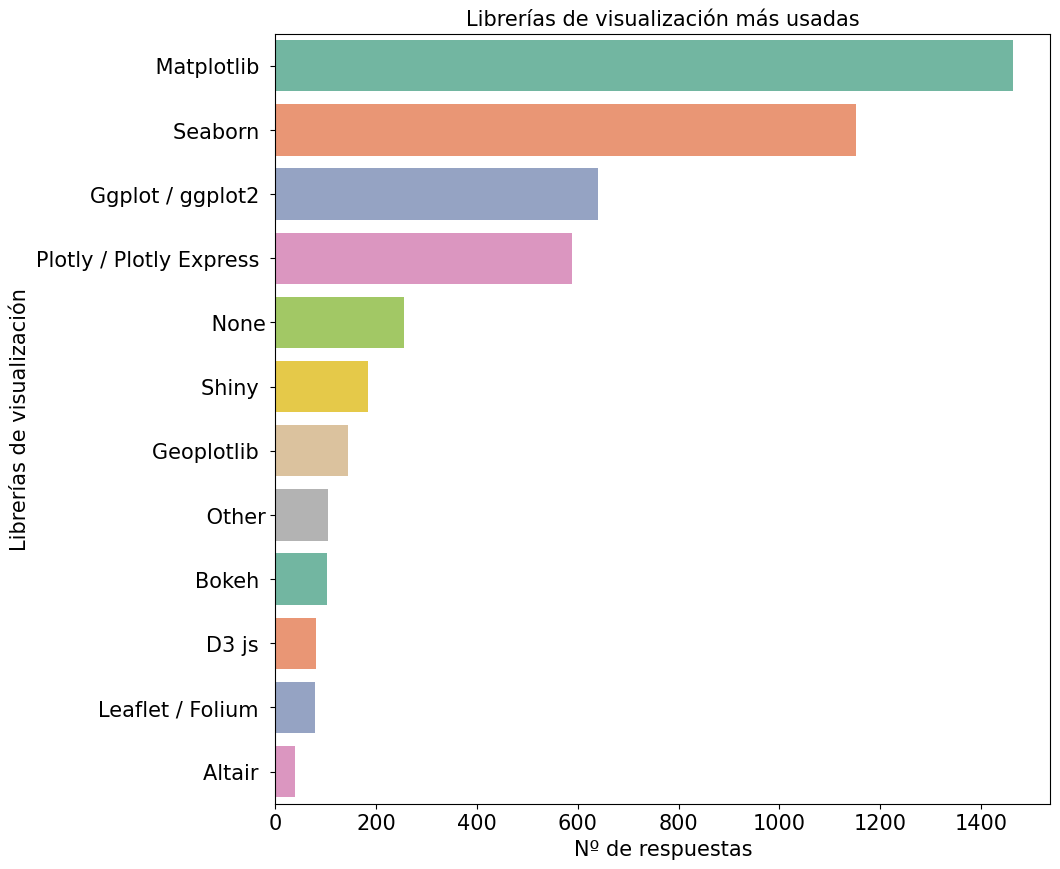

In [50]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q14', data = df_q14, palette = 'Set2', order=df_q14['q14'].value_counts().reset_index()['index'])

fig.set_title('Librerías de visualización más usadas', fontsize = 15)

fig.set(ylabel='Librerías de visualización', xlabel='Nº de respuestas') 

plt.show();

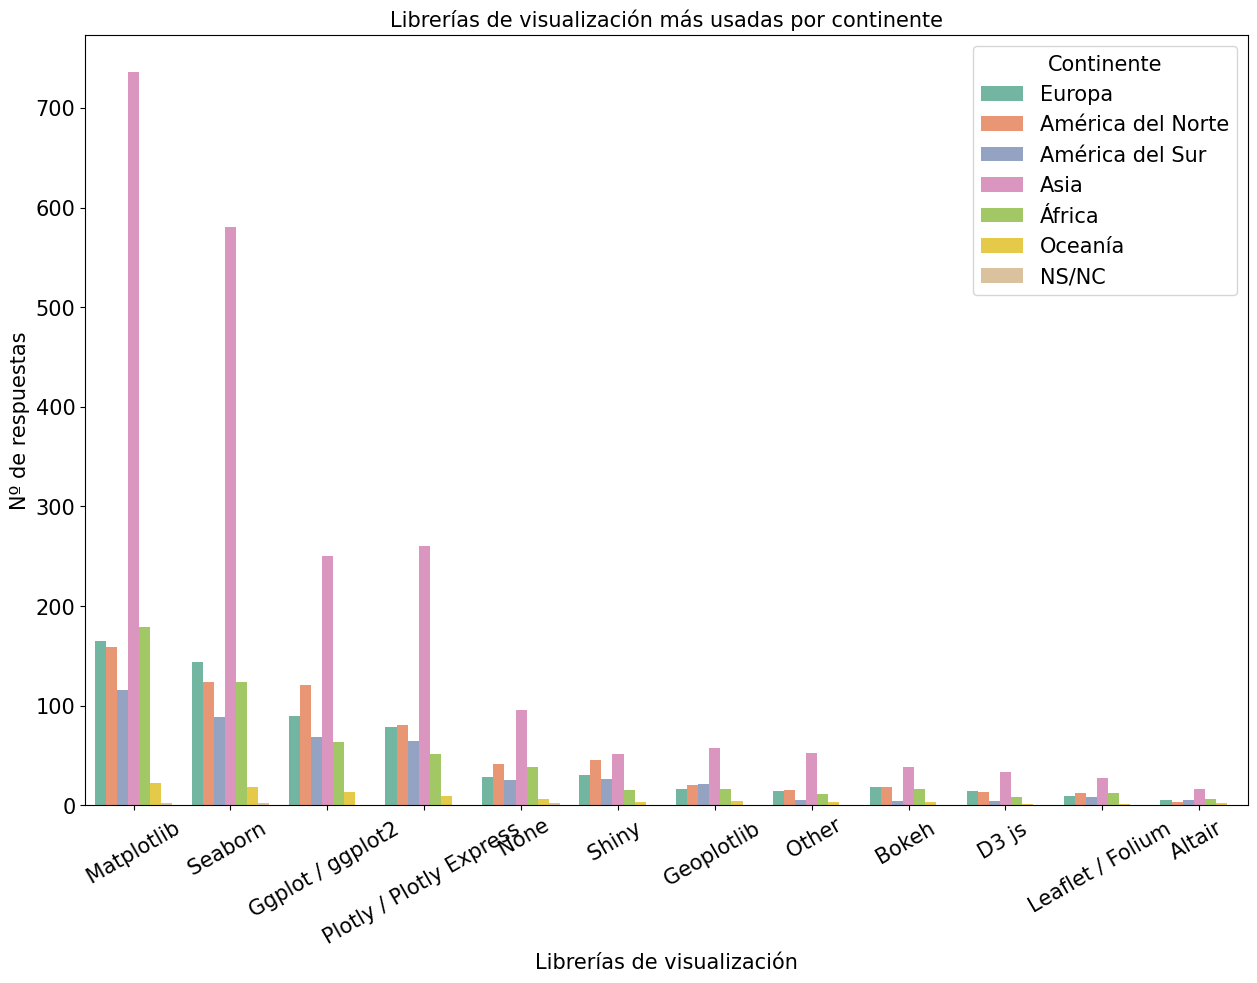

In [51]:
plt.figure(figsize = (15,10))

fig = sns.countplot(x = 'q14', data = df_q14, palette = 'Set2', hue='continente', order=df_q14['q14'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Librerías de visualización más usadas por continente', fontsize = 15)

fig.set(ylabel='Nº de respuestas', xlabel='Librerías de visualización') 

plt.xticks(rotation=30)

plt.legend(title='Continente')

plt.show();

- Plataformas para compartir públicamente su trabajo

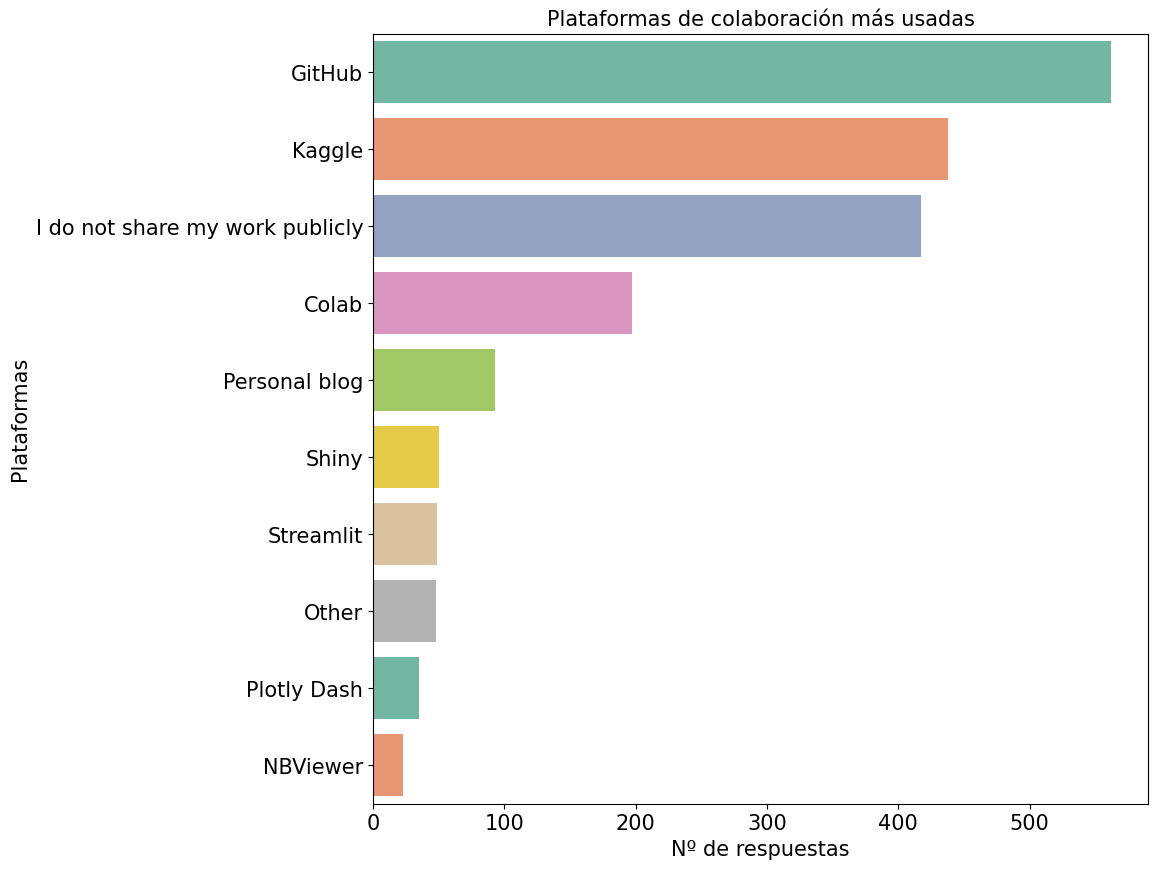

In [52]:
plt.figure(figsize = (10,10))

fig=sns.countplot(y = 'q39', data = df_q39, palette = 'Set2', order=df_q39['q39'].value_counts().reset_index()['index'])

fig.set_title('Plataformas de colaboración más usadas', fontsize = 15)

fig.set(ylabel='Plataformas', xlabel='Nº de respuestas') 

plt.show();

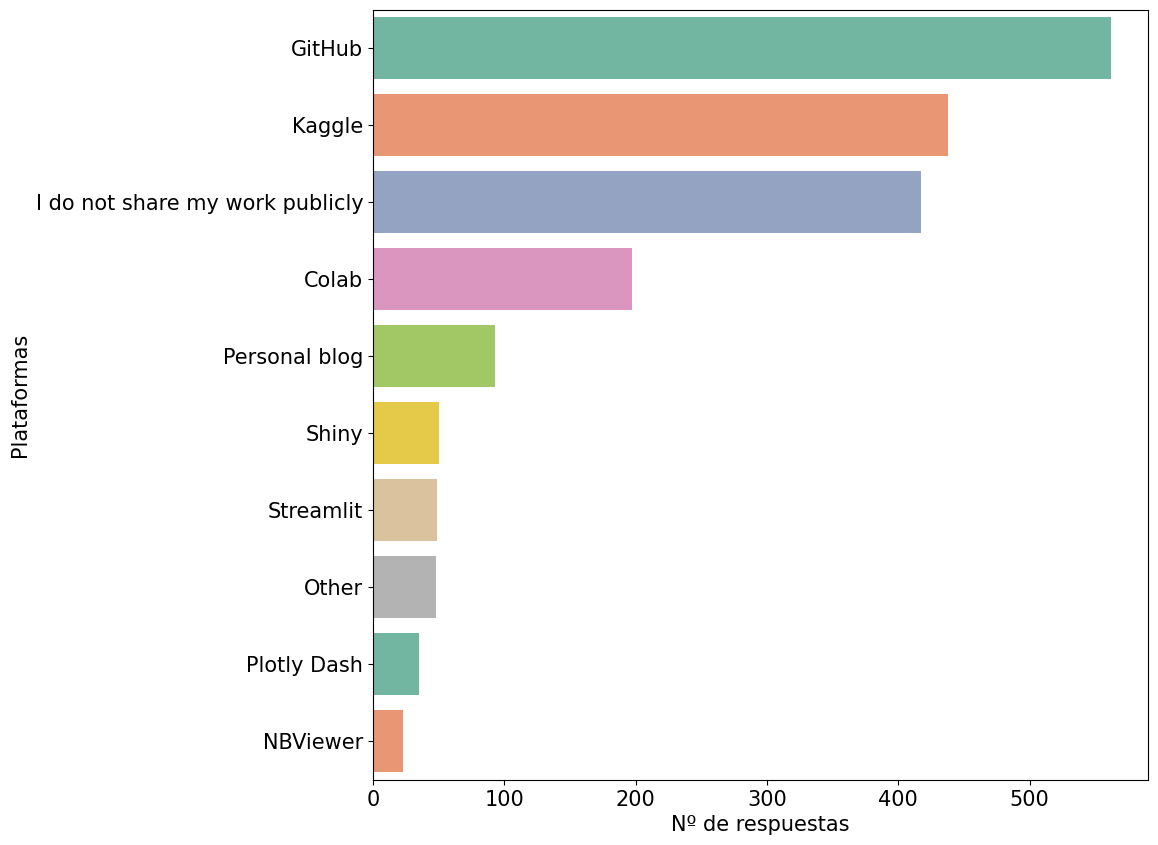

In [53]:
# modificada para presentación
plt.figure(figsize = (10,10))

fig=sns.countplot(y = 'q39', data = df_q39, palette = 'Set2', order=df_q39['q39'].value_counts().reset_index()['index'])

fig.set(ylabel='Plataformas', xlabel='Nº de respuestas') 

plt.show();

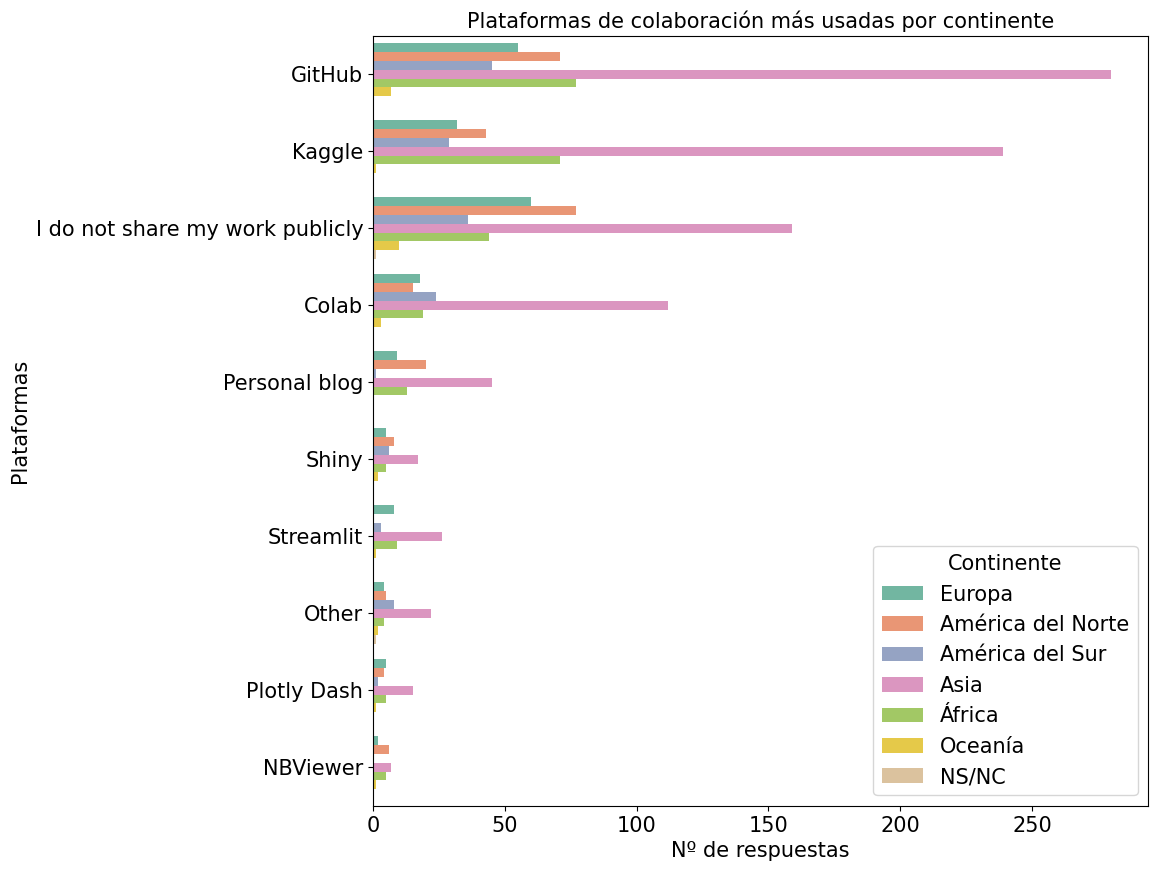

In [54]:
plt.figure(figsize = (10,10))

fig=sns.countplot(y = 'q39', hue= 'continente', data = df_q39, palette = 'Set2', order=df_q39['q39'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Plataformas de colaboración más usadas por continente', fontsize = 15)

fig.set(ylabel='Plataformas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

- Principal herramienta de análisis de datos

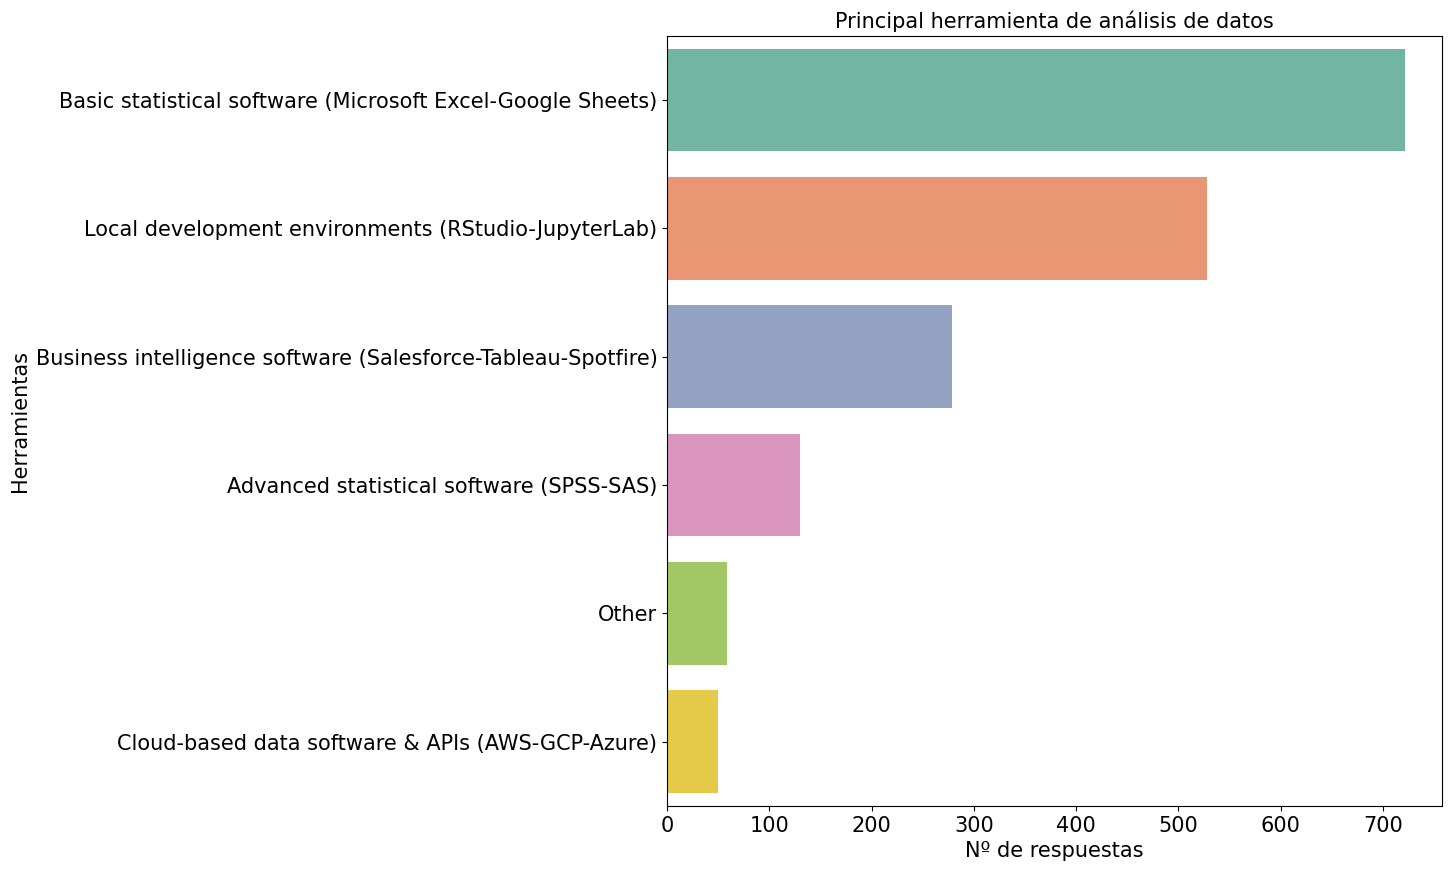

In [55]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q41', data = df_q41, palette = 'Set2', order=df_q41['q41'].value_counts().reset_index()['index'])

fig.set_title('Principal herramienta de análisis de datos', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

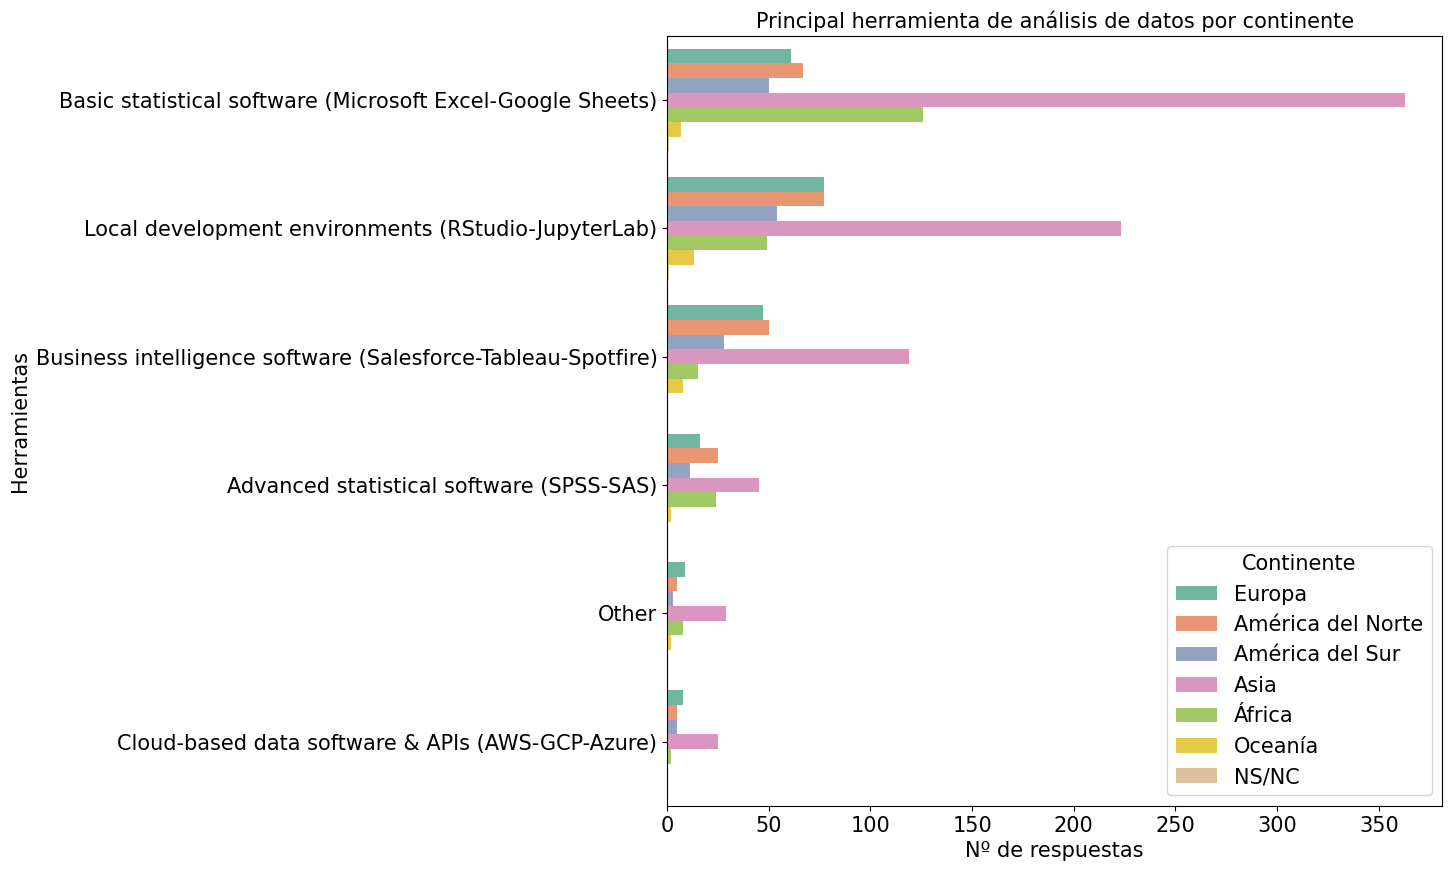

In [56]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q41', data = df_q41, hue = 'continente', palette = 'Set2', order=df_q41['q41'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Principal herramienta de análisis de datos por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

- Entorno de desarrollo integrado (IDE)

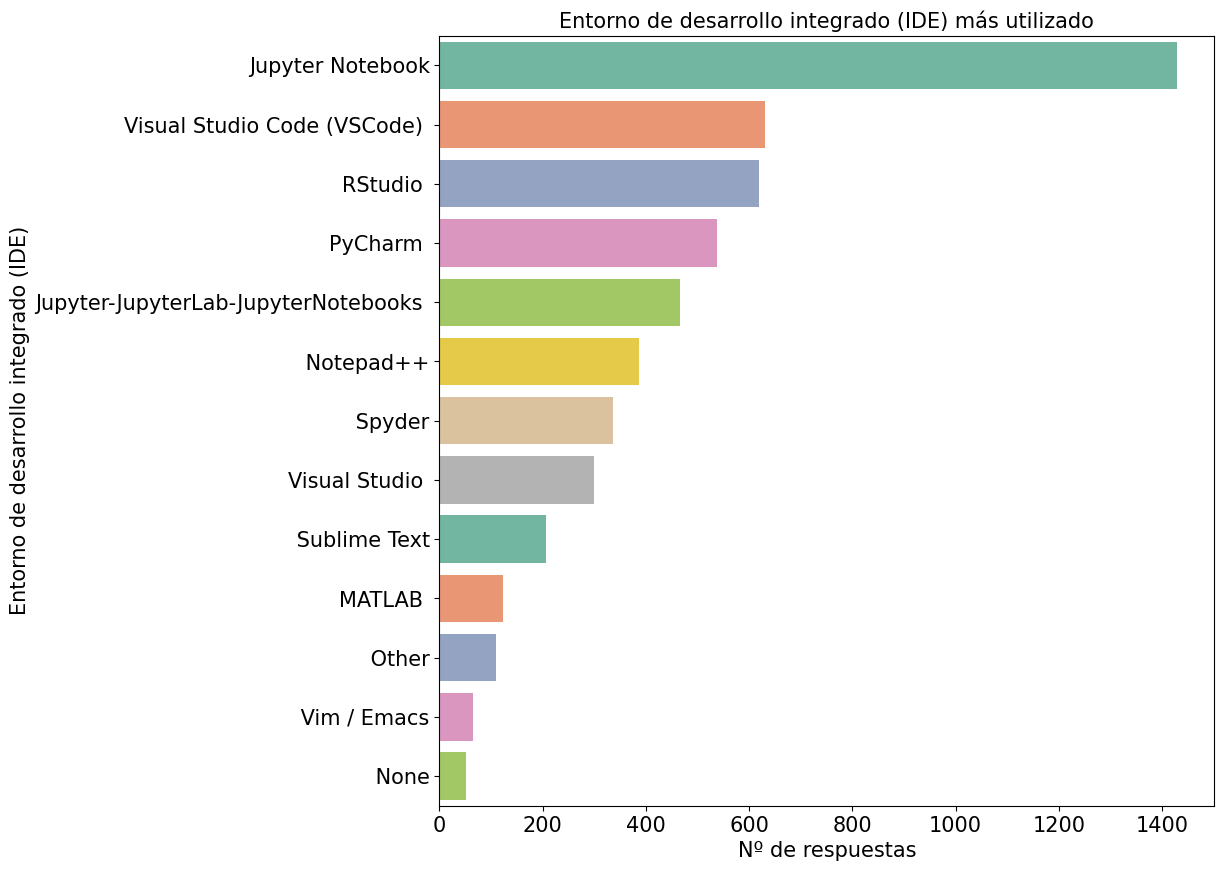

In [57]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q9', data = df_q9, palette = 'Set2', order=df_q9['q9'].value_counts().reset_index()['index'])

fig.set_title('Entorno de desarrollo integrado (IDE) más utilizado', fontsize = 15)

fig.set(ylabel='Entorno de desarrollo integrado (IDE)', xlabel='Nº de respuestas') 

plt.show();

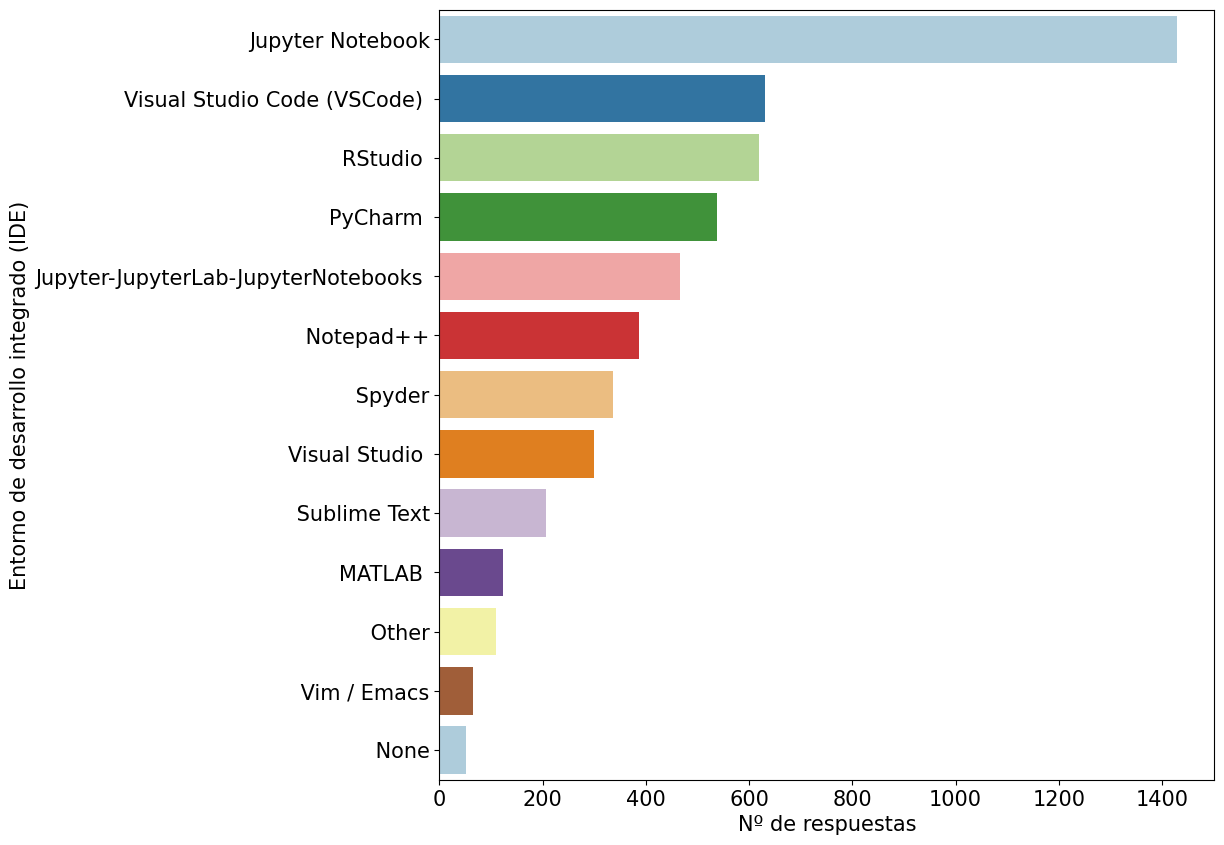

In [58]:
# modificada para presentación
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q9', data = df_q9, palette = 'Paired', order=df_q9['q9'].value_counts().reset_index()['index'])

fig.set(ylabel='Entorno de desarrollo integrado (IDE)', xlabel='Nº de respuestas') 

plt.show();

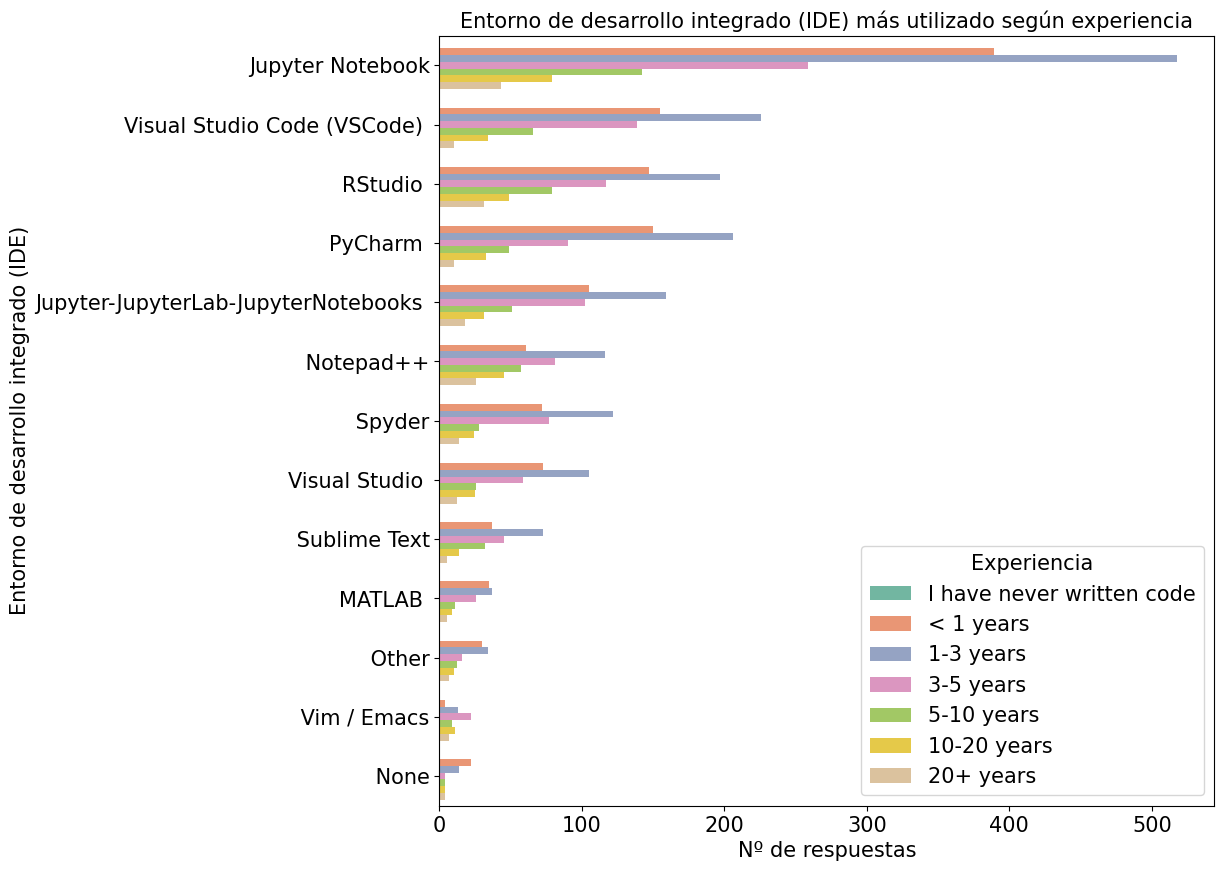

In [59]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q9', data = df_q9, hue= 'q6', palette = 'Set2', order=df_q9['q9'].value_counts().reset_index()['index'], hue_order=spv.orden_experiencia)

fig.set_title('Entorno de desarrollo integrado (IDE) más utilizado según experiencia', fontsize = 15)

fig.set(ylabel='Entorno de desarrollo integrado (IDE)', xlabel='Nº de respuestas') 

plt.legend(title='Experiencia')

plt.show();

- Notebooks

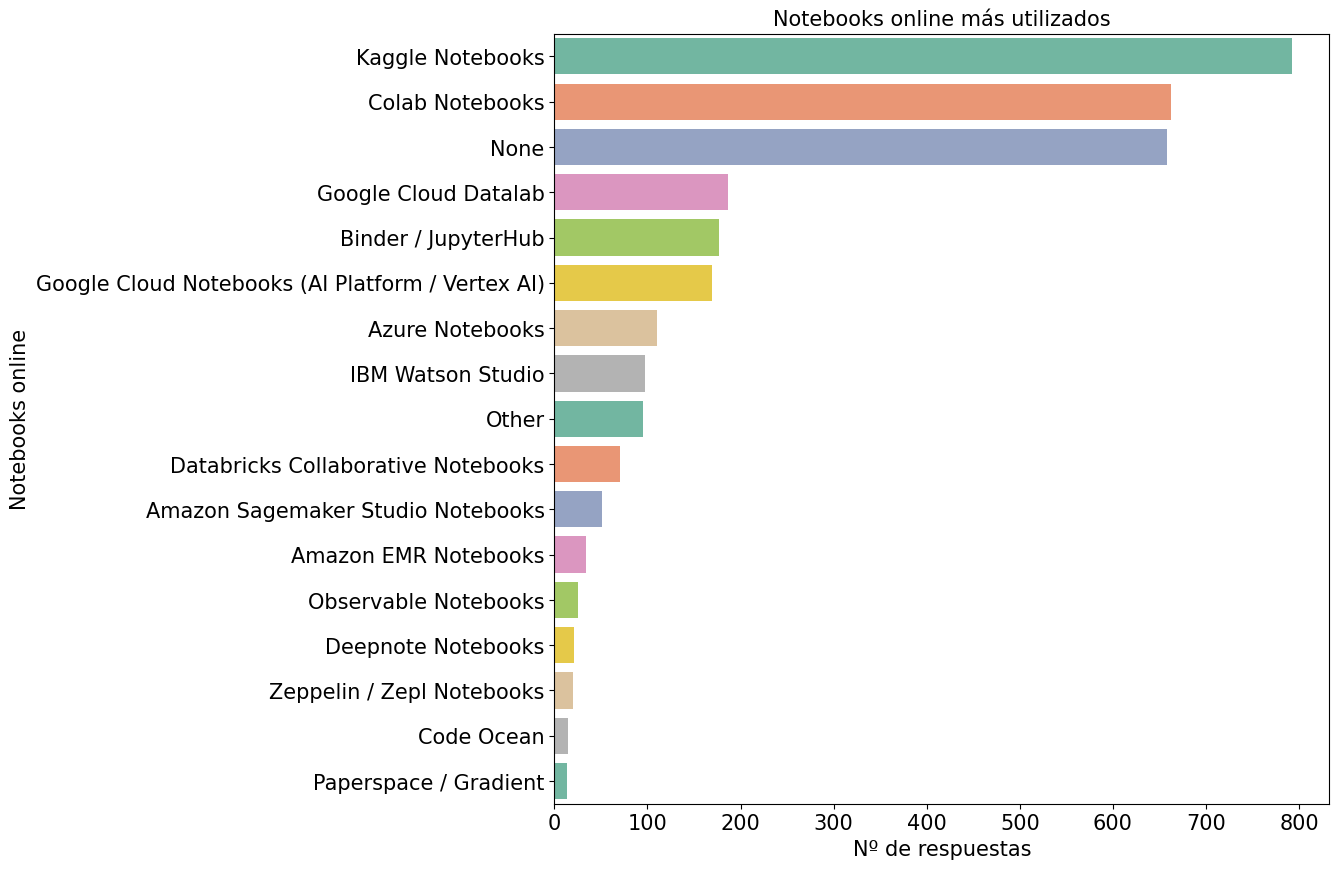

In [60]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q10', data = df_q10, palette = 'Set2', order=df_q10['q10'].value_counts().reset_index()['index'])

fig.set_title('Notebooks online más utilizados', fontsize = 15)

fig.set(ylabel='Notebooks online', xlabel='Nº de respuestas') 

plt.show();

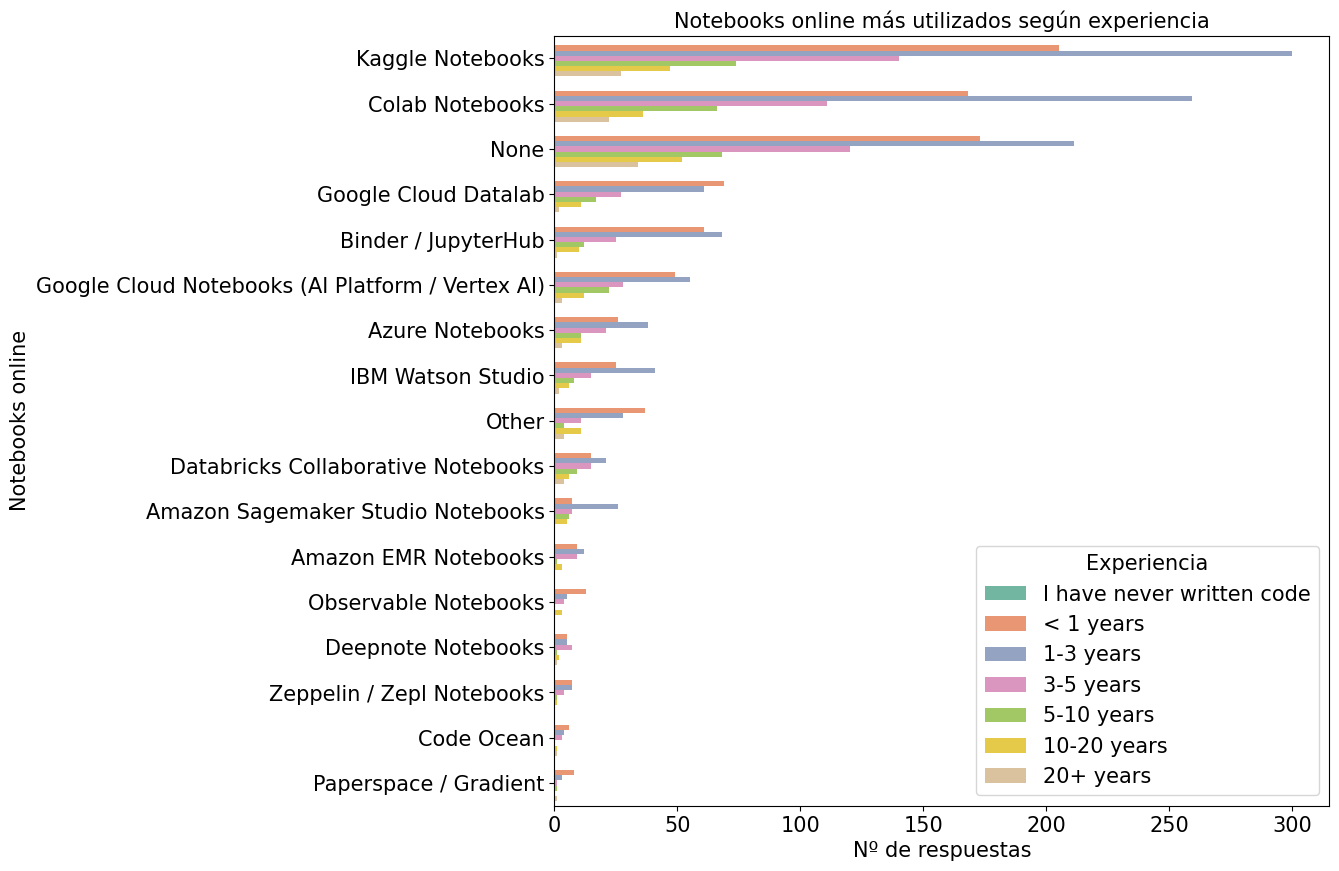

In [61]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q10', data = df_q10, hue= 'q6', palette = 'Set2', order=df_q10['q10'].value_counts().reset_index()['index'], hue_order=spv.orden_experiencia)

fig.set_title('Notebooks online más utilizados según experiencia', fontsize = 15)

fig.set(ylabel='Notebooks online', xlabel='Nº de respuestas') 

plt.legend(title='Experiencia')

plt.show();

- Herramientas de business intelligence

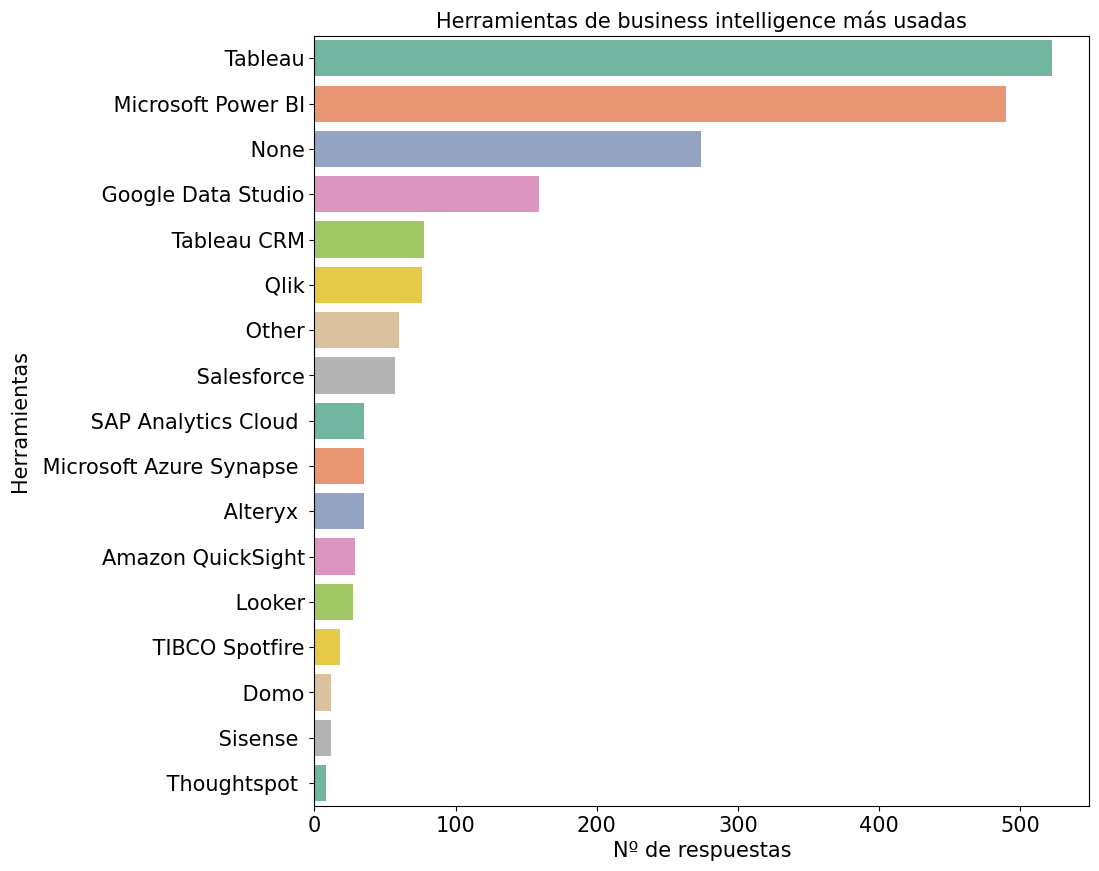

In [62]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q34', data = df_q34, palette = 'Set2', order=df_q34['q34'].value_counts().reset_index()['index'])

fig.set_title('Herramientas de business intelligence más usadas', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

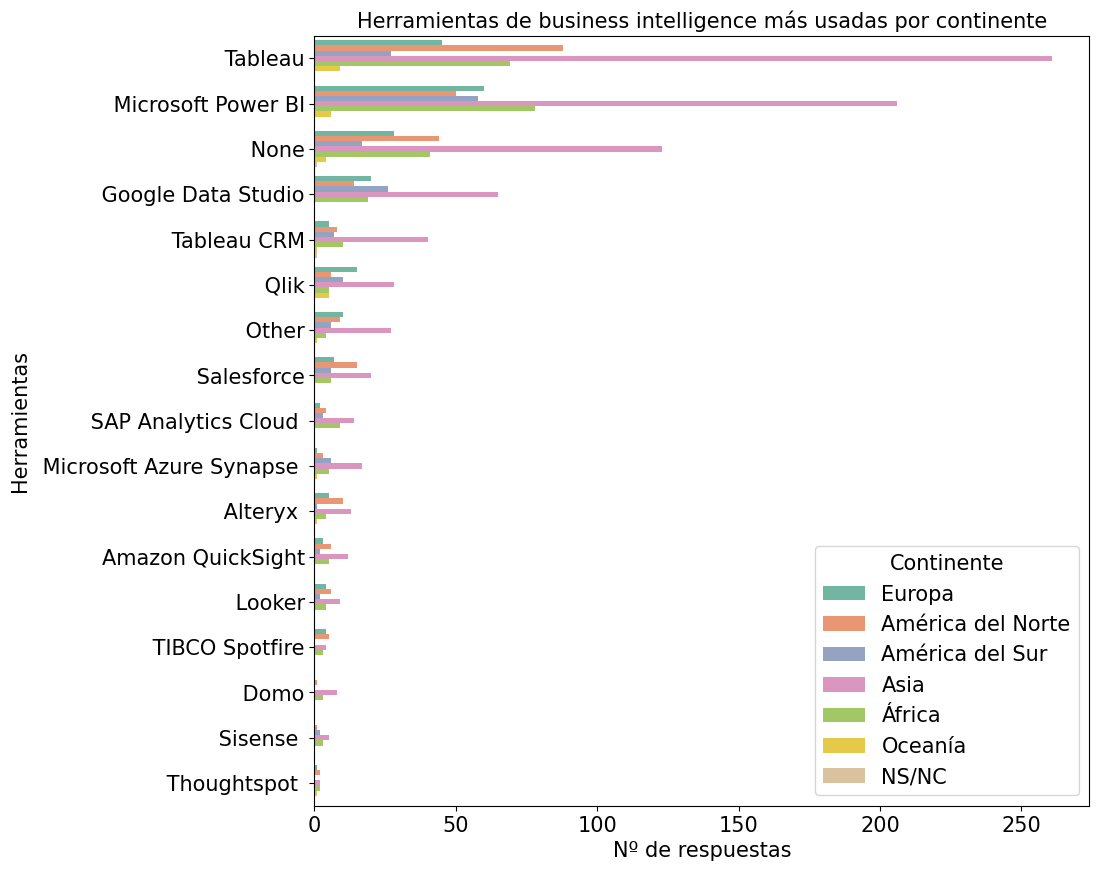

In [63]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q34', data = df_q34, palette = 'Set2', hue= 'continente', order=df_q34['q34'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Herramientas de business intelligence más usadas por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

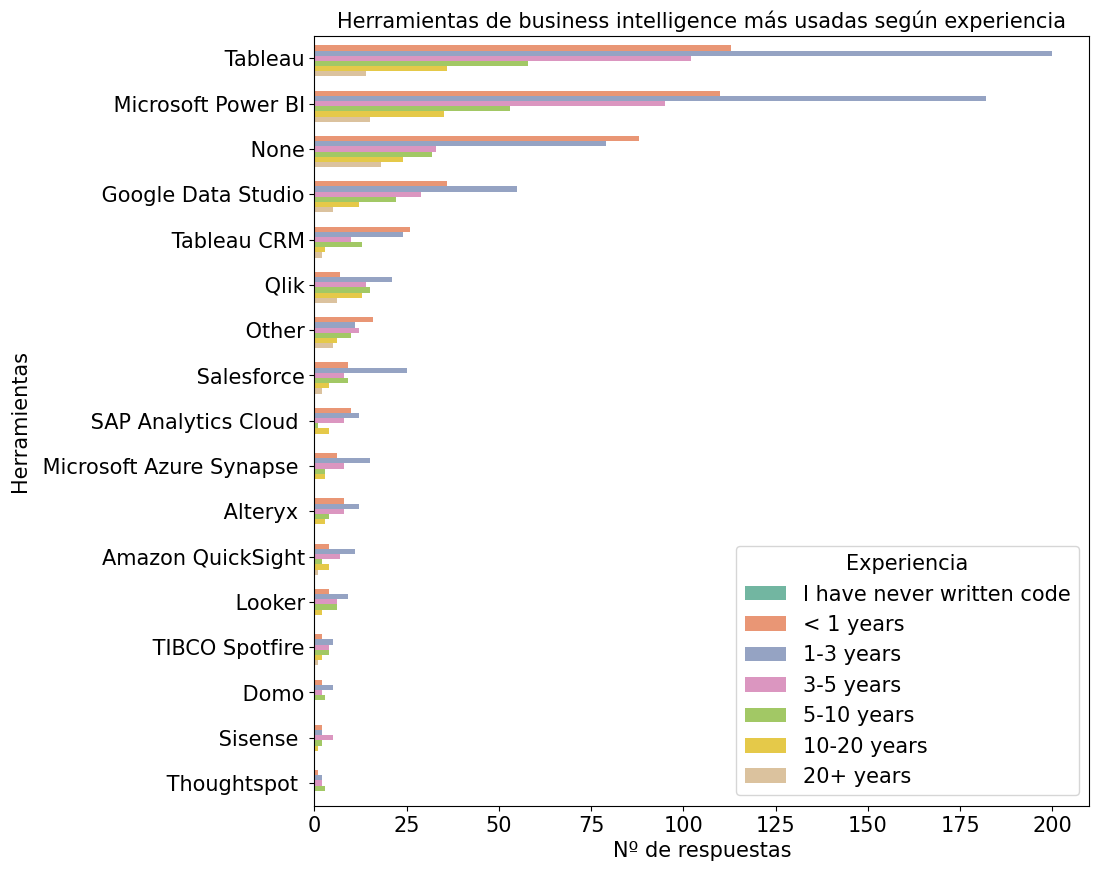

In [64]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q34', data = df_q34, palette = 'Set2', hue= 'q6', order=df_q34['q34'].value_counts().reset_index()['index'], hue_order=spv.orden_experiencia)

fig.set_title('Herramientas de business intelligence más usadas según experiencia', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Experiencia')

plt.show();

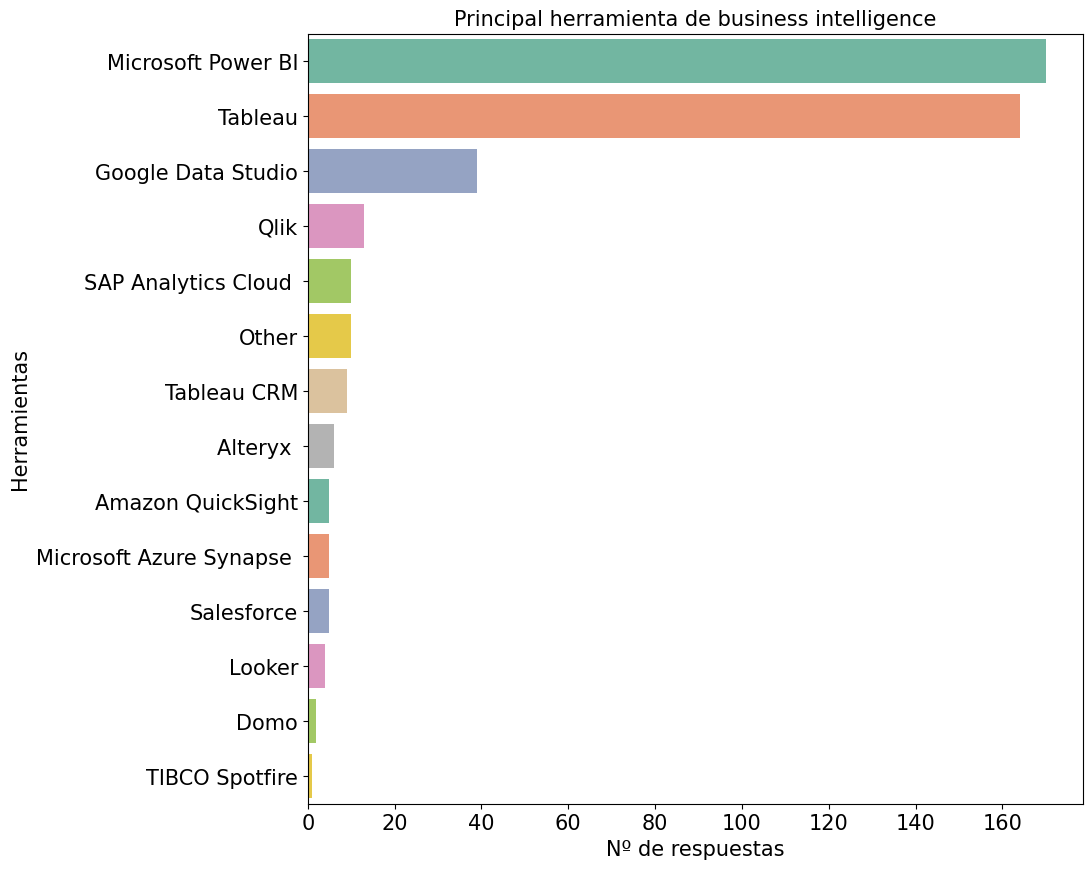

In [65]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q35', data = df_q35, palette = 'Set2', order=df_q35['q35'].value_counts().reset_index()['index'])

fig.set_title('Principal herramienta de business intelligence', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

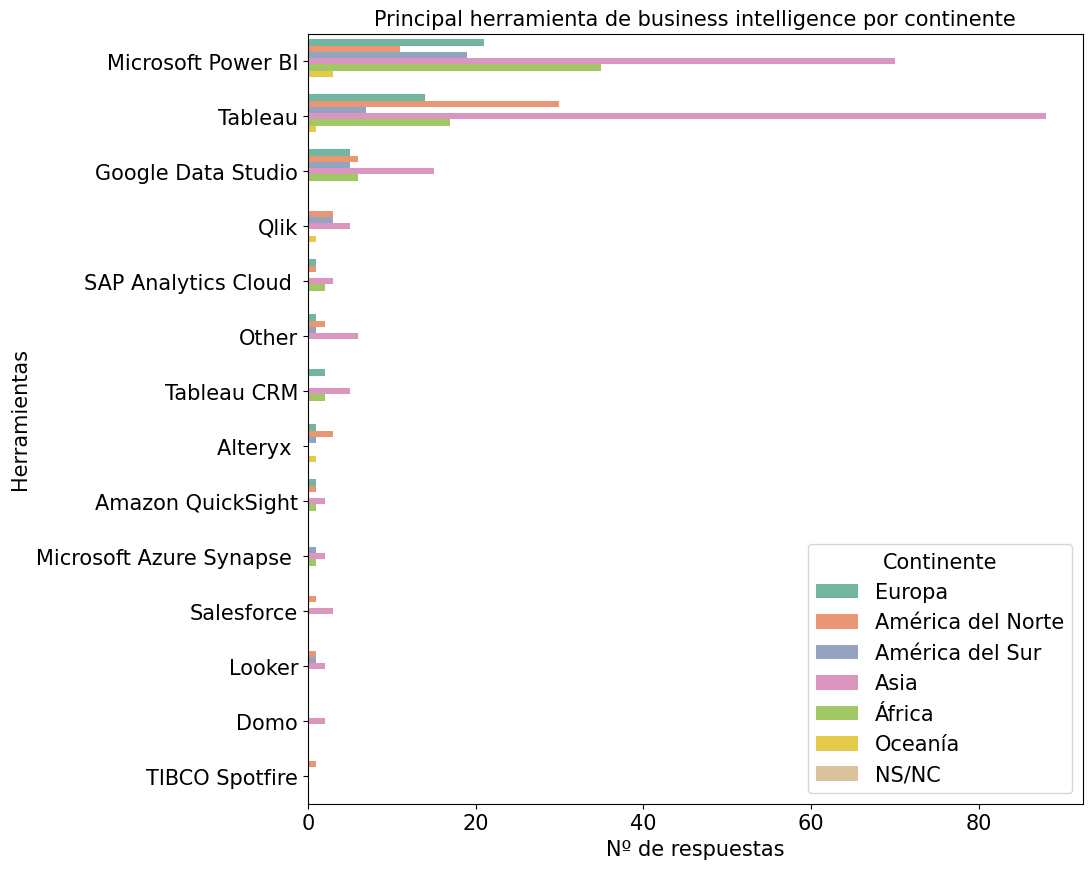

In [66]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q35', data = df, palette = 'Set2', hue='continente', order=df['q35'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Principal herramienta de business intelligence por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

In [67]:
df_eaa_bi = df[df['continente'].isin(['Europa', 'América del Norte', 'Asia'])]

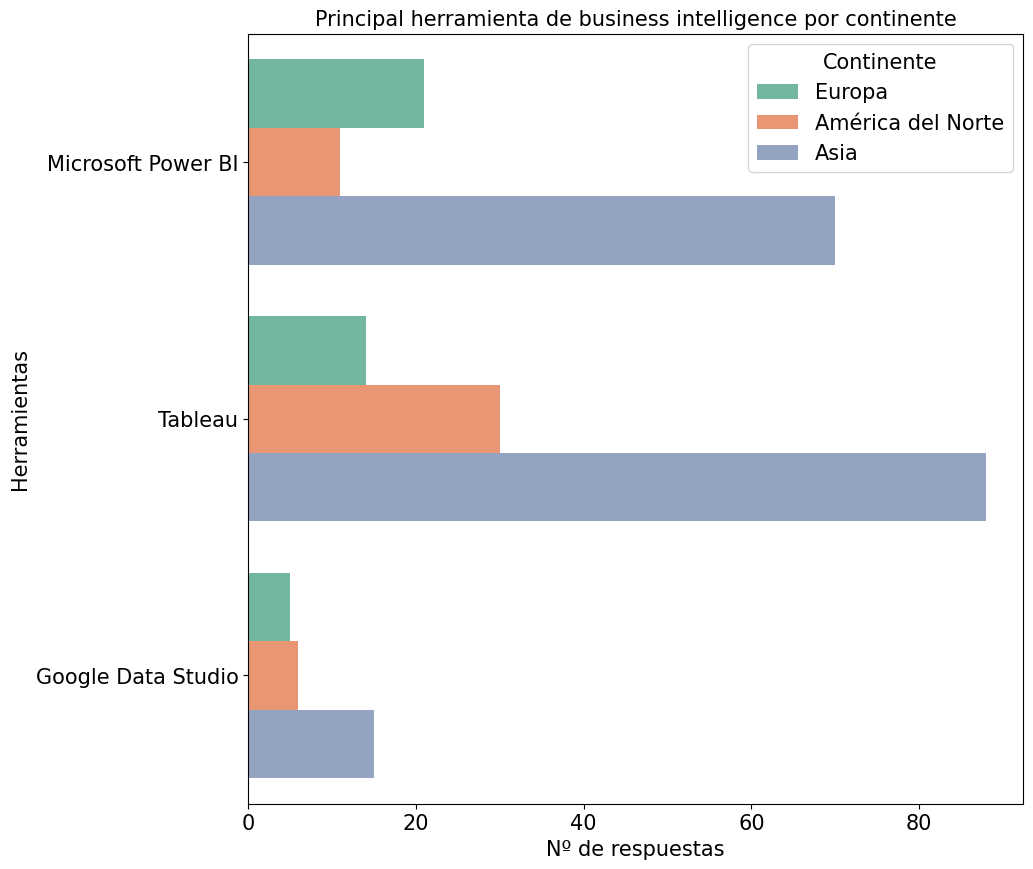

In [68]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q35', data = df_eaa_bi, palette = 'Set2', hue='continente', order=df['q35'].value_counts().reset_index()['index'][:3], hue_order=['Europa', 'América del Norte', 'Asia'])

fig.set_title('Principal herramienta de business intelligence por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

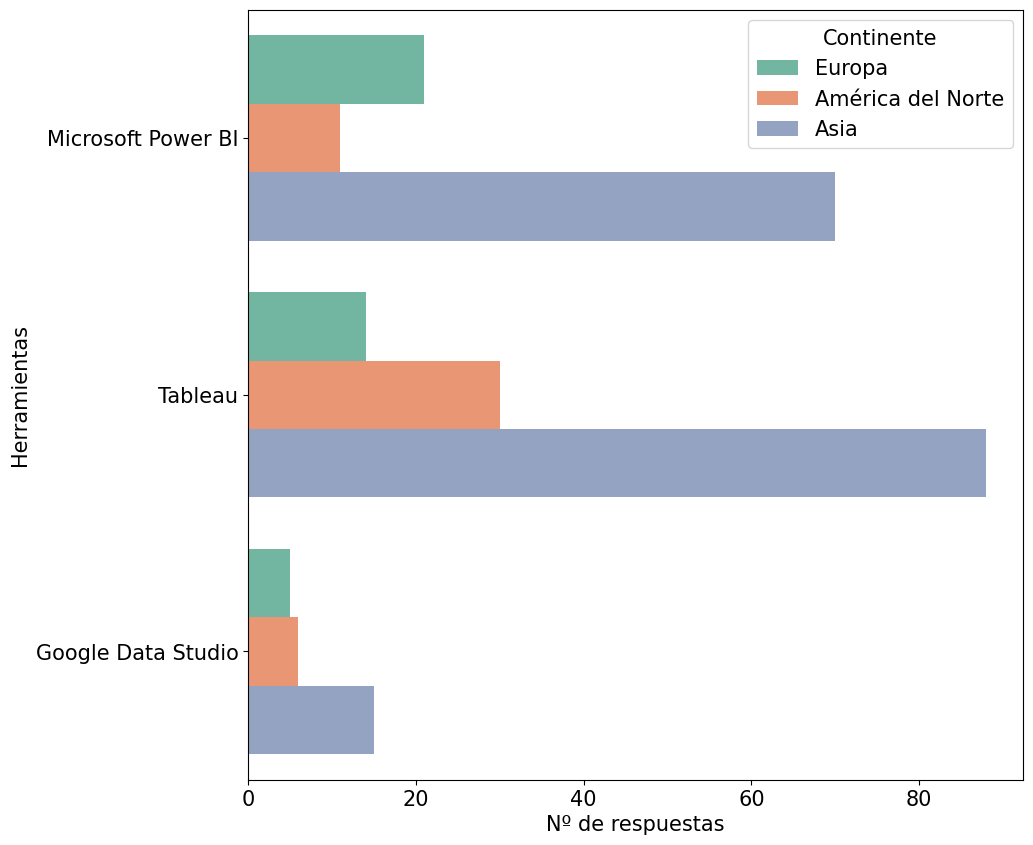

In [69]:
# modificada para presentación
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q35', data = df_eaa_bi, palette = 'Set2', hue='continente', order=df['q35'].value_counts().reset_index()['index'][:3], hue_order=['Europa', 'América del Norte', 'Asia'])

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

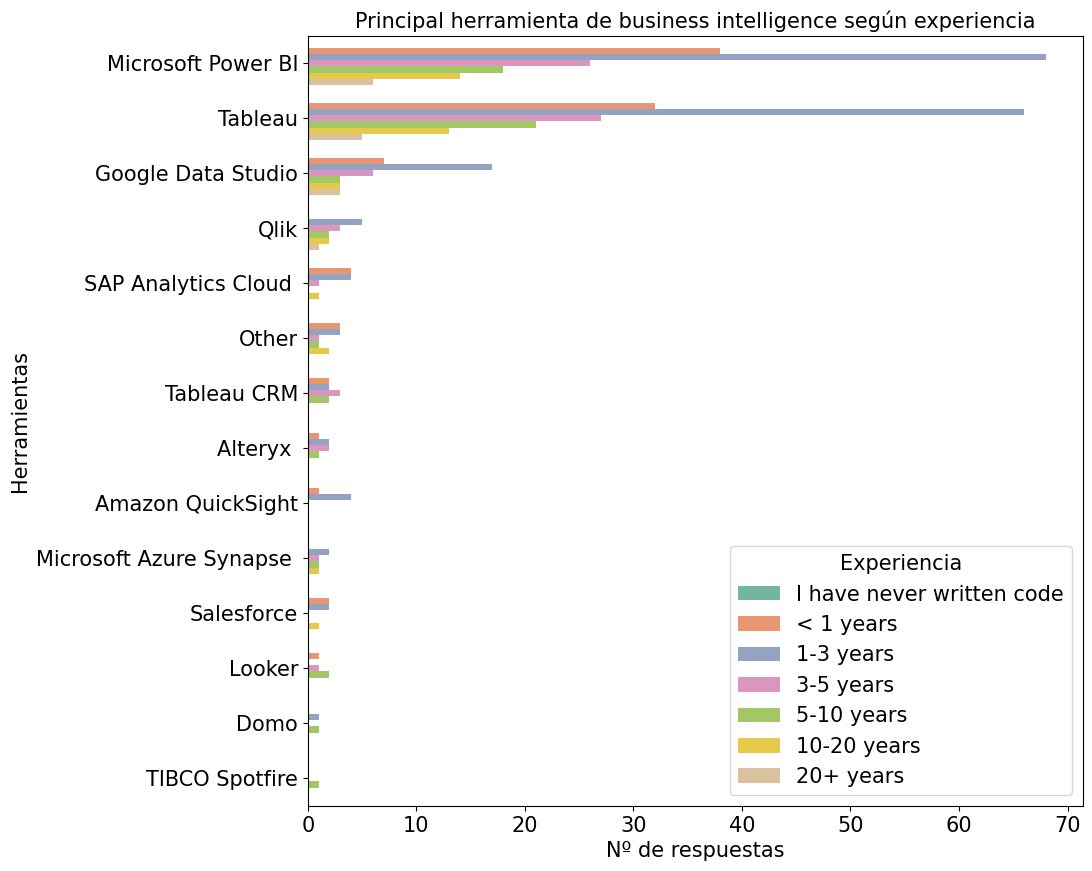

In [70]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q35', data = df, palette = 'Set2', hue='q6', order=df['q35'].value_counts().reset_index()['index'], hue_order=spv.orden_experiencia)

fig.set_title('Principal herramienta de business intelligence según experiencia', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Experiencia')

plt.show();

- Bases de datos

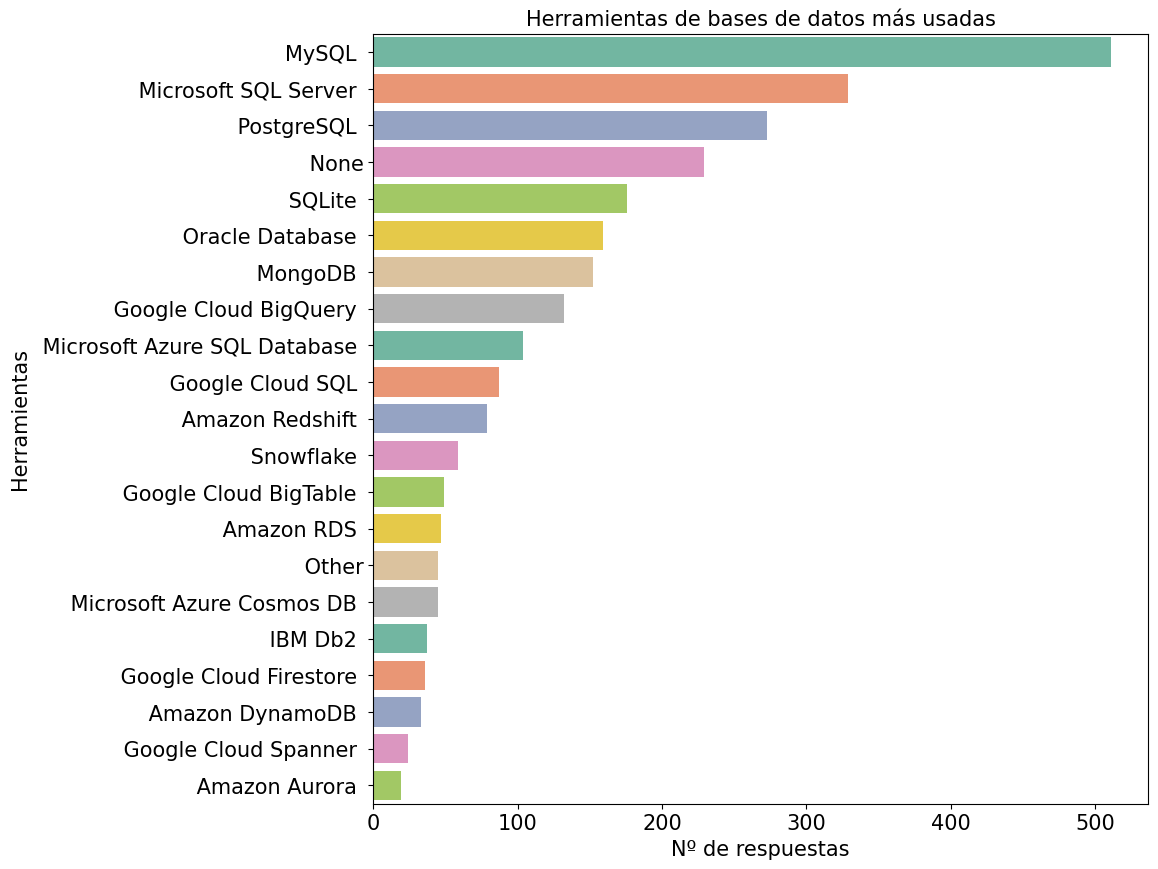

In [71]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q32', data = df_q32, palette = 'Set2', order=df_q32['q32'].value_counts().reset_index()['index'])

fig.set_title('Herramientas de bases de datos más usadas', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

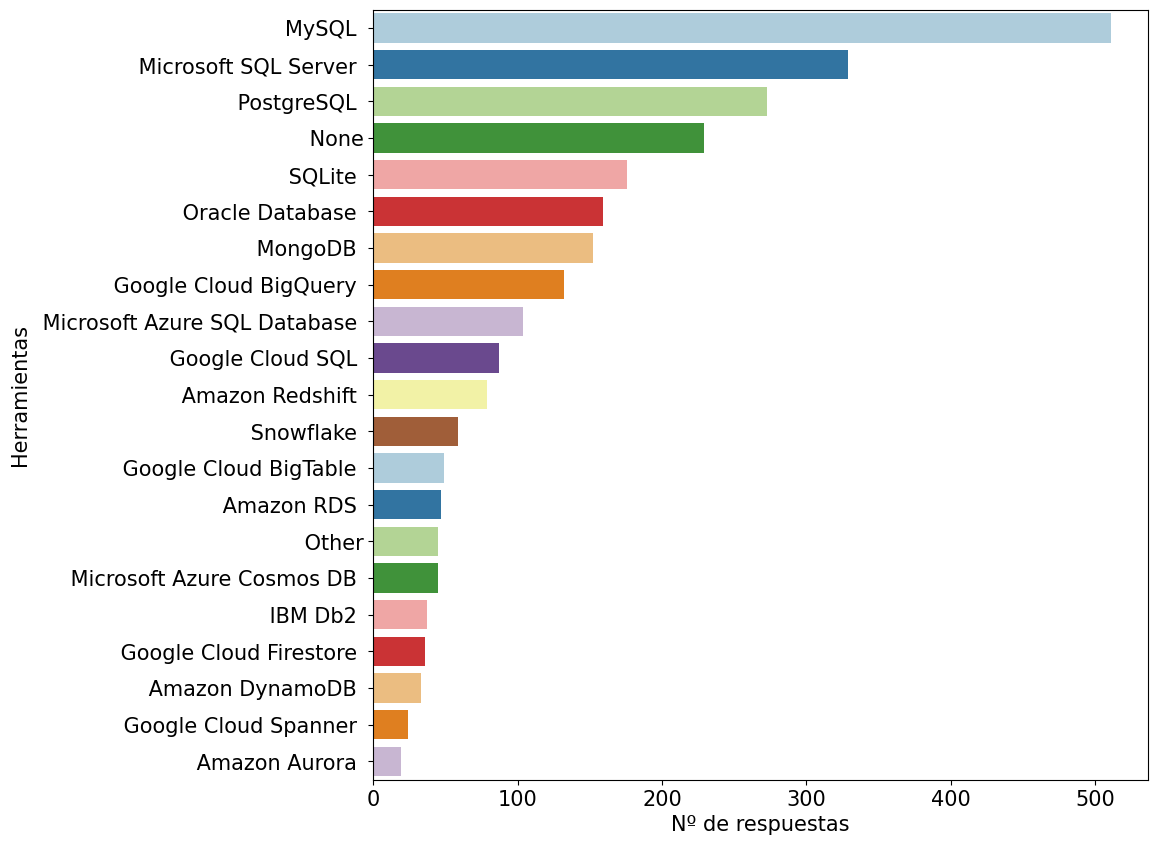

In [72]:
# modificada para presentación
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q32', data = df_q32, palette = 'Paired', order=df_q32['q32'].value_counts().reset_index()['index'])

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

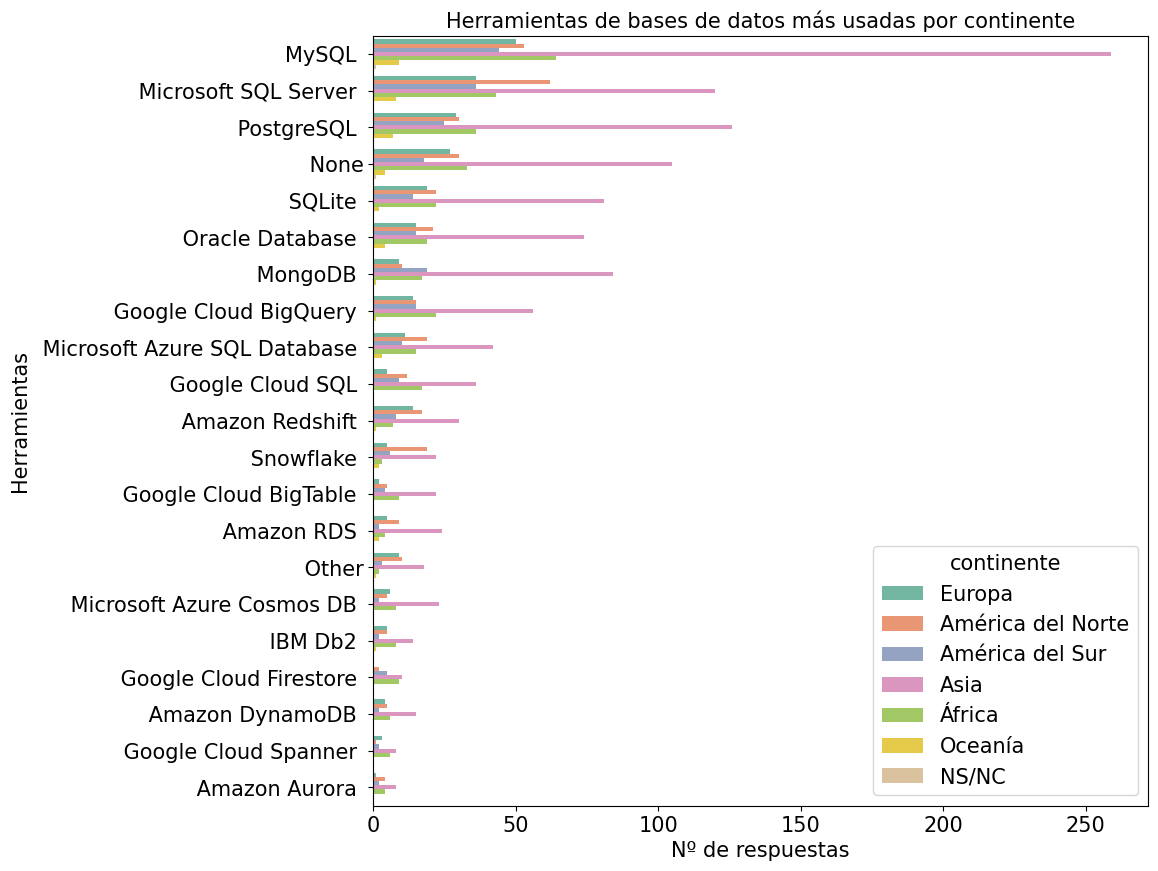

In [73]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q32', data = df_q32, hue= 'continente', palette = 'Set2', order=df_q32['q32'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Herramientas de bases de datos más usadas por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

In [74]:
# filtramos los datos  que nos interesan
df_eaa_bbdd = df_q32[df_q32['continente'].isin(['Europa', 'América del Norte', 'Asia'])]

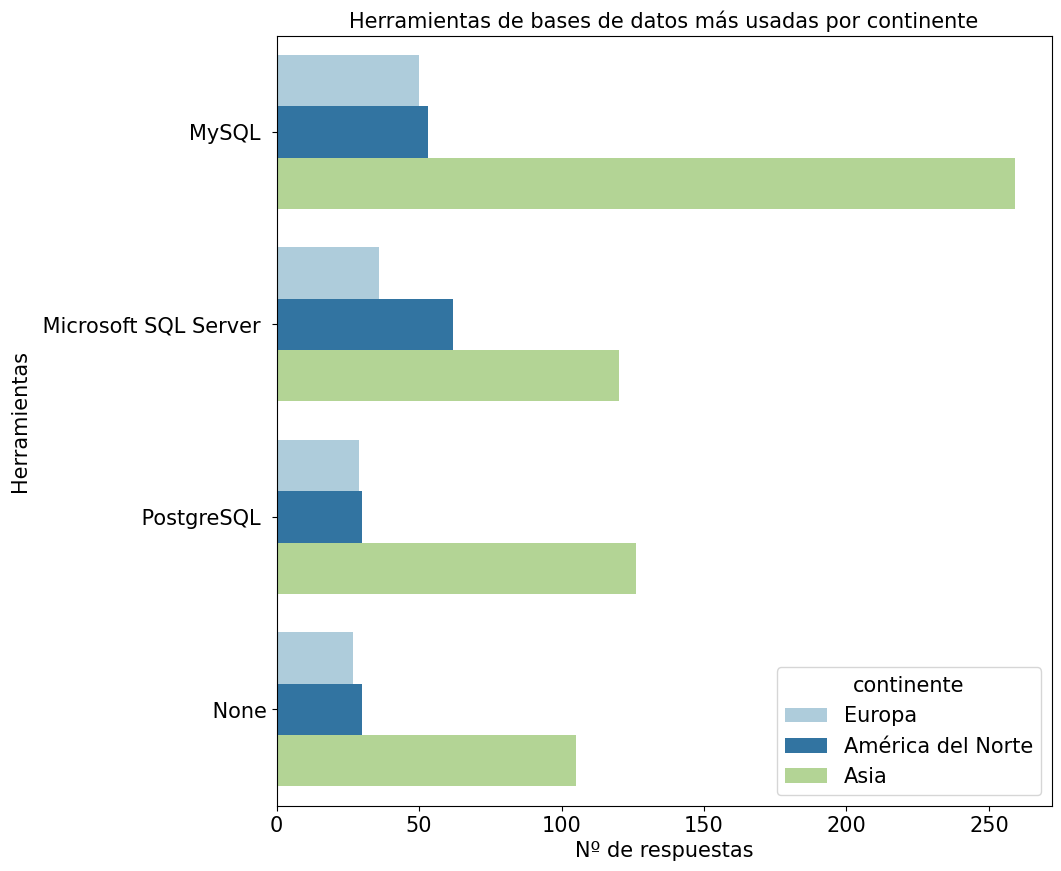

In [75]:
# nos quedamos con las más importantes
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q32', data = df_eaa_bbdd, hue= 'continente', palette = 'Paired', order=df_eaa_bbdd['q32'].value_counts().reset_index()['index'][:4], hue_order=['Europa', 'América del Norte', 'Asia'])

fig.set_title('Herramientas de bases de datos más usadas por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

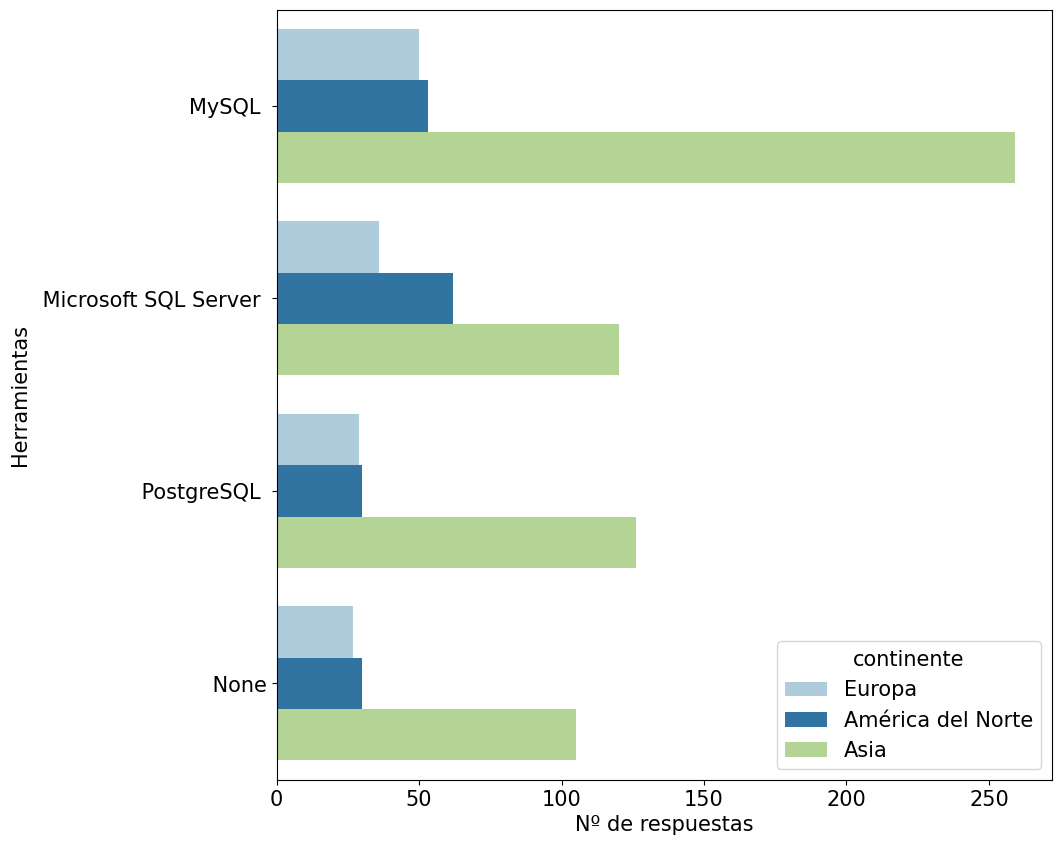

In [76]:
# modificada para presentación
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q32', data = df_eaa_bbdd, hue= 'continente', palette = 'Paired', order=df_eaa_bbdd['q32'].value_counts().reset_index()['index'][:4], hue_order=['Europa', 'América del Norte', 'Asia'])

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

## 4. Conclusiones

En cuanto al perfil medio del Data Analyst encontramos que:  
-	De manera transversal, el porcentaje de mujeres profesionales es muy bajo independientemente de la localización, nivel formativo o edad.
-	La mayoría tiene entre 1 y 3 años de experiencia o menos al tratarse de una profesión emergente.
-	La mayor parte de profesionales que responden al cuestionario pertenecen a Asia (en concreto la India), y Estados Unidos. Debido a la distribución de la muestra, decidimos realizar nuestro análisis a nivel global en vez de centrarnos únicamente en España o Europa para poder extraer conclusiones más representativas de la profesión.

Aunque en la encuesta se incluyen más herramientas, incluso algunas de las cuales se han analizado en este notebook, vamos a comprar las herramientas y competencias incluidas en el programa del Bootcamp con las más usadas por los profesionales en las siguientes categorías, ya que nos parece que son las más relevantes para el análisis:

1.	LENGUAJES DE PROGRAMACIÓN.
Encontramos que Python es el lenguaje más usado por los profesionales, seguido de SQL y por último de R, éste segundo un lenguaje más utilizado en sectores como la investigación. Estos dos son también los dos lenguajes más recomendados por los profesionales para iniciarse en el sector.
Concluimos que la elección de Adalab es la más adecuada.

2.	BASES DE DATOS:
En cuanto a las herramientas de gestión Bases de Datos, encontramos que MySQL es el más usado a nivel global y a nivel europeo, siendo únicamente superado por Microsoft SQL Server en América del Norte. Por lo tanto, se puede concluir que la elección de MySQL Workbench para el bootcamps es adecuada.

3.	ENTORNOS DE DESARROLLO:
El entorno de desarrollo más utilizado es Jupyter Notebook, seguido por Visual Studio Code. Aunque en el Bootcamp, las alumnas trabajan en el entorno de VSCode, utilizan ficheros con formato de Jupyter Notebook.
Consideramos que esta decisión formativa es muy acertada, ya que permite a las alumnas manejar ambas herramientas con fluidez, con el añadido de que VSCode permite trabajar con otros tipos de formatos.

4.	LIBRERÍAS DE VISUALIZACIÓN:
Una parte integral del trabajo de un analista de datos consiste en hacer gráficas para facilitar el análisis de los datos. Encontramos que Matplotlib y Seaborn son las más usadas por los profesionales, alzándose de manera significativa sobre el resto.
 
5.	BUSINESS INTELLIGENCE:
A nivel global encontramos que Tableau es la herramienta de Business Intelligence más utilizada. Sin embargo, Power BI es considerada como herramienta principal por aquellos que conocen más de una herramienta. En concreto en Europa tiene mayor prioridad Power BI a todos los niveles, siendo Tableau la segunda opción. Por lo tanto, sería interesante para Adalab valorar si desea priorizar en su formación la inserción laboral de sus alumnas a nivel global o europeo de cara a elegir la herramienta de BI más adecuada para su programa o valorar la posibilidad de dar a sus alumnas nociones básicas de ambas herramientas si fuera posible.

6.	PLATAFORMAS DE COLABORACIÓN:
Adalab enseña a sus alumnas a trabajar con GitHub, la plataforma de colaboración más utilizada por los profesionales del sector, así como unas nociones básicas de Kaggle que es la segunda más usada.

CONCLUSIONES FINALES:  
Como conclusiones finales queremos destacar que hemos detectado que las herramientas y competencias incluidas en el programa se ajustan, en general, bastante bien a las necesidades del mercado. 
Como única posible debilidad podríamos considerar la necesidad de replantearse un cambio en la selección de la herramienta de Business Intelligence en caso de querer facilitar la inserción laboral en el mercado Europeo.

Como posibles amenazas es necesario indicar que las conclusiones son fruto de datos recogidos en el año 2021, con una muestra escasa para España y Europa, en un campo en constante cambio, por lo que los resultados podrían no estar realmente ajustados a la realidad Española actual. Además, en cualquier caso, habría que seguir monitoreando cambios, tendencias y nuevas herramientas que puedan ir apareciendo en el mercado, de cara a mantener actualizado y fiel a las necesidades del mercado el contenido del bootcamp.

Finalmente queremos destacar como oportunidades el hecho de se trate de una profesión joven y con pocos profesionales ejerciendo a nivel Europeo y Español, con un bajo ratio de mujeres, hace que un Bootcamp especializado en introducir mujeres dentro del sector resulte un proyecto potente e imprescindible con buenas perspectivas de futuro.
